## Setup

In [1]:
!python3 -m pip install tensorflow[and-cuda]
!python3 -c "import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))"

  Obtaining dependency information for nvidia-cublas-cu12==12.3.4.1 from https://files.pythonhosted.org/packages/74/aa/f0e402ab0c1aa371e3143ed0b79744ebd6091307087cda59e3249f45cac8/nvidia_cublas_cu12-12.3.4.1-py3-none-manylinux1_x86_64.whl.metadata
  Using cached nvidia_cublas_cu12-12.3.4.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Obtaining dependency information for nvidia-cuda-cupti-cu12==12.3.101 from https://files.pythonhosted.org/packages/6a/43/b30e742c204c5c81a6954c5f20ce82b098f9c4ca3d3cb76eea5476b83f5d/nvidia_cuda_cupti_cu12-12.3.101-py3-none-manylinux1_x86_64.whl.metadata
  Using cached nvidia_cuda_cupti_cu12-12.3.101-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Obtaining dependency information for nvidia-cuda-nvcc-cu12==12.3.107 from https://files.pythonhosted.org/packages/4a/d9/352879c1d749b787b5c068b32673a73ce1cb6c52874b1d2e80044b101485/nvidia_cuda_nvcc_cu12-12.3.107-py3-none-manylinux1_x86_64.whl.metadata
  Using cached nvidia_cuda_nvcc_cu12-12.3.107-py3-none

Begin by installing [TensorFlow Datasets](https://tensorflow.org/datasets) for loading the dataset and [TensorFlow Text](https://www.tensorflow.org/text) for text preprocessing:

In [2]:
# Install the most re version of TensorFlow to use the improved
# masking support for `tf.keras.layers.MultiHeadAttention`.
!apt-get install libcudnn8
!pip uninstall -y -q tensorflow keras tensorflow-estimator tensorflow-text
!pip install protobuf~=3.20.3
!pip install -q tensorflow_datasets
!pip install -q -U tensorflow-text tensorflow

E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?
  Obtaining dependency information for protobuf~=3.20.3 from https://files.pythonhosted.org/packages/8d/14/619e24a4c70df2901e1f4dbc50a6291eb63a759172558df326347dce1f0d/protobuf-3.20.3-py2.py3-none-any.whl.metadata
  Using cached protobuf-3.20.3-py2.py3-none-any.whl.metadata (720 bytes)
Using cached protobuf-3.20.3-py2.py3-none-any.whl (162 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.3
    Uninstalling protobuf-4.25.3:
      Successfully uninstalled protobuf-4.25.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<5,>=4.25.2; python_version >= "3.11", but you have protobuf 3.20.3 which is incompatible.

[not

In [4]:
!pip install -q tfds-nightly tensorflow matplotlib


[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [5]:
!pip install -q apache-beam


[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [6]:
!pip install -q mlcroissant


[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [7]:
!tfds --version

Failed to import GCSFileSystem; loading of this filesystem will be skipped. Error details: cannot import name 'storage' from 'google.cloud' (unknown location)
TensorFlow Datasets: 4.9.6+nightly


In [15]:
dataset = 'koumankan_mt_dyu_fr_tfds'

In [18]:
!cd 'koumankan_mt_dyu_fr_tfds' && tfds build

Failed to import GCSFileSystem; loading of this filesystem will be skipped. Error details: cannot import name 'storage' from 'google.cloud' (unknown location)
INFO[build.py]: Loading dataset  from path: /home/amini/Downloads/french-dyula/koumankan_mt_dyu_fr_tfds/koumankan_mt_dyu_fr_tfds_dataset_builder.py
2024-07-10 16:15:41.545313: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-10 16:15:41.560967: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-10 16:15:41.582691: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has a

Import the necessary modules:

In [19]:
import logging
import time

import numpy as np
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds
import tensorflow as tf

import tensorflow_text

## Data handling


### Download the dataset

In [20]:
examples, metadata = tfds.load('koumankan_mt_dyu_fr_tfds', with_info=True,
                               as_supervised=True)
train_examples, val_examples = examples['train'], examples['validation']

2024-07-10 16:16:09.931857: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 26147 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:15:00.0, compute capability: 8.6
2024-07-10 16:16:09.932596: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 46864 MB memory:  -> device: 1, name: NVIDIA RTX A6000, pci bus id: 0000:99:00.0, compute capability: 8.6


The `tf.data.Dataset` object returned by TensorFlow Datasets yields pairs of text examples:

In [21]:
for dyu_examples, fr_examples in train_examples.batch(3).take(1):
  print('> Examples in Dyula:')
  for pt in dyu_examples.numpy():
    print(pt.decode('utf-8'))
  print()

  print('> Examples in French:')
  for en in fr_examples.numpy():
    print(en.decode('utf-8'))

> Examples in Dyula:
ayi accident kè a ma mè
gèma alé ni kefé ni nonnon
fagari bi mɔgɔ maliya

> Examples in French:
elle a eu un accident de la route la semaine dernière
blanc comme du café au lait
la baffe  ça humilie


2024-07-10 16:16:15.181880: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-07-10 16:16:15.182971: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


### Set up the tokenizer

Now that you have loaded the dataset, you need to tokenize the text, so that each element is represented as a [token](https://developers.google.com/machine-learning/glossary#token) or token ID (a numeric representation).

Tokenization is the process of breaking up text, into "tokens". Depending on the tokenizer, these tokens can represent sentence-pieces, words, subwords, or characters. To learn more about tokenization, visit [this guide](https://www.tensorflow.org/text/guide/tokenizers).

In [23]:
model_name = 'translate_dyula_french'
tokenizers = tf.saved_model.load(model_name)

The `tf.saved_model` contains two text tokenizers, one for French and one for Dyula. Both have the same methods:

In [24]:
[item for item in dir(tokenizers.fr) if not item.startswith('_')]

['detokenize',
 'get_reserved_tokens',
 'get_vocab_path',
 'get_vocab_size',
 'lookup',
 'tokenize',
 'tokenizer',
 'vocab']

The `tokenize` method converts a batch of strings to a padded-batch of token IDs. This method splits punctuation, lowercases and unicode-normalizes the input before tokenizing. That standardization is not visible here because the input data is already standardized.

In [25]:
print('> This is a batch of strings:')
for fr in fr_examples.numpy():
  print(fr.decode('utf-8'))

> This is a batch of strings:
elle a eu un accident de la route la semaine dernière
blanc comme du café au lait
la baffe  ça humilie


In [26]:
encoded = tokenizers.fr.tokenize(fr_examples)

print('> This is a padded-batch of token IDs:')
for row in encoded.to_list():
  print(row)

> This is a padded-batch of token IDs:
[2, 62, 6, 454, 52, 6, 130, 130, 959, 44, 46, 132, 46, 76, 499, 161, 528, 54, 3]
[2, 7, 628, 130, 144, 61, 1007, 73, 1025, 3]
[2, 46, 7, 89, 338, 952, 80, 13, 450, 254, 121, 3]


The `detokenize` method attempts to convert these token IDs back to human-readable text:

In [27]:
round_trip = tokenizers.fr.detokenize(encoded)

print('> This is human-readable text:')
for line in round_trip.numpy():
  print(line.decode('utf-8'))

> This is human-readable text:
elle a eu un accident de la route la semaine derniere
blanc comme du cafe au lait
la baffe ca humilie


The lower level `lookup` method converts from token-IDs to token text:

In [28]:
print('> This is the text split into tokens:')
tokens = tokenizers.fr.lookup(encoded)
tokens

> This is the text split into tokens:


<tf.RaggedTensor [[b'[START]', b'elle', b'a', b'eu', b'un', b'a', b'##c', b'##c', b'##ident',
  b'de', b'la', b'route', b'la', b'se', b'##ma', b'##ine', b'dernier',
  b'##e', b'[END]']                                                         ,
 [b'[START]', b'b', b'##lan', b'##c', b'comme', b'du', b'cafe', b'au',
  b'lait', b'[END]']                                                  ,
 [b'[START]', b'la', b'b', b'##a', b'##f', b'##fe', b'ca', b'h', b'##um',
  b'##il', b'##ie', b'[END]']                                            ]>

The distribution of tokens per example in the dataset is as follows:

In [29]:
lengths = []

for dyu_examples, fr_examples in train_examples.batch(1024):
  dyu_tokens = tokenizers.dyu.tokenize(dyu_examples)
  lengths.append(dyu_tokens.row_lengths())

  fr_tokens = tokenizers.fr.tokenize(fr_examples)
  lengths.append(fr_tokens.row_lengths())
  print('.', end='', flush=True)

........

2024-07-10 16:18:07.348036: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


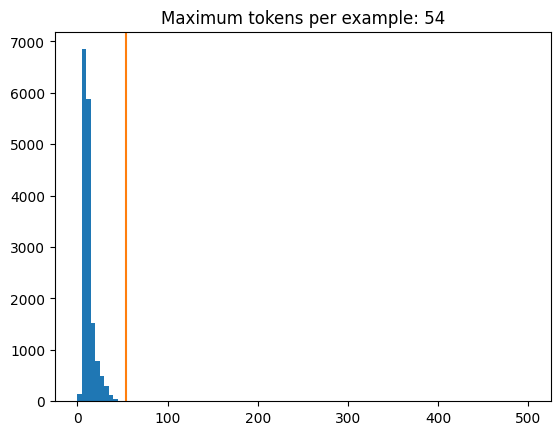

In [30]:
all_lengths = np.concatenate(lengths)

plt.hist(all_lengths, np.linspace(0, 500, 101))
plt.ylim(plt.ylim())
max_length = max(all_lengths)
plt.plot([max_length, max_length], plt.ylim())
plt.title(f'Maximum tokens per example: {max_length}');

### Set up a data pipeline with `tf.data`

The following function takes batches of text as input, and converts them to a format suitable for training.

1. It tokenizes them into ragged batches.
2. It trims each to be no longer than `MAX_TOKENS`.
3. It splits the target (French) tokens into inputs and labels. These are shifted by one step so that at each input location the `label` is the id of the next token.
4. It converts the `RaggedTensor`s to padded dense `Tensor`s.
5. It returns an `(inputs, labels)` pair.


In [31]:
MAX_TOKENS=128
def prepare_batch(dyu, fr):
    dyu = tokenizers.dyu.tokenize(dyu)      # Output is ragged.
    dyu = dyu[:, :MAX_TOKENS]    # Trim to MAX_TOKENS.
    dyu = dyu.to_tensor()  # Convert to 0-padded dense Tensor

    fr = tokenizers.fr.tokenize(fr)
    fr = fr[:, :(MAX_TOKENS+1)]
    fr_inputs = fr[:, :-1].to_tensor()  # Drop the [END] tokens
    fr_labels = fr[:, 1:].to_tensor()   # Drop the [START] tokens

    return (dyu, fr_inputs), fr_labels

The function below converts a dataset of text examples into data of batches for training.

1. It tokenizes the text, and filters out the sequences that are too long.
   (The `batch`/`unbatch` is included because the tokenizer is much more efficient on large batches).
2. The `cache` method ensures that that work is only executed once.
3. Then `shuffle` and, `dense_to_ragged_batch` randomize the order and assemble batches of examples.
4. Finally `prefetch` runs the dataset in parallel with the model to ensure that data is available when needed. See [Better performance with the `tf.data`](https://www.tensorflow.org/guide/data_performance.ipynb) for details.

In [32]:
BUFFER_SIZE = 20000
BATCH_SIZE = 64

In [33]:
def make_batches(ds):
  return (
      ds
      .shuffle(BUFFER_SIZE)
      .batch(BATCH_SIZE)
      .map(prepare_batch, tf.data.AUTOTUNE)
      .prefetch(buffer_size=tf.data.AUTOTUNE))

 </section>

## Test the Dataset

In [34]:
# Create training and validation set batches.
train_batches = make_batches(train_examples)
val_batches = make_batches(val_examples)

The resulting `tf.data.Dataset` objects are setup for training with Keras.
Keras `Model.fit` training expects `(inputs, labels)` pairs.
The `inputs` are pairs of tokenized Dyula and French sequences, `(dyu, fr)`.
The `labels` are the same French sequences shifted by 1.
This shift is so that at each location input `fr` sequence, the `label` in the next token.


In [35]:
for (dyu, fr), fr_labels in train_batches.take(1):
  break

print(dyu.shape)
print(fr.shape)
print(fr_labels.shape)

(64, 31)
(64, 34)
(64, 34)


2024-07-10 16:18:27.277052: E tensorflow/core/util/util.cc:131] oneDNN supports DT_INT64 only on platforms with AVX-512. Falling back to the default Eigen-based implementation if present.


The `en` and `en_labels` are the same, just shifted by 1:

In [36]:
print(fr[0][:10])
print(fr_labels[0][:10])

tf.Tensor([  2  46 835 202   8 131 946 151  10 122], shape=(10,), dtype=int64)
tf.Tensor([ 46 835 202   8 131 946 151  10 122 200], shape=(10,), dtype=int64)


## Define the components

There's a lot going on inside a Transformer. The important things to remember are:

1. It follows the same general pattern as a standard sequence-to-sequence model with an encoder and a decoder.
2. If you work through it step by step it will all make sense.

<table>
<tr>
  <th colspan=1>The original Transformer diagram</th>
  <th colspan=1>A representation of a 4-layer Transformer</th>
</tr>
<tr>
  <td>
   <img width=400 src="https://www.tensorflow.org/images/tutorials/transformer/transformer.png"/>
  </td>
  <td>
   <img width=307 src="https://www.tensorflow.org/images/tutorials/transformer/Transformer-4layer-compact.png"/>
  </td>
</tr>
</table>

### The embedding and positional encoding layer

The inputs to both the encoder and decoder use the same embedding and positional encoding logic.

<table>
<tr>
  <th colspan=1>The embedding and positional encoding layer</th>
<tr>
<tr>
  <td>
   <img src="https://www.tensorflow.org/images/tutorials/transformer/PositionalEmbedding.png"/>
  </td>
</tr>
</table>

Given a sequence of tokens, both the input tokens (Dyula) and target tokens (French) have to be converted to vectors using a `tf.keras.layers.Embedding` layer.

The attention layers used throughout the model see their input as a set of vectors, with no order. Since the model doesn't contain any recurrent or convolutional layers. It needs some way to identify word order, otherwise it would see the input sequence as a [bag of words](https://developers.google.com/machine-learning/glossary#bag-of-words) instance, `how are you`, `how you are`, `you how are`, and so on, are indistinguishable.

A Transformer adds a "Positional Encoding" to the embedding vectors. It uses a set of sines and cosines at different frequencies (across the sequence). By definition nearby elements will have similar position encodings.

The original paper uses the following formula for calculating the positional encoding:

$$\Large{PE_{(pos, 2i)} = \sin(pos / 10000^{2i / d_{model}})} $$
$$\Large{PE_{(pos, 2i+1)} = \cos(pos / 10000^{2i / d_{model}})} $$

Note: The code below implements it, but instead of interleaving the sines and cosines, the vectors of sines and cosines are simply concatenated. Permuting the channels like this is functionally equivalent, and just a little easier to implement and show in the plots below.

In [37]:
def positional_encoding(length, depth):
  depth = depth/2

  positions = np.arange(length)[:, np.newaxis]     # (seq, 1)
  depths = np.arange(depth)[np.newaxis, :]/depth   # (1, depth)

  angle_rates = 1 / (10000**depths)         # (1, depth)
  angle_rads = positions * angle_rates      # (pos, depth)

  pos_encoding = np.concatenate(
      [np.sin(angle_rads), np.cos(angle_rads)],
      axis=-1)

  return tf.cast(pos_encoding, dtype=tf.float32)

The position encoding function is a stack of sines and cosines that vibrate at different frequencies depending on their location along the depth of the embedding vector. They vibrate across the position axis.

(2048, 512)


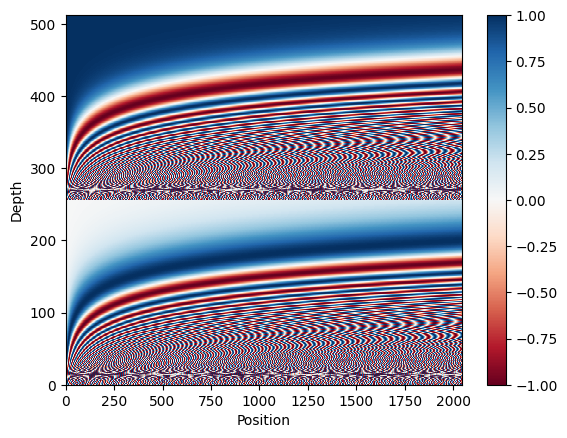

In [38]:
#@title
pos_encoding = positional_encoding(length=2048, depth=512)

# Check the shape.
print(pos_encoding.shape)

# Plot the dimensions.
plt.pcolormesh(pos_encoding.numpy().T, cmap='RdBu')
plt.ylabel('Depth')
plt.xlabel('Position')
plt.colorbar()
plt.show()

By definition these vectors align well with nearby vectors along the position axis. Below the position encoding vectors are normalized and the vector from position `1000` is compared, by dot-product, to all the others:

(0.0, 1.0)

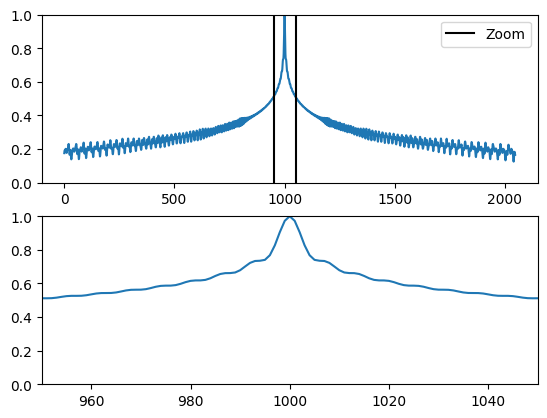

In [39]:
#@title
pos_encoding/=tf.norm(pos_encoding, axis=1, keepdims=True)
p = pos_encoding[1000]
dots = tf.einsum('pd,d -> p', pos_encoding, p)
plt.subplot(2,1,1)
plt.plot(dots)
plt.ylim([0,1])
plt.plot([950, 950, float('nan'), 1050, 1050],
         [0,1,float('nan'),0,1], color='k', label='Zoom')
plt.legend()
plt.subplot(2,1,2)
plt.plot(dots)
plt.xlim([950, 1050])
plt.ylim([0,1])

So use this to create a `PositionEmbedding` layer that looks-up a token's embedding vector and adds the position vector:

In [40]:
class PositionalEmbedding(tf.keras.layers.Layer):
  def __init__(self, vocab_size, d_model):
    super().__init__()
    self.d_model = d_model
    self.embedding = tf.keras.layers.Embedding(vocab_size, d_model, mask_zero=True)
    self.pos_encoding = positional_encoding(length=2048, depth=d_model)

  def compute_mask(self, *args, **kwargs):
    return self.embedding.compute_mask(*args, **kwargs)

  def call(self, x):
    length = tf.shape(x)[1]
    x = self.embedding(x)
    # This factor sets the relative scale of the embedding and positonal_encoding.
    x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
    x = x + self.pos_encoding[tf.newaxis, :length, :]
    return x


In [41]:
embed_dyu = PositionalEmbedding(vocab_size=tokenizers.dyu.get_vocab_size().numpy(), d_model=512)
embed_fr = PositionalEmbedding(vocab_size=tokenizers.fr.get_vocab_size().numpy(), d_model=512)

dyu_emb = embed_dyu(dyu)
fr_emb = embed_fr(fr)

In [42]:
fr_emb._keras_mask

<tf.Tensor: shape=(64, 34), dtype=bool, numpy=
array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])>

### Add and normalize

<table>
<tr>
  <th colspan=2>Add and normalize</th>
<tr>
<tr>
  <td>
   <img src="https://www.tensorflow.org/images/tutorials/transformer/Add+Norm.png"/>
  </td>
</tr>
</table>

These "Add & Norm" blocks are scattered throughout the model. Each one joins a residual connection and runs the result through a `LayerNormalization` layer.

The easiest way to organize the code is around these residual blocks. The following sections will define custom layer classes for each.

The residual "Add & Norm" blocks are included so that training is efficient. The residual connection provides a direct path for the gradient (and ensures that vectors are **updated** by the attention layers instead of **replaced**), while the normalization maintains a reasonable scale for the outputs.

Note: The implementations, below, use the `Add` layer to ensure that Keras masks are propagated (the `+` operator does not).



### The base attention layer

Attention layers are used throughout the model. These are all identical except for how the attention is configured. Each one contains a `layers.MultiHeadAttention`, a `layers.LayerNormalization` and a `layers.Add`.

<table>
<tr>
  <th colspan=2>The base attention layer</th>
<tr>
<tr>
  <td>
   <img src="https://www.tensorflow.org/images/tutorials/transformer/BaseAttention.png"/>
  </td>
</tr>
</table>

To implement these attention layers, start with a simple base class that just contains the component layers. Each use-case will be implemented as a subclass. It's a little more code to write this way, but it keeps the intention clear.

In [43]:
class BaseAttention(tf.keras.layers.Layer):
  def __init__(self, **kwargs):
    super().__init__()
    self.mha = tf.keras.layers.MultiHeadAttention(**kwargs)
    self.layernorm = tf.keras.layers.LayerNormalization()
    self.add = tf.keras.layers.Add()

#### Attention refresher

Before you get into the specifics of each usage, here is a quick refresher on how attention works:

<table>
<tr>
  <th colspan=1>The base attention layer</th>
</tr>
<tr>
  <td>
   <img width=430 src="https://www.tensorflow.org/images/tutorials/transformer/BaseAttention-new.png"/>
  </td>
</tr>
</table>

There are two inputs:

1. The query sequence; the sequence being processed; the sequence doing the attending (bottom).
2. The context sequence; the sequence being attended to (left).

The output has the same shape as the query-sequence.

The common comparison is that this operation is like a dictionary lookup.
A **fuzzy**, **differentiable**, **vectorized** dictionary lookup.

Here's a regular python dictionary, with 3 keys and 3 values being passed a single query.

```
d = {'color': 'blue', 'age': 22, 'type': 'pickup'}
result = d['color']
```

- The `query`s is what you're trying to find.
- The `key`s what sort of information the dictionary has.
- The `value` is that information.

When you look up a `query` in a regular dictionary, the dictionary finds the matching `key`, and returns its associated `value`.
The `query` either has a matching `key` or it doesn't.
You can imagine a **fuzzy** dictionary where the keys don't have to match perfectly.
If you looked up `d["species"]` in the dictionary above, maybe you'd want it to return `"pickup"` since that's the best match for the query.

An attention layer does a fuzzy lookup like this, but it's not just looking for the best key.
It combines the `values` based on how well the `query` matches each `key`.

How does that work? In an attention layer the `query`, `key`, and `value` are each vectors.
Instead of doing a hash lookup the attention layer combines the `query` and `key` vectors to determine how well they match, the "attention score".
The layer returns the average across all the `values`, weighted by the "attention scores".

Each location the query-sequence provides a `query` vector.
The context sequence acts as the dictionary. At each location in the context sequence provides a `key` and `value` vector.
The input vectors are not used directly, the `layers.MultiHeadAttention` layer includes `layers.Dense` layers to project the input vectors before using them.


### The cross attention layer

At the literal center of the Transformer is the cross-attention layer. This layer connects the encoder and decoder. This layer is the most straight-forward use of attention in the model, it performs the same task as the attention block in the [NMT with attention tutorial](https://www.tensorflow.org/text/tutorials/nmt_with_attention).

<table>
<tr>
  <th colspan=1>The cross attention layer</th>
<tr>
<tr>
  <td>
   <img src="https://www.tensorflow.org/images/tutorials/transformer/CrossAttention.png"/>
  </td>
</tr>
</table>

To implement this you pass the target sequence `x` as the `query` and the `context` sequence as the `key/value` when calling the `mha` layer:

In [44]:
class CrossAttention(BaseAttention):
  def call(self, x, context):
    attn_output, attn_scores = self.mha(
        query=x,
        key=context,
        value=context,
        return_attention_scores=True)

    # Cache the attention scores for plotting later.
    self.last_attn_scores = attn_scores

    x = self.add([x, attn_output])
    x = self.layernorm(x)

    return x

The caricature below shows how information flows through this layer. The columns represent the weighted sum over the context sequence.

For simplicity the residual connections are not shown.

<table>
<tr>
  <th>The cross attention layer</th>
</tr>
<tr>
  <td>
   <img width=430 src="https://www.tensorflow.org/images/tutorials/transformer/CrossAttention-new-full.png"/>
  </td>
</tr>
</table>

The output length is the length of the `query` sequence, and not the length of the context `key/value` sequence.

The diagram is further simplified, below. There's no need to draw the entire "Attention weights" matrix.
The point is that each `query` location can see all the `key/value` pairs in the context, but no information is exchanged between the queries.

<table>
<tr>
  <th>Each query sees the whole context.</th>
</tr>
<tr>
  <td>
   <img width=430 src="https://www.tensorflow.org/images/tutorials/transformer/CrossAttention-new.png"/>
  </td>
</tr>
</table>

Test run it on sample inputs:

In [45]:
sample_ca = CrossAttention(num_heads=2, key_dim=512)

print(dyu_emb.shape)
print(fr_emb.shape)
print(sample_ca(fr_emb, dyu_emb).shape)

(64, 31, 512)
(64, 34, 512)


/home/amini/Downloads/french-dyula/env/lib/python3.11/site-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'query' (of type EinsumDense) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/home/amini/Downloads/french-dyula/env/lib/python3.11/site-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'key' (of type EinsumDense) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/home/amini/Downloads/french-dyula/env/lib/python3.11/site-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'value' (of type EinsumDense) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layer

(64, 34, 512)


/home/amini/Downloads/french-dyula/env/lib/python3.11/site-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'cross_attention' (of type CrossAttention) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


### The global self-attention layer

This layer is responsible for processing the context sequence, and propagating information along its length:

<table>
<tr>
  <th colspan=1>The global self-attention layer</th>
<tr>
<tr>
  <td>
   <img src="https://www.tensorflow.org/images/tutorials/transformer/SelfAttention.png"/>
  </td>
</tr>
</table>

Since the context sequence is fixed while the translation is being generated, information is allowed to flow in both directions.

Before Transformers and self-attention, models commonly used RNNs or CNNs to do this task:

<table>
<tr>
  <th colspan=1>Bidirectional RNNs and CNNs</th>
</tr>
<tr>
  <td>
   <img width=500 src="https://www.tensorflow.org/images/tutorials/transformer/RNN-bidirectional.png"/>
  </td>
</tr>
<tr>
  <td>
   <img width=500 src="https://www.tensorflow.org/images/tutorials/transformer/CNN.png"/>
  </td>
</tr>
</table>

RNNs and CNNs have their limitations.

- The RNN allows information to flow all the way across the sequence, but it passes through many processing steps to get there (limiting gradient flow). These RNN steps have to be run sequentially and so the RNN is less able to take advantage of modern parallel devices.
- In the CNN each location can be processed in parallel, but it only provides a limited receptive field. The receptive field only grows linearly with the number of CNN layers,  You need to stack a number of Convolution layers to transmit information across the sequence ([Wavenet](https://arxiv.org/abs/1609.03499) reduces this problem by using dilated convolutions).

The global self-attention layer on the other hand lets every sequence element directly access every other sequence element, with only a few operations, and all the outputs can be computed in parallel.

To implement this layer you just need to pass the target sequence, `x`, as both the `query`, and `value` arguments to the `mha` layer:

In [46]:
class GlobalSelfAttention(BaseAttention):
  def call(self, x):
    attn_output = self.mha(
        query=x,
        value=x,
        key=x)
    x = self.add([x, attn_output])
    x = self.layernorm(x)
    return x

In [47]:
sample_gsa = GlobalSelfAttention(num_heads=2, key_dim=512)

print(dyu_emb.shape)
print(sample_gsa(dyu_emb).shape)

(64, 31, 512)
(64, 31, 512)


/home/amini/Downloads/french-dyula/env/lib/python3.11/site-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'global_self_attention' (of type GlobalSelfAttention) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


Sticking with the same style as before you could draw it like this:

<table>
<tr>
  <th colspan=1>The global self-attention layer</th>
<tr>
<tr>
  <td>
   <img width=330 src="https://www.tensorflow.org/images/tutorials/transformer/SelfAttention-new-full.png"/>
  </td>
</tr>
</table>

Again, the residual connections are omitted for clarity.

It's more compact, and just as accurate to draw it like this:

<table>
<tr>
  <th colspan=1>The global self-attention layer</th>
<tr>
<tr>
  <td>
   <img width=500 src="https://www.tensorflow.org/images/tutorials/transformer/SelfAttention-new.png"/>
  </td>
</tr>
</table>

### The causal self-attention layer

This layer does a similar job as the global self-attention layer, for the output sequence:

<table>
<tr>
  <th colspan=1>The causal self-attention layer</th>
<tr>
<tr>
  <td>
   <img src="https://www.tensorflow.org/images/tutorials/transformer/CausalSelfAttention.png"/>
  </td>
</tr>
</table>

This needs to be handled differently from the encoder's global self-attention layer.  

Like the [text generation tutorial](https://www.tensorflow.org/text/tutorials/text_generation), and the [NMT with attention](https://www.tensorflow.org/text/tutorials/nmt_with_attention) tutorial, Transformers are an "autoregressive" model: They generate the text one token at a time and feed that output back to the input. To make this _efficient_, these models ensure that the output for each sequence element only depends on the previous sequence elements; the models are "causal".

A single-direction RNN is causal by definition. To make a causal convolution you just need to pad the input and shift the output so that it aligns correctly (use `layers.Conv1D(padding='causal')`) .

<table>
<tr>
  <th colspan=1>Causal RNNs and CNNs</th>
</tr>
<tr>
  <td>
   <img width=500 src="https://www.tensorflow.org/images/tutorials/transformer/RNN.png"/>
  </td>
</tr>
<tr>
  <td>
   <img width=500 src="https://www.tensorflow.org/images/tutorials/transformer/CNN-causal.png"/>
  </td>
</tr>
</table>

A causal model is efficient in two ways:

1. In training, it lets you compute loss for every location in the output sequence while executing the model just once.
2. During inference, for each new token generated you only need to calculate its outputs, the outputs for the previous sequence elements can be reused.
  - For an RNN you just need the RNN-state to account for previous computations (pass `return_state=True` to the RNN layer's constructor).
  - For a CNN you would need to follow the approach of [Fast Wavenet](https://arxiv.org/abs/1611.09482)

To build a causal self-attention layer, you need to use an appropriate mask when computing the attention scores and summing the attention `value`s.

This is taken care of automatically if you pass `use_causal_mask = True` to the `MultiHeadAttention` layer when you call it:

In [48]:
class CausalSelfAttention(BaseAttention):
  def call(self, x):
    attn_output = self.mha(
        query=x,
        value=x,
        key=x,
        use_causal_mask = True)
    x = self.add([x, attn_output])
    x = self.layernorm(x)
    return x

The causal mask ensures that each location only has access to the locations that come before it:

<table>
<tr>
  <th colspan=1>The causal self-attention layer</th>
<tr>
<tr>
  <td>
   <img width=330 src="https://www.tensorflow.org/images/tutorials/transformer/CausalSelfAttention-new-full.png"/>
  </td>
</tr>
</table>

Again, the residual connections are omitted for simplicity.

The more compact representation of this layer would be:

<table>
</tr>
  <th colspan=1>The causal self-attention layer</th>
<tr>
<tr>
  <td>
   <img width=430 src="https://www.tensorflow.org/images/tutorials/transformer/CausalSelfAttention-new.png"/>
  </td>
</tr>
</table>

Test out the layer:

In [49]:
sample_csa = CausalSelfAttention(num_heads=2, key_dim=512)

print(fr_emb.shape)
print(sample_csa(fr_emb).shape)

(64, 34, 512)
(64, 34, 512)


/home/amini/Downloads/french-dyula/env/lib/python3.11/site-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'causal_self_attention' (of type CausalSelfAttention) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


The output for early sequence elements doesn't depend on later elements, so it shouldn't matter if you trim elements before or after applying the layer:

In [50]:
out1 = sample_csa(embed_fr(fr[:, :3]))
out2 = sample_csa(embed_fr(fr))[:, :3]

tf.reduce_max(abs(out1 - out2)).numpy()

0.000111699104

Note: When using Keras masks, the output values at invalid locations are not well defined. So the above may not hold for masked regions.

### The feed forward network

The transformer also includes this point-wise feed-forward network in both the encoder and decoder:

<table>
<tr>
  <th colspan=1>The feed forward network</th>
<tr>
<tr>
  <td>
   <img src="https://www.tensorflow.org/images/tutorials/transformer/FeedForward.png"/>
  </td>
</tr>
</table>

The network consists of two linear layers (`tf.keras.layers.Dense`) with a ReLU activation in-between, and a dropout layer. As with the attention layers the code here also includes the residual connection and normalization:

In [51]:
class FeedForward(tf.keras.layers.Layer):
  def __init__(self, d_model, dff, dropout_rate=0.1):
    super().__init__()
    self.seq = tf.keras.Sequential([
      tf.keras.layers.Dense(dff, activation='relu'),
      tf.keras.layers.Dense(d_model),
      tf.keras.layers.Dropout(dropout_rate)
    ])
    self.add = tf.keras.layers.Add()
    self.layer_norm = tf.keras.layers.LayerNormalization()

  def call(self, x):
    x = self.add([x, self.seq(x)])
    x = self.layer_norm(x)
    return x

Test the layer, the output is the same shape as the input:

In [52]:
sample_ffn = FeedForward(512, 2048)

print(fr_emb.shape)
print(sample_ffn(fr_emb).shape)

(64, 34, 512)
(64, 34, 512)


/home/amini/Downloads/french-dyula/env/lib/python3.11/site-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'sequential' (of type Sequential) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/home/amini/Downloads/french-dyula/env/lib/python3.11/site-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'feed_forward' (of type FeedForward) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


### The encoder layer

The encoder contains a stack of `N` encoder layers. Where each `EncoderLayer` contains a `GlobalSelfAttention` and `FeedForward` layer:

<table>
<tr>
  <th colspan=1>The encoder layer</th>
<tr>
<tr>
  <td>
   <img src="https://www.tensorflow.org/images/tutorials/transformer/EncoderLayer.png"/>
  </td>
</tr>
</table>

Here is the definition of the `EncoderLayer`:

In [53]:
class EncoderLayer(tf.keras.layers.Layer):
  def __init__(self,*, d_model, num_heads, dff, dropout_rate=0.1):
    super().__init__()

    self.self_attention = GlobalSelfAttention(
        num_heads=num_heads,
        key_dim=d_model,
        dropout=dropout_rate)

    self.ffn = FeedForward(d_model, dff)

  def call(self, x):
    x = self.self_attention(x)
    x = self.ffn(x)
    return x

And a quick test, the output will have the same shape as the input:

In [54]:
sample_encoder_layer = EncoderLayer(d_model=512, num_heads=8, dff=2048)

print(dyu_emb.shape)
print(sample_encoder_layer(dyu_emb).shape)

(64, 31, 512)
(64, 31, 512)


/home/amini/Downloads/french-dyula/env/lib/python3.11/site-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'global_self_attention_1' (of type GlobalSelfAttention) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/home/amini/Downloads/french-dyula/env/lib/python3.11/site-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'sequential_1' (of type Sequential) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/home/amini/Downloads/french-dyula/env/lib/python3.11/site-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'feed_forward_1' (of type FeedForward) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore des

### The encoder

Next build the encoder.

<table>
<tr>
  <th colspan=1>The encoder</th>
<tr>
<tr>
  <td>
   <img src="https://www.tensorflow.org/images/tutorials/transformer/Encoder.png"/>
  </td>
</tr>
</table>

The encoder consists of:

- A `PositionalEmbedding` layer at the input.
- A stack of `EncoderLayer` layers.

In [55]:
class Encoder(tf.keras.layers.Layer):
  def __init__(self, *, num_layers, d_model, num_heads,
               dff, vocab_size, dropout_rate=0.1):
    super().__init__()

    self.d_model = d_model
    self.num_layers = num_layers

    self.pos_embedding = PositionalEmbedding(
        vocab_size=vocab_size, d_model=d_model)

    self.enc_layers = [
        EncoderLayer(d_model=d_model,
                     num_heads=num_heads,
                     dff=dff,
                     dropout_rate=dropout_rate)
        for _ in range(num_layers)]
    self.dropout = tf.keras.layers.Dropout(dropout_rate)

  def call(self, x):
    # `x` is token-IDs shape: (batch, seq_len)
    x = self.pos_embedding(x)  # Shape `(batch_size, seq_len, d_model)`.

    # Add dropout.
    x = self.dropout(x)

    for i in range(self.num_layers):
      x = self.enc_layers[i](x)

    return x  # Shape `(batch_size, seq_len, d_model)`.

Test the encoder:

In [56]:
# Instantiate the encoder.
sample_encoder = Encoder(num_layers=4,
                         d_model=512,
                         num_heads=8,
                         dff=2048,
                         vocab_size=8500)

sample_encoder_output = sample_encoder(dyu, training=False)

# Print the shape.
print(dyu.shape)
print(sample_encoder_output.shape)  # Shape `(batch_size, input_seq_len, d_model)`.

/home/amini/Downloads/french-dyula/env/lib/python3.11/site-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'global_self_attention_2' (of type GlobalSelfAttention) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/home/amini/Downloads/french-dyula/env/lib/python3.11/site-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'sequential_2' (of type Sequential) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/home/amini/Downloads/french-dyula/env/lib/python3.11/site-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'feed_forward_2' (of type FeedForward) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore des

(64, 31)
(64, 31, 512)


### The decoder layer

The decoder's stack is slightly more complex, with each `DecoderLayer` containing a `CausalSelfAttention`, a `CrossAttention`, and a `FeedForward` layer:  

<table>
<tr>
  <th colspan=1>The decoder layer</th>
<tr>
<tr>
  <td>
   <img src="https://www.tensorflow.org/images/tutorials/transformer/DecoderLayer.png"/>
  </td>
</tr>
</table>

In [58]:
class DecoderLayer(tf.keras.layers.Layer):
  def __init__(self,
               *,
               d_model,
               num_heads,
               dff,
               dropout_rate=0.1):
    super(DecoderLayer, self).__init__()

    self.causal_self_attention = CausalSelfAttention(
        num_heads=num_heads,
        key_dim=d_model,
        dropout=dropout_rate)

    self.cross_attention = CrossAttention(
        num_heads=num_heads,
        key_dim=d_model,
        dropout=dropout_rate)

    self.ffn = FeedForward(d_model, dff)

  def call(self, x, context):
    x = self.causal_self_attention(x=x)
    x = self.cross_attention(x=x, context=context)

    # Cache the last attention scores for plotting later
    self.last_attn_scores = self.cross_attention.last_attn_scores

    x = self.ffn(x)  # Shape `(batch_size, seq_len, d_model)`.
    return x

Test the decoder layer:

In [59]:
sample_decoder_layer = DecoderLayer(d_model=512, num_heads=8, dff=2048)

sample_decoder_layer_output = sample_decoder_layer(
    x=fr_emb, context=dyu_emb)

print(fr_emb.shape)
print(dyu_emb.shape)
print(sample_decoder_layer_output.shape)  # `(batch_size, seq_len, d_model)`

(64, 34, 512)
(64, 31, 512)
(64, 34, 512)


/home/amini/Downloads/french-dyula/env/lib/python3.11/site-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'causal_self_attention_1' (of type CausalSelfAttention) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/home/amini/Downloads/french-dyula/env/lib/python3.11/site-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'cross_attention_1' (of type CrossAttention) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/home/amini/Downloads/french-dyula/env/lib/python3.11/site-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'sequential_6' (of type Sequential) was passed an input with a mask attached to it. However, this layer does not support masking and will therefo

### The decoder

Similar to the `Encoder`, the `Decoder` consists of a `PositionalEmbedding`, and a stack of `DecoderLayer`s:

<table>
<tr>
  <th colspan=1>The embedding and positional encoding layer</th>
<tr>
<tr>
  <td>
   <img src="https://www.tensorflow.org/images/tutorials/transformer/Decoder.png"/>
  </td>
</tr>
</table>


Define the decoder by extending `tf.keras.layers.Layer`:

In [60]:
class Decoder(tf.keras.layers.Layer):
  def __init__(self, *, num_layers, d_model, num_heads, dff, vocab_size,
               dropout_rate=0.1):
    super(Decoder, self).__init__()

    self.d_model = d_model
    self.num_layers = num_layers

    self.pos_embedding = PositionalEmbedding(vocab_size=vocab_size,
                                             d_model=d_model)
    self.dropout = tf.keras.layers.Dropout(dropout_rate)
    self.dec_layers = [
        DecoderLayer(d_model=d_model, num_heads=num_heads,
                     dff=dff, dropout_rate=dropout_rate)
        for _ in range(num_layers)]

    self.last_attn_scores = None

  def call(self, x, context):
    # `x` is token-IDs shape (batch, target_seq_len)
    x = self.pos_embedding(x)  # (batch_size, target_seq_len, d_model)

    x = self.dropout(x)

    for i in range(self.num_layers):
      x  = self.dec_layers[i](x, context)

    self.last_attn_scores = self.dec_layers[-1].last_attn_scores

    # The shape of x is (batch_size, target_seq_len, d_model).
    return x

Test the decoder:

In [61]:
# Instantiate the decoder.
sample_decoder = Decoder(num_layers=4,
                         d_model=512,
                         num_heads=8,
                         dff=2048,
                         vocab_size=8000)

output = sample_decoder(
    x=fr,
    context=dyu_emb)

# Print the shapes.
print(fr.shape)
print(dyu_emb.shape)
print(output.shape)

/home/amini/Downloads/french-dyula/env/lib/python3.11/site-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'causal_self_attention_2' (of type CausalSelfAttention) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/home/amini/Downloads/french-dyula/env/lib/python3.11/site-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'cross_attention_2' (of type CrossAttention) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/home/amini/Downloads/french-dyula/env/lib/python3.11/site-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'sequential_7' (of type Sequential) was passed an input with a mask attached to it. However, this layer does not support masking and will therefo

(64, 34)
(64, 31, 512)
(64, 34, 512)


In [62]:
sample_decoder.last_attn_scores.shape  # (batch, heads, target_seq, input_seq)

TensorShape([64, 8, 34, 31])

Having created the Transformer encoder and decoder, it's time to build the Transformer model and train it.

## The Transformer

You now have `Encoder` and `Decoder`. To complete the `Transformer` model, you need to put them together and add a final linear (`Dense`) layer which converts the resulting vector at each location into output token probabilities.

The output of the decoder is the input to this final linear layer.

<table>
<tr>
  <th colspan=1>The transformer</th>
<tr>
<tr>
  <td>
   <img src="https://www.tensorflow.org/images/tutorials/transformer/transformer.png"/>
  </td>
</tr>
</table>

A `Transformer` with one layer in both the `Encoder` and `Decoder` looks almost exactly like the model from the [RNN+attention tutorial](https://www.tensorflow.org/text/tutorials/nmt_with_attention). A multi-layer Transformer has more layers, but is fundamentally doing the same thing.

<table>
<tr>
  <th colspan=1>A 1-layer transformer</th>
  <th colspan=1>A 4-layer transformer</th>
</tr>
<tr>
  <td>
   <img width=400 src="https://www.tensorflow.org/images/tutorials/transformer/Transformer-1layer-compact.png"/>
  </td>
  <td rowspan=3>
   <img width=330 src="https://www.tensorflow.org/images/tutorials/transformer/Transformer-4layer-compact.png"/>
  </td>
</tr>
<tr>
  <th colspan=1>The RNN+Attention model</th>
</tr>
<tr>
  <td>
   <img width=400 src="https://www.tensorflow.org/images/tutorials/transformer/RNN+attention-compact.png"/>
  </td>
</tr>
</table>

Create the `Transformer` by extending `tf.keras.Model`:

> Note: The [original paper](https://arxiv.org/pdf/1706.03762.pdf), section 3.4, shares the weight matrix between the embedding layer and the final linear layer.

In [63]:
class Transformer(tf.keras.Model):
  def __init__(self, *, num_layers, d_model, num_heads, dff,
               input_vocab_size, target_vocab_size, dropout_rate=0.1):
    super().__init__()
    self.encoder = Encoder(num_layers=num_layers, d_model=d_model,
                           num_heads=num_heads, dff=dff,
                           vocab_size=input_vocab_size,
                           dropout_rate=dropout_rate)

    self.decoder = Decoder(num_layers=num_layers, d_model=d_model,
                           num_heads=num_heads, dff=dff,
                           vocab_size=target_vocab_size,
                           dropout_rate=dropout_rate)

    self.final_layer = tf.keras.layers.Dense(target_vocab_size)

  def call(self, inputs):
    # To use a Keras model with `.fit` you must pass all your inputs in the
    # first argument.
    context, x  = inputs

    context = self.encoder(context)  # (batch_size, context_len, d_model)

    x = self.decoder(x, context)  # (batch_size, target_len, d_model)

    # Final linear layer output.
    logits = self.final_layer(x)  # (batch_size, target_len, target_vocab_size)

    try:
      # Drop the keras mask, so it doesn't scale the losses/metrics.
      # b/250038731
      del logits._keras_mask
    except AttributeError:
      pass

    # Return the final output and the attention weights.
    return logits

### Hyperparameters

To keep this example small and relatively fast, the number of layers (`num_layers`), the dimensionality of the embeddings (`d_model`), and the internal dimensionality of the `FeedForward` layer (`dff`) have been reduced.

The base model described in the original Transformer paper used `num_layers=6`, `d_model=512`, and `dff=2048`.

The number of self-attention heads remains the same (`num_heads=8`).


In [64]:
num_layers = 6
d_model = 512
dff = 2048
num_heads = 8
dropout_rate = 0.1

### Try it out

Instantiate the `Transformer` model:

In [65]:
transformer = Transformer(
    num_layers=num_layers,
    d_model=d_model,
    num_heads=num_heads,
    dff=dff,
    input_vocab_size=tokenizers.dyu.get_vocab_size().numpy(),
    target_vocab_size=tokenizers.fr.get_vocab_size().numpy(),
    dropout_rate=dropout_rate)

Test it:

In [66]:
output = transformer((dyu, fr))

print(fr.shape)
print(dyu.shape)
print(output.shape)

/home/amini/Downloads/french-dyula/env/lib/python3.11/site-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'global_self_attention_6' (of type GlobalSelfAttention) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/home/amini/Downloads/french-dyula/env/lib/python3.11/site-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'sequential_11' (of type Sequential) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/home/amini/Downloads/french-dyula/env/lib/python3.11/site-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'feed_forward_11' (of type FeedForward) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore d

(64, 34)
(64, 31)
(64, 34, 1069)


In [67]:
attn_scores = transformer.decoder.dec_layers[-1].last_attn_scores
print(attn_scores.shape)  # (batch, heads, target_seq, input_seq)

(64, 8, 34, 31)


Print the summary of the model:

In [68]:
# transformer.summary()

## Training

It's time to prepare the model and start training it.

### Set up the optimizer

Use the Adam optimizer with a custom learning rate scheduler according to the formula in the original Transformer [paper](https://arxiv.org/abs/1706.03762).

$$\Large{lrate = d_{model}^{-0.5} * \min(step{\_}num^{-0.5}, step{\_}num \cdot warmup{\_}steps^{-1.5})}$$

In [69]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
  def __init__(self, d_model, warmup_steps=4000):
    super().__init__()

    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)

    self.warmup_steps = warmup_steps

  def __call__(self, step):
    step = tf.cast(step, dtype=tf.float32)
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps ** -1.5)

    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

Instantiate the optimizer (in this example it's `tf.keras.optimizers.Adam`):

In [70]:
learning_rate = CustomSchedule(d_model)

optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98,
                                     epsilon=1e-9)

Test the custom learning rate scheduler:

Text(0.5, 0, 'Train Step')

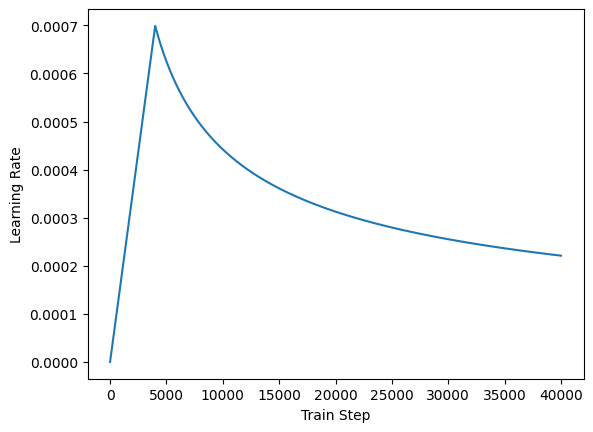

In [71]:
plt.plot(learning_rate(tf.range(40000, dtype=tf.float32)))
plt.ylabel('Learning Rate')
plt.xlabel('Train Step')

### Set up the loss and metrics

Since the target sequences are padded, it is important to apply a padding mask when calculating the loss. Use the cross-entropy loss function (`tf.keras.losses.SparseCategoricalCrossentropy`):

In [72]:
def masked_loss(label, pred):
  mask = label != 0
  loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')
  loss = loss_object(label, pred)

  mask = tf.cast(mask, dtype=loss.dtype)
  loss *= mask

  loss = tf.reduce_sum(loss)/tf.reduce_sum(mask)
  return loss


def masked_accuracy(label, pred):
  pred = tf.argmax(pred, axis=2)
  label = tf.cast(label, pred.dtype)
  match = label == pred

  mask = label != 0

  match = match & mask

  match = tf.cast(match, dtype=tf.float32)
  mask = tf.cast(mask, dtype=tf.float32)
  return tf.reduce_sum(match)/tf.reduce_sum(mask)

### Train the model

With all the components ready, configure the training procedure using `model.compile`, and then run it with `model.fit`:

Note: This takes about an hour to train in Colab.

In [73]:
transformer.compile(
    loss=masked_loss,
    optimizer=optimizer,
    metrics=[masked_accuracy])

In [74]:
transformer.fit(train_batches,
                epochs=20,
                validation_data=val_batches)

Epoch 1/20


I0000 00:00:1720618371.340960 2577134 service.cc:145] XLA service 0x7f548002d380 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1720618371.340993 2577134 service.cc:153]   StreamExecutor device (0): NVIDIA RTX A6000, Compute Capability 8.6
I0000 00:00:1720618371.340997 2577134 service.cc:153]   StreamExecutor device (1): NVIDIA RTX A6000, Compute Capability 8.6
2024-07-10 16:32:52.424487: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
W0000 00:00:1720618374.216452 2577134 assert_op.cc:38] Ignoring Assert operator compile_loss/masked_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert
2024-07-10 16:32:56.151198: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1720618379.379574 2653908 asm_compiler.cc:369] ptxas warning : Regi

  1/127 ━━━━━━━━━━━━━━━━━━━━ 1:49:05 52s/step - loss: 7.2245 - masked_accuracy: 0.0000e+00

W0000 00:00:1720618396.282949 2577122 assert_op.cc:38] Ignoring Assert operator compile_loss/masked_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert
I0000 00:00:1720618400.493796 2655774 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 84 bytes spill stores, 84 bytes spill loads

I0000 00:00:1720618400.955399 2655788 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_335', 420 bytes spill stores, 420 bytes spill loads

I0000 00:00:1720618401.130895 2655779 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_10', 192 bytes spill stores, 192 bytes spill loads

I0000 00:00:1720618401.151004 2655812 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 20 bytes spill stores, 20 bytes spill loads

I0000 00:00:1720618401.

  2/127 ━━━━━━━━━━━━━━━━━━━━ 39:54 19s/step - loss: 7.2334 - masked_accuracy: 0.0000e+00  

W0000 00:00:1720618415.772471 2577134 assert_op.cc:38] Ignoring Assert operator compile_loss/masked_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert
I0000 00:00:1720618419.933300 2657450 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_501', 128 bytes spill stores, 124 bytes spill loads

I0000 00:00:1720618420.427761 2657415 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_10', 464 bytes spill stores, 412 bytes spill loads

I0000 00:00:1720618420.451586 2657437 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_209', 84 bytes spill stores, 84 bytes spill loads

I0000 00:00:1720618421.042128 2657432 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_10', 192 bytes spill stores, 192 bytes spill loads

I0000 00:00:1720618421

  3/127 ━━━━━━━━━━━━━━━━━━━━ 39:45 19s/step - loss: 7.2421 - masked_accuracy: 2.9512e-04

W0000 00:00:1720618435.046759 2577134 assert_op.cc:38] Ignoring Assert operator compile_loss/masked_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert
I0000 00:00:1720618439.279724 2659118 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_10', 192 bytes spill stores, 192 bytes spill loads

I0000 00:00:1720618439.532340 2659121 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_47', 192 bytes spill stores, 192 bytes spill loads

I0000 00:00:1720618439.952051 2659146 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 228 bytes spill stores, 228 bytes spill loads

I0000 00:00:1720618440.165886 2659149 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_422', 108 bytes spill stores, 108 bytes spill loads

I0000 00:00:17206184

  4/127 ━━━━━━━━━━━━━━━━━━━━ 41:34 20s/step - loss: 7.2501 - masked_accuracy: 3.8734e-04

W0000 00:00:1720618457.481395 2577134 assert_op.cc:38] Ignoring Assert operator compile_loss/masked_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert
I0000 00:00:1720618461.477536 2660919 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720618461.617630 2660894 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 84 bytes spill stores, 84 bytes spill loads

I0000 00:00:1720618461.681391 2660911 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 328 bytes spill stores, 328 bytes spill loads

I0000 00:00:1720618472.504670 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Reg

  5/127 ━━━━━━━━━━━━━━━━━━━━ 39:56 20s/step - loss: 7.2537 - masked_accuracy: 5.8163e-04

W0000 00:00:1720618475.097221 2577134 assert_op.cc:38] Ignoring Assert operator compile_loss/masked_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert
I0000 00:00:1720618479.373043 2662307 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 256 bytes spill stores, 256 bytes spill loads

I0000 00:00:1720618479.400885 2662318 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_462', 256 bytes spill stores, 256 bytes spill loads

I0000 00:00:1720618479.991199 2662323 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_420', 108 bytes spill stores, 108 bytes spill loads

I0000 00:00:1720618480.174464 2662304 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_420', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720618480

  6/127 ━━━━━━━━━━━━━━━━━━━━ 40:02 20s/step - loss: 7.2550 - masked_accuracy: 6.7341e-04

W0000 00:00:1720618495.547393 2577120 assert_op.cc:38] Ignoring Assert operator compile_loss/masked_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert
I0000 00:00:1720618499.707617 2664001 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_10', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720618500.435308 2663991 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_10', 28 bytes spill stores, 20 bytes spill loads

I0000 00:00:1720618500.518577 2663973 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_335', 260 bytes spill stores, 268 bytes spill loads

I0000 00:00:1720618500.876288 2663993 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_10', 476 bytes spill stores, 280 bytes spill loads

I0000 00:00:1720618501.0367

  7/127 ━━━━━━━━━━━━━━━━━━━━ 39:43 20s/step - loss: 7.2559 - masked_accuracy: 7.4275e-04

W0000 00:00:1720618515.613353 2577127 assert_op.cc:38] Ignoring Assert operator compile_loss/masked_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert
I0000 00:00:1720618520.017934 2665568 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 528 bytes spill stores, 528 bytes spill loads

I0000 00:00:1720618520.097601 2665543 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_420', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720618520.674563 2665547 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_47', 476 bytes spill stores, 280 bytes spill loads

I0000 00:00:1720618520.714233 2665528 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_47', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720618521.10982

  8/127 ━━━━━━━━━━━━━━━━━━━━ 39:33 20s/step - loss: 7.2558 - masked_accuracy: 8.1509e-04

W0000 00:00:1720618535.980723 2577122 assert_op.cc:38] Ignoring Assert operator compile_loss/masked_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert
I0000 00:00:1720618540.456532 2667207 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_10', 28 bytes spill stores, 20 bytes spill loads

I0000 00:00:1720618540.616989 2667225 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_502', 244 bytes spill stores, 244 bytes spill loads

I0000 00:00:1720618540.617290 2667198 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_10', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720618540.842088 2667210 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_209', 24 bytes spill stores, 24 bytes spill loads

I0000 00:00:1720618541.31163

  9/127 ━━━━━━━━━━━━━━━━━━━━ 38:52 20s/step - loss: 7.2545 - masked_accuracy: 8.5504e-04

W0000 00:00:1720618554.553328 2577125 assert_op.cc:38] Ignoring Assert operator compile_loss/masked_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert
I0000 00:00:1720618559.127909 2668792 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_10', 28 bytes spill stores, 20 bytes spill loads

I0000 00:00:1720618559.542162 2668805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_335', 260 bytes spill stores, 268 bytes spill loads

I0000 00:00:1720618559.576640 2668808 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_10', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720618559.591291 2668817 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 528 bytes spill stores, 528 bytes spill loads

I0000 00:00:1720618559.726

 10/127 ━━━━━━━━━━━━━━━━━━━━ 38:11 20s/step - loss: 7.2527 - masked_accuracy: 8.8943e-04

W0000 00:00:1720618572.589911 2577125 assert_op.cc:38] Ignoring Assert operator compile_loss/masked_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert
I0000 00:00:1720618577.286681 2670271 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_103', 24 bytes spill stores, 24 bytes spill loads

I0000 00:00:1720618577.430460 2670282 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_347', 420 bytes spill stores, 420 bytes spill loads

I0000 00:00:1720618577.703795 2670283 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_10', 28 bytes spill stores, 20 bytes spill loads

I0000 00:00:1720618577.775747 2670308 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_347', 260 bytes spill stores, 268 bytes spill loads

I0000 00:00:1720618578.

 11/127 ━━━━━━━━━━━━━━━━━━━━ 38:18 20s/step - loss: 7.2500 - masked_accuracy: 9.3929e-04

W0000 00:00:1720618594.559368 2577127 assert_op.cc:38] Ignoring Assert operator compile_loss/masked_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert
I0000 00:00:1720618598.274867 2672209 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720618609.230359 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_101', 4 bytes spill stores, 40 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_102', 4 bytes spill stores, 40 b

 12/127 ━━━━━━━━━━━━━━━━━━━━ 37:30 20s/step - loss: 7.2469 - masked_accuracy: 9.7997e-04

W0000 00:00:1720618611.711226 2577127 assert_op.cc:38] Ignoring Assert operator compile_loss/masked_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert
I0000 00:00:1720618616.242230 2673519 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_209', 472 bytes spill stores, 472 bytes spill loads

I0000 00:00:1720618616.264021 2673506 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 544 bytes spill stores, 544 bytes spill loads

I0000 00:00:1720618616.599279 2673528 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_10', 28 bytes spill stores, 20 bytes spill loads

I0000 00:00:1720618616.653180 2673517 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_335', 480 bytes spill stores, 476 bytes spill loads

I0000 00:00:172061861

 13/127 ━━━━━━━━━━━━━━━━━━━━ 37:01 19s/step - loss: 7.2432 - masked_accuracy: 0.0010    

W0000 00:00:1720618630.543363 2577127 assert_op.cc:38] Ignoring Assert operator compile_loss/masked_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert
I0000 00:00:1720618635.203221 2675188 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_209', 24 bytes spill stores, 24 bytes spill loads

I0000 00:00:1720618635.608905 2675169 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_10', 476 bytes spill stores, 280 bytes spill loads

I0000 00:00:1720618635.860657 2675147 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_10', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720618635.899613 2675159 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_335', 260 bytes spill stores, 268 bytes spill loads

I0000 00:00:1720618636.113

 14/127 ━━━━━━━━━━━━━━━━━━━━ 36:41 19s/step - loss: 7.2389 - masked_accuracy: 0.0011

W0000 00:00:1720618649.688585 2577120 assert_op.cc:38] Ignoring Assert operator compile_loss/masked_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert
I0000 00:00:1720618653.641234 2676734 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 20 bytes spill stores, 20 bytes spill loads

I0000 00:00:1720618664.535996 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 15/127 ━━━━━━━━━━━━━━━━━━━━ 36:04 19s/step - loss: 7.2342 - masked_accuracy: 0.0013

W0000 00:00:1720618667.021237 2577120 assert_op.cc:38] Ignoring Assert operator compile_loss/masked_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert
I0000 00:00:1720618671.159777 2678200 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_47', 192 bytes spill stores, 192 bytes spill loads

I0000 00:00:1720618672.153723 2678190 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_47', 464 bytes spill stores, 412 bytes spill loads

I0000 00:00:1720618672.345009 2678193 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_103', 84 bytes spill stores, 84 bytes spill loads

I0000 00:00:1720618672.352018 2678191 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_462', 216 bytes spill stores, 192 bytes spill loads

I0000 00:00:1720618672

 16/127 ━━━━━━━━━━━━━━━━━━━━ 35:40 19s/step - loss: 7.2293 - masked_accuracy: 0.0015

W0000 00:00:1720618685.815787 2577127 assert_op.cc:38] Ignoring Assert operator compile_loss/masked_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert
I0000 00:00:1720618690.336010 2679843 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_47', 28 bytes spill stores, 20 bytes spill loads

I0000 00:00:1720618690.670173 2679859 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_103', 24 bytes spill stores, 24 bytes spill loads

I0000 00:00:1720618690.895324 2679826 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_47', 192 bytes spill stores, 192 bytes spill loads

I0000 00:00:1720618691.192858 2679849 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_47', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720618691.284007

 17/127 ━━━━━━━━━━━━━━━━━━━━ 35:29 19s/step - loss: 7.2242 - masked_accuracy: 0.0019

W0000 00:00:1720618706.360406 2577127 assert_op.cc:38] Ignoring Assert operator compile_loss/masked_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert
I0000 00:00:1720618710.568971 2681560 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 528 bytes spill stores, 528 bytes spill loads

I0000 00:00:1720618721.536584 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_126', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 18/127 ━━━━━━━━━━━━━━━━━━━━ 35:00 19s/step - loss: 7.2186 - masked_accuracy: 0.0025

W0000 00:00:1720618724.257533 2577127 assert_op.cc:38] Ignoring Assert operator compile_loss/masked_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert
I0000 00:00:1720618728.458743 2682944 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_10', 192 bytes spill stores, 192 bytes spill loads

I0000 00:00:1720618728.461848 2682905 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_501', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720618728.513901 2682946 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 16 bytes spill stores, 16 bytes spill loads

I0000 00:00:1720618728.672261 2682925 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 20 bytes spill stores, 20 bytes spill loads

I0000 00:00:1720618728.9420

 19/127 ━━━━━━━━━━━━━━━━━━━━ 34:42 19s/step - loss: 7.2127 - masked_accuracy: 0.0032

W0000 00:00:1720618743.744871 2577127 assert_op.cc:38] Ignoring Assert operator compile_loss/masked_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert
I0000 00:00:1720618748.028936 2684560 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 528 bytes spill stores, 528 bytes spill loads

I0000 00:00:1720618758.350833 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_125', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 20/127 ━━━━━━━━━━━━━━━━━━━━ 34:12 19s/step - loss: 7.2064 - masked_accuracy: 0.0040

I0000 00:00:1720618765.222287 2685907 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 256 bytes spill stores, 256 bytes spill loads

I0000 00:00:1720618775.131227 2577122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_112', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_111', 44 bytes spill stores, 44 bytes spill loads



 21/127 ━━━━━━━━━━━━━━━━━━━━ 33:40 19s/step - loss: 7.2000 - masked_accuracy: 0.0049

I0000 00:00:1720618781.285382 2687258 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720618782.233262 2687255 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_209', 472 bytes spill stores, 472 bytes spill loads

I0000 00:00:1720618782.438149 2687288 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_335', 480 bytes spill stores, 476 bytes spill loads

I0000 00:00:1720618782.551615 2687292 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_335', 260 bytes spill stores, 268 bytes spill loads

I0000 00:00:1720618782.574446 2687259 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_422', 12 bytes spill stores, 12 bytes spill loads

I0000 00:00:1720618782.630516 2

 22/127 ━━━━━━━━━━━━━━━━━━━━ 33:16 19s/step - loss: 7.1931 - masked_accuracy: 0.0058

I0000 00:00:1720618800.204700 2688709 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_462', 220 bytes spill stores, 208 bytes spill loads

I0000 00:00:1720618800.393294 2688734 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_347', 2932 bytes spill stores, 2904 bytes spill loads

I0000 00:00:1720618800.451347 2688702 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_47', 192 bytes spill stores, 192 bytes spill loads

I0000 00:00:1720618800.579418 2688706 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_335', 176 bytes spill stores, 148 bytes spill loads

I0000 00:00:1720618800.603527 2688744 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_347', 176 bytes spill stores, 148 bytes spill loads

I0000 00:00:1720618800.9

 23/127 ━━━━━━━━━━━━━━━━━━━━ 33:04 19s/step - loss: 7.1860 - masked_accuracy: 0.0068

I0000 00:00:1720618820.578317 2690474 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 528 bytes spill stores, 528 bytes spill loads

I0000 00:00:1720618831.498422 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 24/127 ━━━━━━━━━━━━━━━━━━━━ 32:39 19s/step - loss: 7.1787 - masked_accuracy: 0.0078

I0000 00:00:1720618838.673768 2692002 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 100 bytes spill stores, 100 bytes spill loads

I0000 00:00:1720618838.692017 2691983 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 328 bytes spill stores, 276 bytes spill loads

I0000 00:00:1720618849.880597 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_115', 48 bytes spill stores, 48 bytes spill loads



 25/127 ━━━━━━━━━━━━━━━━━━━━ 32:17 19s/step - loss: 7.1712 - masked_accuracy: 0.0088

I0000 00:00:1720618863.912387 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_106', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_105', 44 bytes spill stores, 44 bytes spill loads



 26/127 ━━━━━━━━━━━━━━━━━━━━ 31:38 19s/step - loss: 7.1636 - masked_accuracy: 0.0098

I0000 00:00:1720618870.645002 2694521 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 544 bytes spill stores, 544 bytes spill loads

I0000 00:00:1720618880.453599 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_112', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_111', 44 bytes spill stores, 44 bytes spill loads



 27/127 ━━━━━━━━━━━━━━━━━━━━ 31:11 19s/step - loss: 7.1559 - masked_accuracy: 0.0108

I0000 00:00:1720618887.232688 2695912 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 528 bytes spill stores, 528 bytes spill loads

I0000 00:00:1720618897.900191 2577122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_101', 4 bytes spill stores, 40 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_102', 4 bytes spill stores, 40 bytes spill loads



 28/127 ━━━━━━━━━━━━━━━━━━━━ 30:47 19s/step - loss: 7.1482 - masked_accuracy: 0.0118

I0000 00:00:1720618904.574710 2697377 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 88 bytes spill stores, 76 bytes spill loads

I0000 00:00:1720618914.745514 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_115', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_114', 44 bytes spill stores, 44 bytes spill loads



 29/127 ━━━━━━━━━━━━━━━━━━━━ 30:22 19s/step - loss: 7.1404 - masked_accuracy: 0.0127

I0000 00:00:1720618921.602150 2698669 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_10', 192 bytes spill stores, 192 bytes spill loads

I0000 00:00:1720618921.611290 2698657 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_10', 28 bytes spill stores, 20 bytes spill loads

I0000 00:00:1720618921.636888 2698679 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_10', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720618922.016747 2698661 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_10', 476 bytes spill stores, 280 bytes spill loads

I0000 00:00:1720618922.175434 2698676 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_209', 24 bytes spill stores, 24 bytes spill loads

I0000 00:00:1720618922.376535 2698651

 30/127 ━━━━━━━━━━━━━━━━━━━━ 30:06 19s/step - loss: 7.1325 - masked_accuracy: 0.0137

I0000 00:00:1720618950.636468 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_89', 48 bytes spill stores, 48 bytes spill loads



 31/127 ━━━━━━━━━━━━━━━━━━━━ 29:41 19s/step - loss: 7.1245 - masked_accuracy: 0.0146

I0000 00:00:1720618957.023231 2701538 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 20 bytes spill stores, 20 bytes spill loads

I0000 00:00:1720618957.082147 2701535 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 16 bytes spill stores, 16 bytes spill loads

I0000 00:00:1720618967.209966 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_122', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 32/127 ━━━━━━━━━━━━━━━━━━━━ 29:16 18s/step - loss: 7.1164 - masked_accuracy: 0.0155

I0000 00:00:1720618984.287972 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_98', 4 bytes spill stores, 40 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_89', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_100', 4 bytes spill stores, 40 bytes spill loads



 33/127 ━━━━━━━━━━━━━━━━━━━━ 28:54 18s/step - loss: 7.1083 - masked_accuracy: 0.0164

I0000 00:00:1720618991.085868 2704365 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_10', 192 bytes spill stores, 192 bytes spill loads

I0000 00:00:1720618991.106853 2704366 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_10', 28 bytes spill stores, 20 bytes spill loads

I0000 00:00:1720618991.229563 2704376 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_10', 464 bytes spill stores, 412 bytes spill loads

I0000 00:00:1720618992.040308 2704389 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_335', 260 bytes spill stores, 268 bytes spill loads

I0000 00:00:1720618992.084769 2704393 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_209', 472 bytes spill stores, 472 bytes spill loads

I0000 00:00:1720619002.486090 

 34/127 ━━━━━━━━━━━━━━━━━━━━ 28:34 18s/step - loss: 7.1001 - masked_accuracy: 0.0173

I0000 00:00:1720619016.998579 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_89', 48 bytes spill stores, 48 bytes spill loads



 35/127 ━━━━━━━━━━━━━━━━━━━━ 28:05 18s/step - loss: 7.0919 - masked_accuracy: 0.0182

I0000 00:00:1720619024.553999 2707168 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_103', 24 bytes spill stores, 24 bytes spill loads

I0000 00:00:1720619024.561781 2707154 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_47', 28 bytes spill stores, 20 bytes spill loads

I0000 00:00:1720619024.753024 2707183 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_47', 192 bytes spill stores, 192 bytes spill loads

I0000 00:00:1720619025.031073 2707189 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 544 bytes spill stores, 544 bytes spill loads

I0000 00:00:1720619025.327600 2707199 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_47', 476 bytes spill stores, 280 bytes spill loads

I0000 00:00:1720619025.342425 27

 37/127 ━━━━━━━━━━━━━━━━━━━━ 26:45 18s/step - loss: 7.0756 - masked_accuracy: 0.0199

I0000 00:00:1720619044.209820 2708745 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_47', 476 bytes spill stores, 280 bytes spill loads

I0000 00:00:1720619044.343518 2708747 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_47', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720619044.815331 2708762 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 528 bytes spill stores, 528 bytes spill loads

I0000 00:00:1720619044.819332 2708755 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_47', 28 bytes spill stores, 20 bytes spill loads

I0000 00:00:1720619044.884026 2708748 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_463', 268 bytes spill stores, 268 bytes spill loads

I0000 00:00:1720619044.888869 2708

 38/127 ━━━━━━━━━━━━━━━━━━━━ 26:35 18s/step - loss: 7.0675 - masked_accuracy: 0.0207

I0000 00:00:1720619063.859744 2710469 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 404 bytes spill stores, 380 bytes spill loads

I0000 00:00:1720619063.910750 2710470 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 12 bytes spill stores, 12 bytes spill loads

I0000 00:00:1720619063.988711 2710434 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 104 bytes spill stores, 104 bytes spill loads

I0000 00:00:1720619074.425577 2577122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_112', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add

 39/127 ━━━━━━━━━━━━━━━━━━━━ 26:15 18s/step - loss: 7.0595 - masked_accuracy: 0.0214

I0000 00:00:1720619081.100659 2711884 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_462', 220 bytes spill stores, 208 bytes spill loads

I0000 00:00:1720619082.133645 2711891 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_103', 84 bytes spill stores, 84 bytes spill loads

I0000 00:00:1720619082.373053 2711883 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_47', 192 bytes spill stores, 192 bytes spill loads

I0000 00:00:1720619082.499584 2711866 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_347', 176 bytes spill stores, 148 bytes spill loads

I0000 00:00:1720619082.630479 2711869 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_47', 464 bytes spill stores, 412 bytes spill loads

I0000 00:00:1720619093.543467

 40/127 ━━━━━━━━━━━━━━━━━━━━ 26:00 18s/step - loss: 7.0515 - masked_accuracy: 0.0222

I0000 00:00:1720619111.232289 2577122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_124', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_120', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 36 bytes spill stores, 36 bytes spill loads



 41/127 ━━━━━━━━━━━━━━━━━━━━ 25:42 18s/step - loss: 7.0435 - masked_accuracy: 0.0230

I0000 00:00:1720619118.263178 2714849 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 240 bytes spill stores, 240 bytes spill loads

I0000 00:00:1720619128.728487 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_115', 48 bytes spill stores, 48 bytes spill loads



 42/127 ━━━━━━━━━━━━━━━━━━━━ 25:23 18s/step - loss: 7.0356 - masked_accuracy: 0.0237

I0000 00:00:1720619135.340031 2716273 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 528 bytes spill stores, 528 bytes spill loads

I0000 00:00:1720619145.806997 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 43/127 ━━━━━━━━━━━━━━━━━━━━ 25:03 18s/step - loss: 7.0278 - masked_accuracy: 0.0244

I0000 00:00:1720619152.577883 2717684 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_10', 192 bytes spill stores, 192 bytes spill loads

I0000 00:00:1720619152.689281 2717664 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_10', 28 bytes spill stores, 20 bytes spill loads

I0000 00:00:1720619152.842611 2717670 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_209', 24 bytes spill stores, 24 bytes spill loads

I0000 00:00:1720619153.151562 2717671 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_10', 476 bytes spill stores, 280 bytes spill loads

I0000 00:00:1720619153.464905 2717679 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_10', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720619153.928893 2717691

 45/127 ━━━━━━━━━━━━━━━━━━━━ 23:57 18s/step - loss: 7.0121 - masked_accuracy: 0.0258

I0000 00:00:1720619181.778132 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 46/127 ━━━━━━━━━━━━━━━━━━━━ 23:38 18s/step - loss: 7.0044 - masked_accuracy: 0.0265

I0000 00:00:1720619188.212136 2720652 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 544 bytes spill stores, 544 bytes spill loads

I0000 00:00:1720619198.396570 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 47/127 ━━━━━━━━━━━━━━━━━━━━ 23:19 17s/step - loss: 6.9968 - masked_accuracy: 0.0271

I0000 00:00:1720619204.870136 2721949 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 544 bytes spill stores, 544 bytes spill loads

I0000 00:00:1720619215.239780 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 48/127 ━━━━━━━━━━━━━━━━━━━━ 23:00 17s/step - loss: 6.9892 - masked_accuracy: 0.0277

I0000 00:00:1720619232.106016 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 49/127 ━━━━━━━━━━━━━━━━━━━━ 22:41 17s/step - loss: 6.9818 - masked_accuracy: 0.0284

I0000 00:00:1720619238.625620 2724634 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 20 bytes spill stores, 20 bytes spill loads

I0000 00:00:1720619249.364141 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_126', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 50/127 ━━━━━━━━━━━━━━━━━━━━ 22:24 17s/step - loss: 6.9743 - masked_accuracy: 0.0290

I0000 00:00:1720619256.066569 2726005 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_10', 192 bytes spill stores, 192 bytes spill loads

I0000 00:00:1720619256.121889 2726016 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_10', 28 bytes spill stores, 20 bytes spill loads

I0000 00:00:1720619256.444433 2725975 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_10', 464 bytes spill stores, 412 bytes spill loads

I0000 00:00:1720619256.747139 2725994 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 544 bytes spill stores, 544 bytes spill loads

I0000 00:00:1720619257.160914 2725997 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_209', 472 bytes spill stores, 472 bytes spill loads

I0000 00:00:1720619257.596287 

 52/127 ━━━━━━━━━━━━━━━━━━━━ 21:26 17s/step - loss: 6.9597 - masked_accuracy: 0.0301

I0000 00:00:1720619275.388334 2727642 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 544 bytes spill stores, 544 bytes spill loads

I0000 00:00:1720619286.049459 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 53/127 ━━━━━━━━━━━━━━━━━━━━ 21:09 17s/step - loss: 6.9526 - masked_accuracy: 0.0307

I0000 00:00:1720619292.676470 2729021 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720619292.957677 2729045 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 240 bytes spill stores, 240 bytes spill loads

I0000 00:00:1720619303.259584 2577122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_115', 48 bytes spill stores, 48 bytes spill loads



 54/127 ━━━━━━━━━━━━━━━━━━━━ 20:52 17s/step - loss: 6.9455 - masked_accuracy: 0.0313

I0000 00:00:1720619309.660452 2730510 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 544 bytes spill stores, 544 bytes spill loads

I0000 00:00:1720619319.949694 2577122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_126', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 55/127 ━━━━━━━━━━━━━━━━━━━━ 20:34 17s/step - loss: 6.9384 - masked_accuracy: 0.0318

I0000 00:00:1720619326.288712 2731817 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720619326.591249 2731813 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 224 bytes spill stores, 224 bytes spill loads

I0000 00:00:1720619337.047518 2577122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_112', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_110', 48 bytes spill stores, 48 bytes spill loads



 56/127 ━━━━━━━━━━━━━━━━━━━━ 20:17 17s/step - loss: 6.9315 - masked_accuracy: 0.0323

I0000 00:00:1720619344.054308 2733153 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 12 bytes spill stores, 12 bytes spill loads

I0000 00:00:1720619344.164544 2733148 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 20 bytes spill stores, 20 bytes spill loads

I0000 00:00:1720619354.762254 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_101', 4 bytes spill stores, 40 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_102', 4 bytes spill stores, 40 bytes sp

 57/127 ━━━━━━━━━━━━━━━━━━━━ 20:01 17s/step - loss: 6.9246 - masked_accuracy: 0.0329

I0000 00:00:1720619360.968152 2734570 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720619361.245424 2734560 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 120 bytes spill stores, 100 bytes spill loads

I0000 00:00:1720619372.053931 2577122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_117', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_115', 44 bytes spill stores, 44 bytes spill loads



 58/127 ━━━━━━━━━━━━━━━━━━━━ 19:44 17s/step - loss: 6.9178 - masked_accuracy: 0.0334

I0000 00:00:1720619389.136058 2577122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_135', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 59/127 ━━━━━━━━━━━━━━━━━━━━ 19:26 17s/step - loss: 6.9110 - masked_accuracy: 0.0339

I0000 00:00:1720619395.833086 2737311 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 528 bytes spill stores, 528 bytes spill loads

I0000 00:00:1720619406.528511 2577122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 60/127 ━━━━━━━━━━━━━━━━━━━━ 19:09 17s/step - loss: 6.9043 - masked_accuracy: 0.0344

I0000 00:00:1720619423.706881 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 61/127 ━━━━━━━━━━━━━━━━━━━━ 18:52 17s/step - loss: 6.8977 - masked_accuracy: 0.0349

I0000 00:00:1720619430.357516 2740098 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 32 bytes spill stores, 32 bytes spill loads

I0000 00:00:1720619441.289524 2577122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_112', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_111', 44 bytes spill stores, 44 bytes spill loads



 62/127 ━━━━━━━━━━━━━━━━━━━━ 18:36 17s/step - loss: 6.8911 - masked_accuracy: 0.0354

I0000 00:00:1720619448.437126 2741667 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 240 bytes spill stores, 240 bytes spill loads

I0000 00:00:1720619459.405088 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_115', 48 bytes spill stores, 48 bytes spill loads



 63/127 ━━━━━━━━━━━━━━━━━━━━ 18:19 17s/step - loss: 6.8846 - masked_accuracy: 0.0358

I0000 00:00:1720619466.283938 2743271 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 20 bytes spill stores, 20 bytes spill loads

I0000 00:00:1720619466.295606 2743306 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 16 bytes spill stores, 16 bytes spill loads

I0000 00:00:1720619476.670805 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 64/127 ━━━━━━━━━━━━━━━━━━━━ 18:02 17s/step - loss: 6.8782 - masked_accuracy: 0.0363

I0000 00:00:1720619490.999609 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_89', 48 bytes spill stores, 48 bytes spill loads



 65/127 ━━━━━━━━━━━━━━━━━━━━ 17:42 17s/step - loss: 6.8718 - masked_accuracy: 0.0368

I0000 00:00:1720619507.910606 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_89', 48 bytes spill stores, 48 bytes spill loads



 66/127 ━━━━━━━━━━━━━━━━━━━━ 17:25 17s/step - loss: 6.8655 - masked_accuracy: 0.0372

I0000 00:00:1720619514.481203 2747115 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 84 bytes spill stores, 84 bytes spill loads

I0000 00:00:1720619514.622104 2747101 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 328 bytes spill stores, 328 bytes spill loads

I0000 00:00:1720619525.211727 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_112', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_111', 44 bytes spill stores, 44 bytes spill loads



 67/127 ━━━━━━━━━━━━━━━━━━━━ 17:08 17s/step - loss: 6.8593 - masked_accuracy: 0.0377

I0000 00:00:1720619531.489271 2748489 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720619541.876420 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 68/127 ━━━━━━━━━━━━━━━━━━━━ 16:50 17s/step - loss: 6.8531 - masked_accuracy: 0.0381

I0000 00:00:1720619548.164156 2749922 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720619548.402761 2749906 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 88 bytes spill stores, 72 bytes spill loads

I0000 00:00:1720619559.103919 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_115', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_114', 44 bytes spill stores, 44 bytes spill loads



 70/127 ━━━━━━━━━━━━━━━━━━━━ 16:02 17s/step - loss: 6.8409 - masked_accuracy: 0.0390

I0000 00:00:1720619576.810980 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 71/127 ━━━━━━━━━━━━━━━━━━━━ 15:46 17s/step - loss: 6.8350 - masked_accuracy: 0.0394

I0000 00:00:1720619591.334110 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_89', 48 bytes spill stores, 48 bytes spill loads



 73/127 ━━━━━━━━━━━━━━━━━━━━ 14:58 17s/step - loss: 6.8232 - masked_accuracy: 0.0402

I0000 00:00:1720619598.585439 2753799 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 328 bytes spill stores, 328 bytes spill loads

I0000 00:00:1720619598.659525 2753814 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 84 bytes spill stores, 84 bytes spill loads

I0000 00:00:1720619609.383831 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_115', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_114', 44 bytes spill stores, 44 bytes spill loads



 74/127 ━━━━━━━━━━━━━━━━━━━━ 14:42 17s/step - loss: 6.8173 - masked_accuracy: 0.0406

I0000 00:00:1720619615.949387 2755216 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 544 bytes spill stores, 544 bytes spill loads

I0000 00:00:1720619626.173333 2577122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 75/127 ━━━━━━━━━━━━━━━━━━━━ 14:25 17s/step - loss: 6.8116 - masked_accuracy: 0.0410

I0000 00:00:1720619643.096979 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_118', 48 bytes spill stores, 48 bytes spill loads



 77/127 ━━━━━━━━━━━━━━━━━━━━ 13:41 16s/step - loss: 6.8002 - masked_accuracy: 0.0418

I0000 00:00:1720619650.319892 2757959 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 240 bytes spill stores, 240 bytes spill loads

I0000 00:00:1720619660.504142 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_110', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_109', 48 bytes spill stores, 48 bytes spill loads



 79/127 ━━━━━━━━━━━━━━━━━━━━ 12:59 16s/step - loss: 6.7891 - masked_accuracy: 0.0426

I0000 00:00:1720619667.259175 2759346 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 544 bytes spill stores, 544 bytes spill loads

I0000 00:00:1720619677.449250 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_131', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 80/127 ━━━━━━━━━━━━━━━━━━━━ 12:43 16s/step - loss: 6.7836 - masked_accuracy: 0.0430

I0000 00:00:1720619684.216515 2760736 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 544 bytes spill stores, 544 bytes spill loads

I0000 00:00:1720619694.989149 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_126', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 81/127 ━━━━━━━━━━━━━━━━━━━━ 12:28 16s/step - loss: 6.7781 - masked_accuracy: 0.0434

I0000 00:00:1720619701.136848 2762160 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1720619711.450273 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 82/127 ━━━━━━━━━━━━━━━━━━━━ 12:11 16s/step - loss: 6.7728 - masked_accuracy: 0.0437

I0000 00:00:1720619725.835744 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_89', 48 bytes spill stores, 48 bytes spill loads



 83/127 ━━━━━━━━━━━━━━━━━━━━ 11:54 16s/step - loss: 6.7674 - masked_accuracy: 0.0441

I0000 00:00:1720619732.730778 2764703 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720619732.814048 2764727 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 100 bytes spill stores, 100 bytes spill loads

I0000 00:00:1720619732.845844 2764746 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 264 bytes spill stores, 264 bytes spill loads

I0000 00:00:1720619743.854868 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_118', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_s

 84/127 ━━━━━━━━━━━━━━━━━━━━ 11:39 16s/step - loss: 6.7621 - masked_accuracy: 0.0445

I0000 00:00:1720619750.551051 2766187 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 328 bytes spill stores, 328 bytes spill loads

I0000 00:00:1720619750.622070 2766190 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 84 bytes spill stores, 84 bytes spill loads

I0000 00:00:1720619761.610217 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_115', 48 bytes spill stores, 48 bytes spill loads



 86/127 ━━━━━━━━━━━━━━━━━━━━ 10:59 16s/step - loss: 6.7516 - masked_accuracy: 0.0452

I0000 00:00:1720619779.332352 2577122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_127', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 87/127 ━━━━━━━━━━━━━━━━━━━━ 10:44 16s/step - loss: 6.7465 - masked_accuracy: 0.0456

I0000 00:00:1720619797.133892 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_89', 48 bytes spill stores, 48 bytes spill loads



 88/127 ━━━━━━━━━━━━━━━━━━━━ 10:29 16s/step - loss: 6.7414 - masked_accuracy: 0.0459

I0000 00:00:1720619804.385159 2770629 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 544 bytes spill stores, 544 bytes spill loads

I0000 00:00:1720619814.890111 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_126', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 89/127 ━━━━━━━━━━━━━━━━━━━━ 10:13 16s/step - loss: 6.7363 - masked_accuracy: 0.0463

I0000 00:00:1720619821.221459 2771925 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720619821.525812 2771913 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 88 bytes spill stores, 72 bytes spill loads

I0000 00:00:1720619832.339587 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_112', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_110', 48 bytes spill stores, 48 bytes spill loads



 90/127 ━━━━━━━━━━━━━━━━━━━━ 9:57 16s/step - loss: 6.7313 - masked_accuracy: 0.0466 

I0000 00:00:1720619849.709054 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 92/127 ━━━━━━━━━━━━━━━━━━━━ 9:19 16s/step - loss: 6.7213 - masked_accuracy: 0.0473

I0000 00:00:1720619856.861423 2774800 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 528 bytes spill stores, 528 bytes spill loads

I0000 00:00:1720619867.422770 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 93/127 ━━━━━━━━━━━━━━━━━━━━ 9:04 16s/step - loss: 6.7164 - masked_accuracy: 0.0476

I0000 00:00:1720619874.097926 2776304 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 544 bytes spill stores, 544 bytes spill loads

I0000 00:00:1720619884.445434 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 96/127 ━━━━━━━━━━━━━━━━━━━━ 8:06 16s/step - loss: 6.7020 - masked_accuracy: 0.0486

I0000 00:00:1720619891.920387 2777563 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 220 bytes spill stores, 220 bytes spill loads

I0000 00:00:1720619901.631540 2577122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_93', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_92', 48 bytes spill stores, 48 bytes spill loads



 99/127 ━━━━━━━━━━━━━━━━━━━━ 7:10 15s/step - loss: 6.6880 - masked_accuracy: 0.0496

I0000 00:00:1720619908.816008 2779085 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_462', 296 bytes spill stores, 296 bytes spill loads

I0000 00:00:1720619909.331648 2779065 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_347', 480 bytes spill stores, 476 bytes spill loads

I0000 00:00:1720619909.497912 2779108 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_420', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720619909.648095 2779073 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_347', 260 bytes spill stores, 268 bytes spill loads

I0000 00:00:1720619909.754063 2779078 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_47', 192 bytes spill stores, 192 bytes spill loads

I0000 00:00:1720619909.837313 

100/127 ━━━━━━━━━━━━━━━━━━━━ 6:56 15s/step - loss: 6.6833 - masked_accuracy: 0.0499

I0000 00:00:1720619927.326661 2780627 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 348 bytes spill stores, 324 bytes spill loads

I0000 00:00:1720619927.400943 2780640 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 104 bytes spill stores, 104 bytes spill loads

I0000 00:00:1720619927.556471 2780595 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 12 bytes spill stores, 12 bytes spill loads

I0000 00:00:1720619938.488883 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_115', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add

101/127 ━━━━━━━━━━━━━━━━━━━━ 6:41 15s/step - loss: 6.6788 - masked_accuracy: 0.0502

I0000 00:00:1720619945.607955 2781972 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 228 bytes spill stores, 228 bytes spill loads

I0000 00:00:1720619956.606309 2577122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_115', 48 bytes spill stores, 48 bytes spill loads



103/127 ━━━━━━━━━━━━━━━━━━━━ 6:07 15s/step - loss: 6.6697 - masked_accuracy: 0.0509

I0000 00:00:1720619963.842979 2783511 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 232 bytes spill stores, 232 bytes spill loads

I0000 00:00:1720619974.138922 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_109', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_108', 44 bytes spill stores, 44 bytes spill loads



104/127 ━━━━━━━━━━━━━━━━━━━━ 5:52 15s/step - loss: 6.6652 - masked_accuracy: 0.0512

I0000 00:00:1720619981.009090 2784957 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 12 bytes spill stores, 12 bytes spill loads

I0000 00:00:1720619991.874442 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_89', 48 bytes spill stores, 48 bytes spill loads



105/127 ━━━━━━━━━━━━━━━━━━━━ 5:38 15s/step - loss: 6.6608 - masked_accuracy: 0.0515

I0000 00:00:1720619998.738998 2786303 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 528 bytes spill stores, 528 bytes spill loads

I0000 00:00:1720620009.377989 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



108/127 ━━━━━━━━━━━━━━━━━━━━ 4:46 15s/step - loss: 6.6477 - masked_accuracy: 0.0524

I0000 00:00:1720620016.534463 2787825 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 528 bytes spill stores, 528 bytes spill loads

I0000 00:00:1720620026.598742 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_118', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_101', 4 bytes spill stores, 40 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_102', 4 bytes spill stores, 40 bytes spill loads



109/127 ━━━━━━━━━━━━━━━━━━━━ 4:32 15s/step - loss: 6.6434 - masked_accuracy: 0.0527

I0000 00:00:1720620043.781324 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_89', 48 bytes spill stores, 48 bytes spill loads



110/127 ━━━━━━━━━━━━━━━━━━━━ 4:17 15s/step - loss: 6.6391 - masked_accuracy: 0.0530

I0000 00:00:1720620058.259760 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_89', 48 bytes spill stores, 48 bytes spill loads



111/127 ━━━━━━━━━━━━━━━━━━━━ 4:02 15s/step - loss: 6.6348 - masked_accuracy: 0.0533

I0000 00:00:1720620065.037828 2791751 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 84 bytes spill stores, 84 bytes spill loads

I0000 00:00:1720620075.732753 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_124', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_120', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 36 bytes spill stores, 36 bytes spill loads



112/127 ━━━━━━━━━━━━━━━━━━━━ 3:47 15s/step - loss: 6.6306 - masked_accuracy: 0.0536

I0000 00:00:1720620092.606638 2577122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



113/127 ━━━━━━━━━━━━━━━━━━━━ 3:32 15s/step - loss: 6.6264 - masked_accuracy: 0.0539

I0000 00:00:1720620099.607298 2794548 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 528 bytes spill stores, 528 bytes spill loads

I0000 00:00:1720620110.200457 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



114/127 ━━━━━━━━━━━━━━━━━━━━ 3:17 15s/step - loss: 6.6223 - masked_accuracy: 0.0542

I0000 00:00:1720620126.676109 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_118', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_101', 4 bytes spill stores, 40 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_102', 4 bytes spill stores, 40 bytes spill loads



115/127 ━━━━━━━━━━━━━━━━━━━━ 3:02 15s/step - loss: 6.6181 - masked_accuracy: 0.0544

I0000 00:00:1720620133.590762 2797400 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 544 bytes spill stores, 544 bytes spill loads

I0000 00:00:1720620144.193585 2577122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_126', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



116/127 ━━━━━━━━━━━━━━━━━━━━ 2:47 15s/step - loss: 6.6140 - masked_accuracy: 0.0547

I0000 00:00:1720620150.457576 2798698 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1720620161.098159 2577122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_126', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



118/127 ━━━━━━━━━━━━━━━━━━━━ 2:15 15s/step - loss: 6.6059 - masked_accuracy: 0.0553

I0000 00:00:1720620167.763792 2800043 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 20 bytes spill stores, 20 bytes spill loads

I0000 00:00:1720620167.839121 2800051 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 16 bytes spill stores, 16 bytes spill loads

I0000 00:00:1720620177.909665 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_125', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



119/127 ━━━━━━━━━━━━━━━━━━━━ 2:00 15s/step - loss: 6.6019 - masked_accuracy: 0.0556

I0000 00:00:1720620185.060323 2801462 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_209', 24 bytes spill stores, 24 bytes spill loads

I0000 00:00:1720620185.171116 2801461 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_335', 420 bytes spill stores, 420 bytes spill loads

I0000 00:00:1720620185.679533 2801478 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_10', 476 bytes spill stores, 280 bytes spill loads

I0000 00:00:1720620185.701625 2801471 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_10', 28 bytes spill stores, 20 bytes spill loads

I0000 00:00:1720620185.740877 2801506 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_10', 192 bytes spill stores, 192 bytes spill loads

I0000 00:00:1720620185.994045 28

121/127 ━━━━━━━━━━━━━━━━━━━━ 1:30 15s/step - loss: 6.5940 - masked_accuracy: 0.0561

I0000 00:00:1720620203.798448 2803105 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720620204.050760 2803131 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 104 bytes spill stores, 104 bytes spill loads

I0000 00:00:1720620204.139740 2803120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 348 bytes spill stores, 324 bytes spill loads

I0000 00:00:1720620214.610978 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_118', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_s

123/127 ━━━━━━━━━━━━━━━━━━━━ 59s 15s/step - loss: 6.5862 - masked_accuracy: 0.0567 

I0000 00:00:1720620228.807336 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_110', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_108', 44 bytes spill stores, 44 bytes spill loads



125/127 ━━━━━━━━━━━━━━━━━━━━ 29s 15s/step - loss: 6.5785 - masked_accuracy: 0.0572

I0000 00:00:1720620235.411655 2805623 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 20 bytes spill stores, 20 bytes spill loads

I0000 00:00:1720620245.734377 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_135', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



126/127 ━━━━━━━━━━━━━━━━━━━━ 14s 15s/step - loss: 6.5747 - masked_accuracy: 0.0575

I0000 00:00:1720620252.772459 2806987 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_266', 328 bytes spill stores, 328 bytes spill loads

I0000 00:00:1720620253.003246 2807000 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_268', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1720620253.016377 2806984 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_429', 24 bytes spill stores, 24 bytes spill loads

I0000 00:00:1720620253.535359 2806999 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_429', 16 bytes spill stores, 16 bytes spill loads

I0000 00:00:1720620253.590451 2806985 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_425', 16 bytes spill stores, 16 bytes spill loads

I0000 00:00:1720620254.176650 28069

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - loss: 6.5710 - masked_accuracy: 0.0577 

I0000 00:00:1720620263.613363 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_69', 48 bytes spill stores, 48 bytes spill loads

I0000 00:00:1720620353.343054 2816429 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_10', 228 bytes spill stores, 228 bytes spill loads

I0000 00:00:1720620353.380703 2816421 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_10', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720620353.380739 2816438 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_10', 28 bytes spill stores, 20 bytes spill loads

I0000 00:00:1720620353.415400 2816440 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_47', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720620353.658598 281

127/127 ━━━━━━━━━━━━━━━━━━━━ 2015s 16s/step - loss: 6.5673 - masked_accuracy: 0.0580 - val_loss: 5.5319 - val_masked_accuracy: 0.1282
Epoch 2/20


I0000 00:00:1720620375.136960 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_124', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_120', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 36 bytes spill stores, 36 bytes spill loads



  1/127 ━━━━━━━━━━━━━━━━━━━━ 37:46 18s/step - loss: 5.4853 - masked_accuracy: 0.1190

I0000 00:00:1720620381.579056 2818599 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 544 bytes spill stores, 544 bytes spill loads

I0000 00:00:1720620391.098862 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_117', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 44 bytes spill stores, 44 bytes spill loads



  2/127 ━━━━━━━━━━━━━━━━━━━━ 33:15 16s/step - loss: 5.4800 - masked_accuracy: 0.1221

I0000 00:00:1720620397.115813 2819984 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720620397.244068 2819967 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 296 bytes spill stores, 296 bytes spill loads

I0000 00:00:1720620397.271836 2819989 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 100 bytes spill stores, 100 bytes spill loads

I0000 00:00:1720620407.291298 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_122', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_s

  3/127 ━━━━━━━━━━━━━━━━━━━━ 33:15 16s/step - loss: 5.4872 - masked_accuracy: 0.1234

I0000 00:00:1720620413.637140 2821399 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 544 bytes spill stores, 544 bytes spill loads

I0000 00:00:1720620423.493704 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_115', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_114', 44 bytes spill stores, 44 bytes spill loads



  4/127 ━━━━━━━━━━━━━━━━━━━━ 33:02 16s/step - loss: 5.5037 - masked_accuracy: 0.1238

I0000 00:00:1720620429.466947 2822708 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720620440.038677 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_126', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



  5/127 ━━━━━━━━━━━━━━━━━━━━ 32:58 16s/step - loss: 5.5133 - masked_accuracy: 0.1248

I0000 00:00:1720620445.943793 2824090 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720620446.090873 2824100 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 84 bytes spill stores, 84 bytes spill loads

I0000 00:00:1720620446.146929 2824092 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 328 bytes spill stores, 328 bytes spill loads

I0000 00:00:1720620456.369097 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_112', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_sub

  6/127 ━━━━━━━━━━━━━━━━━━━━ 32:45 16s/step - loss: 5.5227 - masked_accuracy: 0.1257

I0000 00:00:1720620470.978849 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_98', 4 bytes spill stores, 40 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_112', 4 bytes spill stores, 40 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_89', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_100', 4 bytes spill stores, 40 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_106', 4 bytes spill stores, 40 bytes spill loads



  9/127 ━━━━━━━━━━━━━━━━━━━━ 23:38 12s/step - loss: 5.5387 - masked_accuracy: 0.1263

I0000 00:00:1720620477.502158 2826486 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720620477.630500 2826487 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 84 bytes spill stores, 84 bytes spill loads

I0000 00:00:1720620477.699611 2826471 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 356 bytes spill stores, 332 bytes spill loads

I0000 00:00:1720620487.518565 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_120', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_sub

 10/127 ━━━━━━━━━━━━━━━━━━━━ 24:21 12s/step - loss: 5.5407 - masked_accuracy: 0.1265

I0000 00:00:1720620493.652672 2827858 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 216 bytes spill stores, 208 bytes spill loads

I0000 00:00:1720620493.733492 2827849 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 12 bytes spill stores, 12 bytes spill loads

I0000 00:00:1720620503.665006 2577122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_115', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_114', 44 bytes spill stores, 44 bytes spill loads



 11/127 ━━━━━━━━━━━━━━━━━━━━ 24:50 13s/step - loss: 5.5402 - masked_accuracy: 0.1270

I0000 00:00:1720620509.961494 2828920 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 544 bytes spill stores, 544 bytes spill loads

I0000 00:00:1720620520.198568 2577122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_109', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_108', 44 bytes spill stores, 44 bytes spill loads



 13/127 ━━━━━━━━━━━━━━━━━━━━ 22:59 12s/step - loss: 5.5384 - masked_accuracy: 0.1278

I0000 00:00:1720620527.043867 2830395 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1720620527.105723 2830384 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_209', 84 bytes spill stores, 84 bytes spill loads

I0000 00:00:1720620527.429011 2830396 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_10', 464 bytes spill stores, 412 bytes spill loads

I0000 00:00:1720620527.595527 2830383 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_10', 192 bytes spill stores, 192 bytes spill loads

I0000 00:00:1720620528.015647 2830385 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_335', 176 bytes spill stores, 148 bytes spill loads

I0000 00:00:1720620538.570680 257

 16/127 ━━━━━━━━━━━━━━━━━━━━ 20:11 11s/step - loss: 5.5365 - masked_accuracy: 0.1286

I0000 00:00:1720620555.557363 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 18/127 ━━━━━━━━━━━━━━━━━━━━ 19:17 11s/step - loss: 5.5350 - masked_accuracy: 0.1290

I0000 00:00:1720620572.739480 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_124', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_120', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 36 bytes spill stores, 36 bytes spill loads



 20/127 ━━━━━━━━━━━━━━━━━━━━ 18:33 10s/step - loss: 5.5323 - masked_accuracy: 0.1295

I0000 00:00:1720620579.325762 2834632 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 20 bytes spill stores, 20 bytes spill loads

I0000 00:00:1720620590.132922 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_126', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 21/127 ━━━━━━━━━━━━━━━━━━━━ 18:59 11s/step - loss: 5.5307 - masked_accuracy: 0.1297

I0000 00:00:1720620606.857798 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 22/127 ━━━━━━━━━━━━━━━━━━━━ 19:18 11s/step - loss: 5.5289 - masked_accuracy: 0.1300

I0000 00:00:1720620623.590130 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_131', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_101', 4 bytes spill stores, 40 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_102', 4 bytes spill stores, 40 bytes spill loads



 23/127 ━━━━━━━━━━━━━━━━━━━━ 19:34 11s/step - loss: 5.5271 - masked_accuracy: 0.1302

I0000 00:00:1720620640.667693 2577122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_89', 48 bytes spill stores, 48 bytes spill loads



 25/127 ━━━━━━━━━━━━━━━━━━━━ 18:49 11s/step - loss: 5.5235 - masked_accuracy: 0.1307

I0000 00:00:1720620647.754910 2840093 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 280 bytes spill stores, 280 bytes spill loads

I0000 00:00:1720620657.663642 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_127', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_126', 44 bytes spill stores, 44 bytes spill loads



 26/127 ━━━━━━━━━━━━━━━━━━━━ 19:02 11s/step - loss: 5.5220 - masked_accuracy: 0.1308

I0000 00:00:1720620674.626510 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_89', 48 bytes spill stores, 48 bytes spill loads



 28/127 ━━━━━━━━━━━━━━━━━━━━ 18:18 11s/step - loss: 5.5185 - masked_accuracy: 0.1312

I0000 00:00:1720620691.400006 2577122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_110', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_109', 48 bytes spill stores, 48 bytes spill loads



 29/127 ━━━━━━━━━━━━━━━━━━━━ 18:26 11s/step - loss: 5.5165 - masked_accuracy: 0.1314

I0000 00:00:1720620697.297056 2844256 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720620707.717894 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_110', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 31/127 ━━━━━━━━━━━━━━━━━━━━ 17:44 11s/step - loss: 5.5126 - masked_accuracy: 0.1318

I0000 00:00:1720620714.413762 2845629 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 528 bytes spill stores, 528 bytes spill loads

I0000 00:00:1720620724.832838 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_101', 4 bytes spill stores, 40 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_102', 4 bytes spill stores, 40 bytes spill loads



 32/127 ━━━━━━━━━━━━━━━━━━━━ 17:51 11s/step - loss: 5.5106 - masked_accuracy: 0.1319

I0000 00:00:1720620731.253921 2846899 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 16 bytes spill stores, 16 bytes spill loads

I0000 00:00:1720620741.425044 2577122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_89', 48 bytes spill stores, 48 bytes spill loads



 33/127 ━━━━━━━━━━━━━━━━━━━━ 17:55 11s/step - loss: 5.5087 - masked_accuracy: 0.1321

I0000 00:00:1720620747.750196 2848263 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 88 bytes spill stores, 76 bytes spill loads

I0000 00:00:1720620758.505747 2577122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_110', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_109', 48 bytes spill stores, 48 bytes spill loads



 35/127 ━━━━━━━━━━━━━━━━━━━━ 17:17 11s/step - loss: 5.5050 - masked_accuracy: 0.1324

I0000 00:00:1720620776.040514 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_99', 4 bytes spill stores, 40 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_89', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_110', 4 bytes spill stores, 40 bytes spill loads



 38/127 ━━━━━━━━━━━━━━━━━━━━ 16:05 11s/step - loss: 5.4992 - masked_accuracy: 0.1329

I0000 00:00:1720620783.013164 2851137 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720620783.207364 2851167 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 84 bytes spill stores, 84 bytes spill loads

I0000 00:00:1720620783.247823 2851128 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 328 bytes spill stores, 328 bytes spill loads

I0000 00:00:1720620794.050282 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_112', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_sub

 39/127 ━━━━━━━━━━━━━━━━━━━━ 16:10 11s/step - loss: 5.4974 - masked_accuracy: 0.1331

I0000 00:00:1720620800.691085 2852567 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_10', 192 bytes spill stores, 192 bytes spill loads

I0000 00:00:1720620801.121252 2852596 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_209', 24 bytes spill stores, 24 bytes spill loads

I0000 00:00:1720620801.191985 2852581 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720620801.619714 2852606 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_10', 28 bytes spill stores, 20 bytes spill loads

I0000 00:00:1720620801.672887 2852611 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_10', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720620801.753988 2852600 as

 40/127 ━━━━━━━━━━━━━━━━━━━━ 16:16 11s/step - loss: 5.4955 - masked_accuracy: 0.1332

I0000 00:00:1720620830.359925 2577122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_89', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_102', 4 bytes spill stores, 36 bytes spill loads



 42/127 ━━━━━━━━━━━━━━━━━━━━ 15:44 11s/step - loss: 5.4917 - masked_accuracy: 0.1335

I0000 00:00:1720620837.051269 2855609 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 528 bytes spill stores, 528 bytes spill loads

I0000 00:00:1720620847.628382 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_126', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 43/127 ━━━━━━━━━━━━━━━━━━━━ 15:44 11s/step - loss: 5.4898 - masked_accuracy: 0.1336

I0000 00:00:1720620854.034697 2857112 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 544 bytes spill stores, 544 bytes spill loads

I0000 00:00:1720620864.673442 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 45/127 ━━━━━━━━━━━━━━━━━━━━ 15:12 11s/step - loss: 5.4861 - masked_accuracy: 0.1339

I0000 00:00:1720620881.796351 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_89', 48 bytes spill stores, 48 bytes spill loads



 46/127 ━━━━━━━━━━━━━━━━━━━━ 15:11 11s/step - loss: 5.4842 - masked_accuracy: 0.1341

I0000 00:00:1720620898.590465 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_121', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 48/127 ━━━━━━━━━━━━━━━━━━━━ 14:40 11s/step - loss: 5.4805 - masked_accuracy: 0.1344

I0000 00:00:1720620905.742091 2861276 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 544 bytes spill stores, 544 bytes spill loads

I0000 00:00:1720620916.091117 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 50/127 ━━━━━━━━━━━━━━━━━━━━ 14:10 11s/step - loss: 5.4770 - masked_accuracy: 0.1347

I0000 00:00:1720620933.016400 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_124', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_120', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 36 bytes spill stores, 36 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_102', 4 bytes spill stores, 40 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_110', 4 bytes spill stores, 40 bytes spill loads



 51/127 ━━━━━━━━━━━━━━━━━━━━ 14:07 11s/step - loss: 5.4753 - masked_accuracy: 0.1348

I0000 00:00:1720620940.109459 2863991 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 264 bytes spill stores, 264 bytes spill loads

I0000 00:00:1720620950.657569 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_115', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_114', 44 bytes spill stores, 44 bytes spill loads



 53/127 ━━━━━━━━━━━━━━━━━━━━ 13:39 11s/step - loss: 5.4718 - masked_accuracy: 0.1351

I0000 00:00:1720620957.411495 2865464 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 100 bytes spill stores, 100 bytes spill loads

I0000 00:00:1720620968.226238 2577122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_124', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_120', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 36 bytes spill stores, 36 bytes spill loads



 54/127 ━━━━━━━━━━━━━━━━━━━━ 13:36 11s/step - loss: 5.4701 - masked_accuracy: 0.1353

I0000 00:00:1720620974.665154 2866821 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 20 bytes spill stores, 20 bytes spill loads

I0000 00:00:1720620974.733487 2866856 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 84 bytes spill stores, 84 bytes spill loads

I0000 00:00:1720620985.599970 2577122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 56/127 ━━━━━━━━━━━━━━━━━━━━ 13:08 11s/step - loss: 5.4667 - masked_accuracy: 0.1356

I0000 00:00:1720620992.171703 2868329 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 20 bytes spill stores, 20 bytes spill loads

I0000 00:00:1720621002.954873 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 57/127 ━━━━━━━━━━━━━━━━━━━━ 13:04 11s/step - loss: 5.4649 - masked_accuracy: 0.1357

I0000 00:00:1720621009.600462 2869637 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 328 bytes spill stores, 328 bytes spill loads

I0000 00:00:1720621009.629533 2869663 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 84 bytes spill stores, 84 bytes spill loads

I0000 00:00:1720621020.237618 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_110', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_109', 48 bytes spill stores, 48 bytes spill loads



 58/127 ━━━━━━━━━━━━━━━━━━━━ 13:00 11s/step - loss: 5.4632 - masked_accuracy: 0.1359

I0000 00:00:1720621026.771084 2871165 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 12 bytes spill stores, 12 bytes spill loads

I0000 00:00:1720621026.783751 2871185 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 216 bytes spill stores, 208 bytes spill loads

I0000 00:00:1720621036.898573 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_112', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_111', 44 bytes spill stores, 44 bytes spill loads



 59/127 ━━━━━━━━━━━━━━━━━━━━ 12:55 11s/step - loss: 5.4615 - masked_accuracy: 0.1360

I0000 00:00:1720621053.565645 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_122', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 61/127 ━━━━━━━━━━━━━━━━━━━━ 12:26 11s/step - loss: 5.4581 - masked_accuracy: 0.1363

I0000 00:00:1720621070.128999 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_127', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 63/127 ━━━━━━━━━━━━━━━━━━━━ 11:57 11s/step - loss: 5.4547 - masked_accuracy: 0.1366

I0000 00:00:1720621076.860265 2875154 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 544 bytes spill stores, 544 bytes spill loads

I0000 00:00:1720621087.566204 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_126', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 65/127 ━━━━━━━━━━━━━━━━━━━━ 11:30 11s/step - loss: 5.4515 - masked_accuracy: 0.1368

I0000 00:00:1720621094.544548 2876578 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 232 bytes spill stores, 232 bytes spill loads

I0000 00:00:1720621104.933039 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_112', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_111', 44 bytes spill stores, 44 bytes spill loads



 67/127 ━━━━━━━━━━━━━━━━━━━━ 11:03 11s/step - loss: 5.4482 - masked_accuracy: 0.1371

I0000 00:00:1720621111.756384 2877976 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 528 bytes spill stores, 528 bytes spill loads

I0000 00:00:1720621121.794884 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_122', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 69/127 ━━━━━━━━━━━━━━━━━━━━ 10:37 11s/step - loss: 5.4449 - masked_accuracy: 0.1374

I0000 00:00:1720621128.529662 2879336 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 544 bytes spill stores, 544 bytes spill loads

I0000 00:00:1720621138.940509 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_126', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 70/127 ━━━━━━━━━━━━━━━━━━━━ 10:30 11s/step - loss: 5.4432 - masked_accuracy: 0.1375

I0000 00:00:1720621145.763160 2880746 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 528 bytes spill stores, 528 bytes spill loads

I0000 00:00:1720621156.551254 2577122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_121', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 72/127 ━━━━━━━━━━━━━━━━━━━━ 10:05 11s/step - loss: 5.4400 - masked_accuracy: 0.1377

I0000 00:00:1720621163.405342 2882242 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 96 bytes spill stores, 96 bytes spill loads

I0000 00:00:1720621173.978756 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_127', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_126', 44 bytes spill stores, 44 bytes spill loads



 73/127 ━━━━━━━━━━━━━━━━━━━━ 9:59 11s/step - loss: 5.4384 - masked_accuracy: 0.1379 

I0000 00:00:1720621181.348208 2883641 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_10', 192 bytes spill stores, 192 bytes spill loads

I0000 00:00:1720621182.089111 2883614 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_10', 28 bytes spill stores, 20 bytes spill loads

I0000 00:00:1720621182.116521 2883631 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_335', 260 bytes spill stores, 268 bytes spill loads

I0000 00:00:1720621182.164799 2883610 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_209', 24 bytes spill stores, 24 bytes spill loads

I0000 00:00:1720621182.264819 2883643 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 528 bytes spill stores, 528 bytes spill loads

I0000 00:00:1720621182.423416 2

 74/127 ━━━━━━━━━━━━━━━━━━━━ 9:54 11s/step - loss: 5.4368 - masked_accuracy: 0.1380

I0000 00:00:1720621210.551575 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_89', 48 bytes spill stores, 48 bytes spill loads



 75/127 ━━━━━━━━━━━━━━━━━━━━ 9:47 11s/step - loss: 5.4351 - masked_accuracy: 0.1381

I0000 00:00:1720621227.975060 2577122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_89', 48 bytes spill stores, 48 bytes spill loads



 76/127 ━━━━━━━━━━━━━━━━━━━━ 9:39 11s/step - loss: 5.4335 - masked_accuracy: 0.1383

I0000 00:00:1720621234.726615 2888118 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 220 bytes spill stores, 220 bytes spill loads

I0000 00:00:1720621244.731752 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_118', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 48 bytes spill stores, 48 bytes spill loads



 79/127 ━━━━━━━━━━━━━━━━━━━━ 8:55 11s/step - loss: 5.4286 - masked_accuracy: 0.1386

I0000 00:00:1720621251.577726 2889299 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 528 bytes spill stores, 528 bytes spill loads

I0000 00:00:1720621262.495817 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_131', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 81/127 ━━━━━━━━━━━━━━━━━━━━ 8:30 11s/step - loss: 5.4253 - masked_accuracy: 0.1389

I0000 00:00:1720621269.211502 2890685 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 544 bytes spill stores, 544 bytes spill loads

I0000 00:00:1720621279.593885 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_112', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_111', 44 bytes spill stores, 44 bytes spill loads



 82/127 ━━━━━━━━━━━━━━━━━━━━ 8:22 11s/step - loss: 5.4236 - masked_accuracy: 0.1390

I0000 00:00:1720621286.132930 2892191 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 528 bytes spill stores, 528 bytes spill loads

I0000 00:00:1720621296.716696 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_101', 4 bytes spill stores, 40 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_102', 4 bytes spill stores, 40 bytes spill loads



 83/127 ━━━━━━━━━━━━━━━━━━━━ 8:14 11s/step - loss: 5.4220 - masked_accuracy: 0.1392

I0000 00:00:1720621303.590830 2893485 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 544 bytes spill stores, 544 bytes spill loads

I0000 00:00:1720621314.439930 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 85/127 ━━━━━━━━━━━━━━━━━━━━ 7:49 11s/step - loss: 5.4189 - masked_accuracy: 0.1394

I0000 00:00:1720621321.494098 2894936 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 232 bytes spill stores, 232 bytes spill loads

I0000 00:00:1720621331.433898 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_120', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_117', 48 bytes spill stores, 48 bytes spill loads



 86/127 ━━━━━━━━━━━━━━━━━━━━ 7:41 11s/step - loss: 5.4173 - masked_accuracy: 0.1395

I0000 00:00:1720621348.552406 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_89', 48 bytes spill stores, 48 bytes spill loads



 88/127 ━━━━━━━━━━━━━━━━━━━━ 7:16 11s/step - loss: 5.4141 - masked_accuracy: 0.1398

I0000 00:00:1720621366.034894 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_124', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_120', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 36 bytes spill stores, 36 bytes spill loads



 89/127 ━━━━━━━━━━━━━━━━━━━━ 7:07 11s/step - loss: 5.4125 - masked_accuracy: 0.1399

I0000 00:00:1720621372.571028 2899134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 544 bytes spill stores, 544 bytes spill loads

I0000 00:00:1720621382.546533 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_132', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 93/127 ━━━━━━━━━━━━━━━━━━━━ 6:12 11s/step - loss: 5.4062 - masked_accuracy: 0.1404

I0000 00:00:1720621400.359977 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_115', 48 bytes spill stores, 48 bytes spill loads



 96/127 ━━━━━━━━━━━━━━━━━━━━ 5:34 11s/step - loss: 5.4015 - masked_accuracy: 0.1408

I0000 00:00:1720621407.032764 2901752 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 544 bytes spill stores, 544 bytes spill loads

I0000 00:00:1720621417.226655 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_117', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 99/127 ━━━━━━━━━━━━━━━━━━━━ 4:57 11s/step - loss: 5.3969 - masked_accuracy: 0.1412

I0000 00:00:1720621424.111200 2903117 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 528 bytes spill stores, 528 bytes spill loads

I0000 00:00:1720621434.703004 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



100/127 ━━━━━━━━━━━━━━━━━━━━ 4:48 11s/step - loss: 5.3953 - masked_accuracy: 0.1413

I0000 00:00:1720621442.054280 2904490 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 528 bytes spill stores, 528 bytes spill loads

I0000 00:00:1720621452.891730 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



103/127 ━━━━━━━━━━━━━━━━━━━━ 4:13 11s/step - loss: 5.3906 - masked_accuracy: 0.1417

I0000 00:00:1720621459.524807 2906034 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720621470.067491 2577122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_89', 48 bytes spill stores, 48 bytes spill loads



105/127 ━━━━━━━━━━━━━━━━━━━━ 3:51 11s/step - loss: 5.3875 - masked_accuracy: 0.1419

I0000 00:00:1720621477.374682 2907378 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 528 bytes spill stores, 528 bytes spill loads

I0000 00:00:1720621487.996107 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_126', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



107/127 ━━━━━━━━━━━━━━━━━━━━ 3:29 10s/step - loss: 5.3844 - masked_accuracy: 0.1422

I0000 00:00:1720621494.724397 2908894 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 544 bytes spill stores, 544 bytes spill loads

I0000 00:00:1720621505.007814 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_126', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



108/127 ━━━━━━━━━━━━━━━━━━━━ 3:20 11s/step - loss: 5.3828 - masked_accuracy: 0.1423

I0000 00:00:1720621511.500771 2910196 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 544 bytes spill stores, 544 bytes spill loads

I0000 00:00:1720621522.208215 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_126', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



109/127 ━━━━━━━━━━━━━━━━━━━━ 3:11 11s/step - loss: 5.3812 - masked_accuracy: 0.1424

I0000 00:00:1720621528.756740 2911521 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 528 bytes spill stores, 528 bytes spill loads

I0000 00:00:1720621539.244588 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_117', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_101', 4 bytes spill stores, 40 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_102', 4 bytes spill stores, 40 bytes spill loads



110/127 ━━━━━━━━━━━━━━━━━━━━ 3:01 11s/step - loss: 5.3796 - masked_accuracy: 0.1426

I0000 00:00:1720621556.499820 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_89', 48 bytes spill stores, 48 bytes spill loads



111/127 ━━━━━━━━━━━━━━━━━━━━ 2:51 11s/step - loss: 5.3781 - masked_accuracy: 0.1427

I0000 00:00:1720621572.665498 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_112', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_111', 44 bytes spill stores, 44 bytes spill loads



114/127 ━━━━━━━━━━━━━━━━━━━━ 2:17 11s/step - loss: 5.3734 - masked_accuracy: 0.1431

I0000 00:00:1720621579.944910 2915720 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 228 bytes spill stores, 228 bytes spill loads

I0000 00:00:1720621591.002694 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_111', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_110', 44 bytes spill stores, 44 bytes spill loads



115/127 ━━━━━━━━━━━━━━━━━━━━ 2:07 11s/step - loss: 5.3718 - masked_accuracy: 0.1432

I0000 00:00:1720621598.231481 2917238 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 228 bytes spill stores, 228 bytes spill loads

I0000 00:00:1720621608.796755 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_112', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_111', 44 bytes spill stores, 44 bytes spill loads



117/127 ━━━━━━━━━━━━━━━━━━━━ 1:46 11s/step - loss: 5.3687 - masked_accuracy: 0.1435

I0000 00:00:1720621615.343196 2918756 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 104 bytes spill stores, 104 bytes spill loads

I0000 00:00:1720621615.528069 2918754 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 348 bytes spill stores, 324 bytes spill loads

I0000 00:00:1720621626.140340 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_110', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_109', 48 bytes spill stores, 48 bytes spill loads



120/127 ━━━━━━━━━━━━━━━━━━━━ 1:13 11s/step - loss: 5.3641 - masked_accuracy: 0.1438

I0000 00:00:1720621633.350070 2920076 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 220 bytes spill stores, 220 bytes spill loads

I0000 00:00:1720621643.672085 2577122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_118', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 48 bytes spill stores, 48 bytes spill loads



121/127 ━━━━━━━━━━━━━━━━━━━━ 1:03 11s/step - loss: 5.3625 - masked_accuracy: 0.1440

I0000 00:00:1720621660.146412 2577122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_89', 48 bytes spill stores, 48 bytes spill loads



122/127 ━━━━━━━━━━━━━━━━━━━━ 53s 11s/step - loss: 5.3610 - masked_accuracy: 0.1441 

I0000 00:00:1720621666.693219 2922643 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 32 bytes spill stores, 32 bytes spill loads

I0000 00:00:1720621666.863075 2922655 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 32 bytes spill stores, 32 bytes spill loads

I0000 00:00:1720621677.147531 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_112', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_111', 44 bytes spill stores, 44 bytes spill loads



123/127 ━━━━━━━━━━━━━━━━━━━━ 42s 11s/step - loss: 5.3595 - masked_accuracy: 0.1442

I0000 00:00:1720621684.080340 2924153 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 240 bytes spill stores, 240 bytes spill loads

I0000 00:00:1720621694.499611 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_112', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_111', 44 bytes spill stores, 44 bytes spill loads



125/127 ━━━━━━━━━━━━━━━━━━━━ 21s 11s/step - loss: 5.3565 - masked_accuracy: 0.1445

I0000 00:00:1720621708.956877 2577122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_106', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_105', 44 bytes spill stores, 44 bytes spill loads



126/127 ━━━━━━━━━━━━━━━━━━━━ 10s 11s/step - loss: 5.3550 - masked_accuracy: 0.1446

I0000 00:00:1720621715.525384 2926693 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_429', 16 bytes spill stores, 16 bytes spill loads

I0000 00:00:1720621715.956134 2926691 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_425', 16 bytes spill stores, 16 bytes spill loads

I0000 00:00:1720621717.019363 2926676 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_280', 332 bytes spill stores, 332 bytes spill loads

I0000 00:00:1720621717.554363 2926680 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_268', 328 bytes spill stores, 328 bytes spill loads

I0000 00:00:1720621717.572434 2926659 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_266', 332 bytes spill stores, 332 bytes spill loads



127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - loss: 5.3535 - masked_accuracy: 0.1447 

I0000 00:00:1720621726.869567 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_68', 8 bytes spill stores, 24 bytes spill loads

I0000 00:00:1720621797.853391 2934365 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_10', 28 bytes spill stores, 20 bytes spill loads

I0000 00:00:1720621798.151085 2934408 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_47', 28 bytes spill stores, 20 bytes spill loads

I0000 00:00:1720621798.162684 2934388 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_10', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720621798.237256 2934397 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_47', 228 bytes spill stores, 228 bytes spill loads

I0000 00:00:1720621798.267842 29

127/127 ━━━━━━━━━━━━━━━━━━━━ 1444s 11s/step - loss: 5.3520 - masked_accuracy: 0.1448 - val_loss: 4.9901 - val_masked_accuracy: 0.1617
Epoch 3/20


I0000 00:00:1720621808.115112 2935249 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 20 bytes spill stores, 20 bytes spill loads



  1/127 ━━━━━━━━━━━━━━━━━━━━ 36:11 17s/step - loss: 4.8201 - masked_accuracy: 0.1845

I0000 00:00:1720621818.670010 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_143', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



  2/127 ━━━━━━━━━━━━━━━━━━━━ 17s 138ms/step - loss: 4.8395 - masked_accuracy: 0.1752

I0000 00:00:1720621836.234656 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_89', 48 bytes spill stores, 48 bytes spill loads



  4/127 ━━━━━━━━━━━━━━━━━━━━ 12:06 6s/step - loss: 4.8499 - masked_accuracy: 0.1706

I0000 00:00:1720621842.824690 2938099 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 528 bytes spill stores, 528 bytes spill loads

I0000 00:00:1720621853.273103 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_132', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



  5/127 ━━━━━━━━━━━━━━━━━━━━ 17:36 9s/step - loss: 4.8550 - masked_accuracy: 0.1694

I0000 00:00:1720621869.448475 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_89', 48 bytes spill stores, 48 bytes spill loads



  9/127 ━━━━━━━━━━━━━━━━━━━━ 12:35 6s/step - loss: 4.8458 - masked_accuracy: 0.1707

I0000 00:00:1720621876.865982 2940759 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 528 bytes spill stores, 528 bytes spill loads

I0000 00:00:1720621887.041148 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 10/127 ━━━━━━━━━━━━━━━━━━━━ 14:49 8s/step - loss: 4.8409 - masked_accuracy: 0.1714

I0000 00:00:1720621893.199844 2942137 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 12 bytes spill stores, 12 bytes spill loads

I0000 00:00:1720621893.210309 2942133 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 216 bytes spill stores, 208 bytes spill loads

I0000 00:00:1720621903.514016 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_115', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_114', 44 bytes spill stores, 44 bytes spill loads



 11/127 ━━━━━━━━━━━━━━━━━━━━ 16:24 8s/step - loss: 4.8364 - masked_accuracy: 0.1720

I0000 00:00:1720621909.644368 2943379 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 32 bytes spill stores, 32 bytes spill loads

I0000 00:00:1720621920.066234 2577122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_115', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_114', 44 bytes spill stores, 44 bytes spill loads



 13/127 ━━━━━━━━━━━━━━━━━━━━ 18:38 10s/step - loss: 4.8298 - masked_accuracy: 0.1728

I0000 00:00:1720621936.369305 2577123 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_98', 4 bytes spill stores, 40 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_121', 4 bytes spill stores, 40 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_89', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_115', 8 bytes spill stores, 44 bytes spill loads

I0000 00:00:1720621942.849806 2946231 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 544 bytes spill stores, 544 bytes spill loads

I0000 00:00:1720621953.451939 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_126', 48 bytes spill stores, 48

 17/127 ━━━━━━━━━━━━━━━━━━━━ 15:30 8s/step - loss: 4.8195 - masked_accuracy: 0.1743

I0000 00:00:1720621960.291921 2947468 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 544 bytes spill stores, 544 bytes spill loads

I0000 00:00:1720621970.488363 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_125', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 18/127 ━━━━━━━━━━━━━━━━━━━━ 16:13 9s/step - loss: 4.8171 - masked_accuracy: 0.1746

I0000 00:00:1720621988.552571 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_122', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_118', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_114', 36 bytes spill stores, 36 bytes spill loads



 19/127 ━━━━━━━━━━━━━━━━━━━━ 16:59 9s/step - loss: 4.8140 - masked_accuracy: 0.1750

I0000 00:00:1720621994.872093 2950331 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 112 bytes spill stores, 100 bytes spill loads

I0000 00:00:1720622005.150967 2577123 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_111', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_110', 44 bytes spill stores, 44 bytes spill loads



 20/127 ━━━━━━━━━━━━━━━━━━━━ 17:30 10s/step - loss: 4.8113 - masked_accuracy: 0.1753

I0000 00:00:1720622011.569209 2951642 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720622022.316937 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 21/127 ━━━━━━━━━━━━━━━━━━━━ 17:59 10s/step - loss: 4.8084 - masked_accuracy: 0.1757

I0000 00:00:1720622028.367777 2953059 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 4 bytes spill stores, 4 bytes spill loads



 22/127 ━━━━━━━━━━━━━━━━━━━━ 18:22 11s/step - loss: 4.8054 - masked_accuracy: 0.1762

I0000 00:00:1720622039.231048 2577123 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_126', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 23/127 ━━━━━━━━━━━━━━━━━━━━ 17:23 10s/step - loss: 4.8026 - masked_accuracy: 0.1765

I0000 00:00:1720622045.632779 2954527 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720622056.362723 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_126', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 26/127 ━━━━━━━━━━━━━━━━━━━━ 16:01 10s/step - loss: 4.7941 - masked_accuracy: 0.1777

I0000 00:00:1720622063.360396 2955837 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 240 bytes spill stores, 240 bytes spill loads

I0000 00:00:1720622073.495980 2577122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_115', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_114', 44 bytes spill stores, 44 bytes spill loads



 27/127 ━━━━━━━━━━━━━━━━━━━━ 16:20 10s/step - loss: 4.7913 - masked_accuracy: 0.1780

I0000 00:00:1720622090.479509 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_89', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_102', 4 bytes spill stores, 36 bytes spill loads



 28/127 ━━━━━━━━━━━━━━━━━━━━ 16:36 10s/step - loss: 4.7885 - masked_accuracy: 0.1784

I0000 00:00:1720622097.192374 2958500 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 264 bytes spill stores, 264 bytes spill loads

I0000 00:00:1720622107.776866 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_127', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_126', 44 bytes spill stores, 44 bytes spill loads



 29/127 ━━━━━━━━━━━━━━━━━━━━ 16:52 10s/step - loss: 4.7859 - masked_accuracy: 0.1787

I0000 00:00:1720622114.345682 2959941 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 240 bytes spill stores, 240 bytes spill loads

I0000 00:00:1720622124.429961 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_115', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_114', 44 bytes spill stores, 44 bytes spill loads



 34/127 ━━━━━━━━━━━━━━━━━━━━ 14:23 9s/step - loss: 4.7734 - masked_accuracy: 0.1800 

I0000 00:00:1720622131.521280 2961233 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 544 bytes spill stores, 544 bytes spill loads

I0000 00:00:1720622141.887038 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_135', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 35/127 ━━━━━━━━━━━━━━━━━━━━ 14:34 10s/step - loss: 4.7711 - masked_accuracy: 0.1803

I0000 00:00:1720622158.824287 2577123 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_145', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 37/127 ━━━━━━━━━━━━━━━━━━━━ 14:10 9s/step - loss: 4.7667 - masked_accuracy: 0.1808 

I0000 00:00:1720622165.729139 2964152 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 240 bytes spill stores, 240 bytes spill loads

I0000 00:00:1720622176.366633 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_110', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_109', 48 bytes spill stores, 48 bytes spill loads



 40/127 ━━━━━━━━━━━━━━━━━━━━ 13:18 9s/step - loss: 4.7602 - masked_accuracy: 0.1814

I0000 00:00:1720622183.094013 2965499 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 84 bytes spill stores, 84 bytes spill loads

I0000 00:00:1720622193.810754 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_118', 48 bytes spill stores, 48 bytes spill loads



 45/127 ━━━━━━━━━━━━━━━━━━━━ 11:40 9s/step - loss: 4.7500 - masked_accuracy: 0.1825

I0000 00:00:1720622200.614942 2966945 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720622200.623508 2966950 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 84 bytes spill stores, 84 bytes spill loads

I0000 00:00:1720622200.706560 2966953 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 356 bytes spill stores, 332 bytes spill loads

I0000 00:00:1720622211.396265 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_120', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_sub

 46/127 ━━━━━━━━━━━━━━━━━━━━ 11:47 9s/step - loss: 4.7480 - masked_accuracy: 0.1827

I0000 00:00:1720622217.707720 2968315 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720622218.038957 2968350 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 120 bytes spill stores, 100 bytes spill loads

I0000 00:00:1720622228.691071 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_112', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_111', 44 bytes spill stores, 44 bytes spill loads



 47/127 ━━━━━━━━━━━━━━━━━━━━ 11:53 9s/step - loss: 4.7461 - masked_accuracy: 0.1829

I0000 00:00:1720622245.299867 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_118', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 48 bytes spill stores, 48 bytes spill loads



 49/127 ━━━━━━━━━━━━━━━━━━━━ 11:33 9s/step - loss: 4.7424 - masked_accuracy: 0.1832

I0000 00:00:1720622251.749222 2971059 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 20 bytes spill stores, 20 bytes spill loads

I0000 00:00:1720622251.756100 2971085 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 12 bytes spill stores, 12 bytes spill loads

I0000 00:00:1720622262.811582 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_101', 4 bytes spill stores, 40 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_102', 4 bytes spill stores, 40 bytes sp

 54/127 ━━━━━━━━━━━━━━━━━━━━ 10:12 8s/step - loss: 4.7339 - masked_accuracy: 0.1840

I0000 00:00:1720622269.862089 2972404 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 544 bytes spill stores, 544 bytes spill loads

I0000 00:00:1720622279.780972 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_122', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 56/127 ━━━━━━━━━━━━━━━━━━━━ 9:55 8s/step - loss: 4.7307 - masked_accuracy: 0.1843 

I0000 00:00:1720622287.154024 2973874 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 528 bytes spill stores, 528 bytes spill loads

I0000 00:00:1720622297.824316 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 58/127 ━━━━━━━━━━━━━━━━━━━━ 9:40 8s/step - loss: 4.7277 - masked_accuracy: 0.1846

I0000 00:00:1720622304.915192 2975209 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 232 bytes spill stores, 232 bytes spill loads

I0000 00:00:1720622315.156869 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_120', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_117', 48 bytes spill stores, 48 bytes spill loads



 63/127 ━━━━━━━━━━━━━━━━━━━━ 8:33 8s/step - loss: 4.7204 - masked_accuracy: 0.1852

I0000 00:00:1720622322.291968 2976657 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 544 bytes spill stores, 544 bytes spill loads

I0000 00:00:1720622332.676965 2577123 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 66/127 ━━━━━━━━━━━━━━━━━━━━ 8:02 8s/step - loss: 4.7165 - masked_accuracy: 0.1856

I0000 00:00:1720622350.399514 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_115', 4 bytes spill stores, 40 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_89', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_109', 4 bytes spill stores, 40 bytes spill loads



 70/127 ━━━━━━━━━━━━━━━━━━━━ 7:19 8s/step - loss: 4.7113 - masked_accuracy: 0.1860

I0000 00:00:1720622367.690073 2577122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_89', 48 bytes spill stores, 48 bytes spill loads



 74/127 ━━━━━━━━━━━━━━━━━━━━ 6:38 8s/step - loss: 4.7064 - masked_accuracy: 0.1864

I0000 00:00:1720622374.527613 2980963 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720622374.937499 2980969 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 224 bytes spill stores, 224 bytes spill loads

I0000 00:00:1720622385.539006 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_118', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 48 bytes spill stores, 48 bytes spill loads



 76/127 ━━━━━━━━━━━━━━━━━━━━ 6:25 8s/step - loss: 4.7039 - masked_accuracy: 0.1866

I0000 00:00:1720622392.325217 2982385 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 544 bytes spill stores, 544 bytes spill loads

I0000 00:00:1720622403.196128 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_137', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 78/127 ━━━━━━━━━━━━━━━━━━━━ 6:12 8s/step - loss: 4.7015 - masked_accuracy: 0.1868

I0000 00:00:1720622420.965126 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_89', 48 bytes spill stores, 48 bytes spill loads



 79/127 ━━━━━━━━━━━━━━━━━━━━ 6:10 8s/step - loss: 4.7003 - masked_accuracy: 0.1869

I0000 00:00:1720622427.914998 2985285 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 84 bytes spill stores, 84 bytes spill loads

I0000 00:00:1720622439.045023 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_124', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_120', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 36 bytes spill stores, 36 bytes spill loads



 81/127 ━━━━━━━━━━━━━━━━━━━━ 5:56 8s/step - loss: 4.6979 - masked_accuracy: 0.1871

I0000 00:00:1720622446.289439 2986805 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 240 bytes spill stores, 240 bytes spill loads

I0000 00:00:1720622456.803696 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_115', 48 bytes spill stores, 48 bytes spill loads



 84/127 ━━━━━━━━━━━━━━━━━━━━ 5:30 8s/step - loss: 4.6945 - masked_accuracy: 0.1873

I0000 00:00:1720622463.672177 2988305 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 544 bytes spill stores, 544 bytes spill loads

I0000 00:00:1720622473.938880 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 86/127 ━━━━━━━━━━━━━━━━━━━━ 5:16 8s/step - loss: 4.6923 - masked_accuracy: 0.1875

I0000 00:00:1720622480.645877 2989580 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 264 bytes spill stores, 264 bytes spill loads

I0000 00:00:1720622491.273750 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_115', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_114', 44 bytes spill stores, 44 bytes spill loads



 87/127 ━━━━━━━━━━━━━━━━━━━━ 5:12 8s/step - loss: 4.6912 - masked_accuracy: 0.1876

I0000 00:00:1720622507.592873 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_117', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 88/127 ━━━━━━━━━━━━━━━━━━━━ 5:08 8s/step - loss: 4.6902 - masked_accuracy: 0.1877

I0000 00:00:1720622514.087009 2992248 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 112 bytes spill stores, 100 bytes spill loads

I0000 00:00:1720622524.726921 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_115', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_114', 44 bytes spill stores, 44 bytes spill loads



 93/127 ━━━━━━━━━━━━━━━━━━━━ 4:21 8s/step - loss: 4.6850 - masked_accuracy: 0.1881

I0000 00:00:1720622542.443257 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_110', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_109', 48 bytes spill stores, 48 bytes spill loads



 95/127 ━━━━━━━━━━━━━━━━━━━━ 4:06 8s/step - loss: 4.6830 - masked_accuracy: 0.1883

I0000 00:00:1720622549.003509 2995048 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 20 bytes spill stores, 20 bytes spill loads

I0000 00:00:1720622559.740552 2577123 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_126', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 98/127 ━━━━━━━━━━━━━━━━━━━━ 3:41 8s/step - loss: 4.6799 - masked_accuracy: 0.1885

I0000 00:00:1720622566.700848 2996594 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 228 bytes spill stores, 228 bytes spill loads

I0000 00:00:1720622577.777474 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_110', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_109', 48 bytes spill stores, 48 bytes spill loads



102/127 ━━━━━━━━━━━━━━━━━━━━ 3:08 8s/step - loss: 4.6760 - masked_accuracy: 0.1889

I0000 00:00:1720622592.275414 2577123 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_106', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_105', 44 bytes spill stores, 44 bytes spill loads



103/127 ━━━━━━━━━━━━━━━━━━━━ 3:02 8s/step - loss: 4.6750 - masked_accuracy: 0.1890

I0000 00:00:1720622609.429687 2577123 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_126', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



105/127 ━━━━━━━━━━━━━━━━━━━━ 2:47 8s/step - loss: 4.6730 - masked_accuracy: 0.1891

I0000 00:00:1720622616.145040 3000440 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720622627.322412 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_124', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_120', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 36 bytes spill stores, 36 bytes spill loads



113/127 ━━━━━━━━━━━━━━━━━━━━ 1:41 7s/step - loss: 4.6656 - masked_accuracy: 0.1897

I0000 00:00:1720622645.618297 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_110', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_109', 48 bytes spill stores, 48 bytes spill loads



114/127 ━━━━━━━━━━━━━━━━━━━━ 1:35 7s/step - loss: 4.6647 - masked_accuracy: 0.1898

I0000 00:00:1720622652.479217 3003307 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 220 bytes spill stores, 220 bytes spill loads

I0000 00:00:1720622662.765928 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_118', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 48 bytes spill stores, 48 bytes spill loads



117/127 ━━━━━━━━━━━━━━━━━━━━ 1:12 7s/step - loss: 4.6619 - masked_accuracy: 0.1900

I0000 00:00:1720622679.488258 2577123 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_132', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



121/127 ━━━━━━━━━━━━━━━━━━━━ 43s 7s/step - loss: 4.6583 - masked_accuracy: 0.1903

I0000 00:00:1720622696.458362 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_101', 4 bytes spill stores, 40 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_102', 4 bytes spill stores, 40 bytes spill loads



124/127 ━━━━━━━━━━━━━━━━━━━━ 21s 7s/step - loss: 4.6555 - masked_accuracy: 0.1905

I0000 00:00:1720622702.932076 3007503 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 84 bytes spill stores, 84 bytes spill loads

I0000 00:00:1720622702.957950 3007479 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 20 bytes spill stores, 20 bytes spill loads

I0000 00:00:1720622713.183147 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_121', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



126/127 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - loss: 4.6537 - masked_accuracy: 0.1906 

I0000 00:00:1720622720.339230 3008781 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_425', 16 bytes spill stores, 16 bytes spill loads

I0000 00:00:1720622720.546394 3008783 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_429', 16 bytes spill stores, 16 bytes spill loads

I0000 00:00:1720622721.451142 3008779 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_266', 332 bytes spill stores, 332 bytes spill loads

I0000 00:00:1720622721.543507 3008810 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_280', 332 bytes spill stores, 332 bytes spill loads

I0000 00:00:1720622721.737559 3008806 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_268', 328 bytes spill stores, 328 bytes spill loads



127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - loss: 4.6528 - masked_accuracy: 0.1907

I0000 00:00:1720622786.643815 3015051 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_129', 104 bytes spill stores, 104 bytes spill loads



127/127 ━━━━━━━━━━━━━━━━━━━━ 996s 8s/step - loss: 4.6519 - masked_accuracy: 0.1908 - val_loss: 4.4886 - val_masked_accuracy: 0.1941
Epoch 4/20


I0000 00:00:1720622814.734074 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_124', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_120', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 36 bytes spill stores, 36 bytes spill loads



  7/127 ━━━━━━━━━━━━━━━━━━━━ 22s 186ms/step - loss: 4.3104 - masked_accuracy: 0.2057

I0000 00:00:1720622833.003423 2577123 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_132', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



  9/127 ━━━━━━━━━━━━━━━━━━━━ 4:32 2s/step - loss: 4.3139 - masked_accuracy: 0.2049

I0000 00:00:1720622839.440303 3019382 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720622850.067545 2577122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 12/127 ━━━━━━━━━━━━━━━━━━━━ 6:12 3s/step - loss: 4.3131 - masked_accuracy: 0.2048

I0000 00:00:1720622867.982380 2577122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_124', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_120', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 36 bytes spill stores, 36 bytes spill loads



 18/127 ━━━━━━━━━━━━━━━━━━━━ 5:46 3s/step - loss: 4.3019 - masked_accuracy: 0.2073

I0000 00:00:1720622885.320307 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_117', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_101', 4 bytes spill stores, 40 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_102', 4 bytes spill stores, 40 bytes spill loads



 21/127 ━━━━━━━━━━━━━━━━━━━━ 6:15 4s/step - loss: 4.2947 - masked_accuracy: 0.2084

I0000 00:00:1720622900.194903 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_106', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_105', 44 bytes spill stores, 44 bytes spill loads



 26/127 ━━━━━━━━━━━━━━━━━━━━ 5:47 3s/step - loss: 4.2830 - masked_accuracy: 0.2101

I0000 00:00:1720622907.150601 3024792 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 104 bytes spill stores, 96 bytes spill loads

I0000 00:00:1720622917.889830 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_112', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_111', 44 bytes spill stores, 44 bytes spill loads



 27/127 ━━━━━━━━━━━━━━━━━━━━ 6:36 4s/step - loss: 4.2807 - masked_accuracy: 0.2104

I0000 00:00:1720622923.987942 3026229 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720622934.852940 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_126', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 29/127 ━━━━━━━━━━━━━━━━━━━━ 7:01 4s/step - loss: 4.2762 - masked_accuracy: 0.2111

I0000 00:00:1720622941.704323 3027683 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 256 bytes spill stores, 256 bytes spill loads

I0000 00:00:1720622951.612372 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_114', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_111', 48 bytes spill stores, 48 bytes spill loads



 33/127 ━━━━━━━━━━━━━━━━━━━━ 6:43 4s/step - loss: 4.2675 - masked_accuracy: 0.2124

I0000 00:00:1720622969.308500 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_89', 48 bytes spill stores, 48 bytes spill loads



 36/127 ━━━━━━━━━━━━━━━━━━━━ 6:43 4s/step - loss: 4.2612 - masked_accuracy: 0.2134

I0000 00:00:1720622987.304054 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_126', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 40/127 ━━━━━━━━━━━━━━━━━━━━ 7:05 5s/step - loss: 4.2531 - masked_accuracy: 0.2146

I0000 00:00:1720623005.441131 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_89', 48 bytes spill stores, 48 bytes spill loads

I0000 00:00:1720623022.630089 2577122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_89', 48 bytes spill stores, 48 bytes spill loads



 45/127 ━━━━━━━━━━━━━━━━━━━━ 6:28 5s/step - loss: 4.2435 - masked_accuracy: 0.2160

I0000 00:00:1720623040.330611 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_89', 48 bytes spill stores, 48 bytes spill loads



 46/127 ━━━━━━━━━━━━━━━━━━━━ 6:46 5s/step - loss: 4.2416 - masked_accuracy: 0.2163

I0000 00:00:1720623046.669752 3036126 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 404 bytes spill stores, 380 bytes spill loads

I0000 00:00:1720623046.727417 3036135 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 104 bytes spill stores, 104 bytes spill loads

I0000 00:00:1720623046.918515 3036119 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 12 bytes spill stores, 12 bytes spill loads

I0000 00:00:1720623057.112979 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_117', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add

 47/127 ━━━━━━━━━━━━━━━━━━━━ 7:01 5s/step - loss: 4.2399 - masked_accuracy: 0.2165

I0000 00:00:1720623074.364007 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_89', 48 bytes spill stores, 48 bytes spill loads



 48/127 ━━━━━━━━━━━━━━━━━━━━ 7:16 6s/step - loss: 4.2383 - masked_accuracy: 0.2168

I0000 00:00:1720623081.041469 3038931 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720623081.438246 3038936 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 224 bytes spill stores, 224 bytes spill loads

I0000 00:00:1720623092.144262 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_112', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_110', 48 bytes spill stores, 48 bytes spill loads



 49/127 ━━━━━━━━━━━━━━━━━━━━ 7:30 6s/step - loss: 4.2366 - masked_accuracy: 0.2170

I0000 00:00:1720623108.353418 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_125', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 58/127 ━━━━━━━━━━━━━━━━━━━━ 5:56 5s/step - loss: 4.2233 - masked_accuracy: 0.2189

I0000 00:00:1720623116.213083 3041554 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 544 bytes spill stores, 544 bytes spill loads

I0000 00:00:1720623127.302617 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 67/127 ━━━━━━━━━━━━━━━━━━━━ 4:45 5s/step - loss: 4.2122 - masked_accuracy: 0.2203

I0000 00:00:1720623145.305984 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_89', 48 bytes spill stores, 48 bytes spill loads



 68/127 ━━━━━━━━━━━━━━━━━━━━ 4:51 5s/step - loss: 4.2111 - masked_accuracy: 0.2204

I0000 00:00:1720623162.509105 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_115', 48 bytes spill stores, 48 bytes spill loads



 69/127 ━━━━━━━━━━━━━━━━━━━━ 4:56 5s/step - loss: 4.2100 - masked_accuracy: 0.2206

I0000 00:00:1720623169.359909 3045799 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 228 bytes spill stores, 228 bytes spill loads

I0000 00:00:1720623179.903234 2577122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_110', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_109', 48 bytes spill stores, 48 bytes spill loads



 73/127 ━━━━━━━━━━━━━━━━━━━━ 4:34 5s/step - loss: 4.2055 - masked_accuracy: 0.2211

I0000 00:00:1720623186.648859 3047254 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 20 bytes spill stores, 20 bytes spill loads

I0000 00:00:1720623197.509490 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_122', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 78/127 ━━━━━━━━━━━━━━━━━━━━ 4:03 5s/step - loss: 4.2004 - masked_accuracy: 0.2216

I0000 00:00:1720623214.576413 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_124', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_120', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 36 bytes spill stores, 36 bytes spill loads



 82/127 ━━━━━━━━━━━━━━━━━━━━ 3:42 5s/step - loss: 4.1963 - masked_accuracy: 0.2220

I0000 00:00:1720623221.328163 3050093 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720623221.446070 3050081 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 104 bytes spill stores, 104 bytes spill loads

I0000 00:00:1720623221.638039 3050059 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 348 bytes spill stores, 324 bytes spill loads

I0000 00:00:1720623232.008167 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_118', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_s

 85/127 ━━━━━━━━━━━━━━━━━━━━ 3:28 5s/step - loss: 4.1933 - masked_accuracy: 0.2223

I0000 00:00:1720623238.616722 3051488 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720623238.747362 3051492 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 356 bytes spill stores, 332 bytes spill loads

I0000 00:00:1720623238.752602 3051512 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 84 bytes spill stores, 84 bytes spill loads

I0000 00:00:1720623249.739049 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_120', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_sub

 87/127 ━━━━━━━━━━━━━━━━━━━━ 3:22 5s/step - loss: 4.1914 - masked_accuracy: 0.2225

I0000 00:00:1720623256.472913 3052999 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 544 bytes spill stores, 544 bytes spill loads

I0000 00:00:1720623266.833384 2577122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_112', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_111', 44 bytes spill stores, 44 bytes spill loads



 88/127 ━━━━━━━━━━━━━━━━━━━━ 3:22 5s/step - loss: 4.1905 - masked_accuracy: 0.2226

I0000 00:00:1720623273.839458 3054368 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 528 bytes spill stores, 528 bytes spill loads

I0000 00:00:1720623284.417181 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_126', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 91/127 ━━━━━━━━━━━━━━━━━━━━ 3:08 5s/step - loss: 4.1878 - masked_accuracy: 0.2229

I0000 00:00:1720623291.282390 3055853 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 544 bytes spill stores, 544 bytes spill loads

I0000 00:00:1720623301.979971 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_126', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 92/127 ━━━━━━━━━━━━━━━━━━━━ 3:07 5s/step - loss: 4.1870 - masked_accuracy: 0.2229

I0000 00:00:1720623319.091028 2577122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_124', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_120', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 36 bytes spill stores, 36 bytes spill loads



 99/127 ━━━━━━━━━━━━━━━━━━━━ 2:24 5s/step - loss: 4.1808 - masked_accuracy: 0.2235

I0000 00:00:1720623337.570321 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_126', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



101/127 ━━━━━━━━━━━━━━━━━━━━ 2:15 5s/step - loss: 4.1791 - masked_accuracy: 0.2237

I0000 00:00:1720623344.194331 3060068 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 224 bytes spill stores, 224 bytes spill loads

I0000 00:00:1720623354.655327 2577123 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_112', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_111', 44 bytes spill stores, 44 bytes spill loads



107/127 ━━━━━━━━━━━━━━━━━━━━ 1:42 5s/step - loss: 4.1741 - masked_accuracy: 0.2242

I0000 00:00:1720623362.133994 3061501 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 328 bytes spill stores, 328 bytes spill loads

I0000 00:00:1720623362.168904 3061517 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 84 bytes spill stores, 84 bytes spill loads

I0000 00:00:1720623372.935152 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_109', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_108', 44 bytes spill stores, 44 bytes spill loads



112/127 ━━━━━━━━━━━━━━━━━━━━ 1:15 5s/step - loss: 4.1702 - masked_accuracy: 0.2245

I0000 00:00:1720623380.497924 3063142 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 32 bytes spill stores, 32 bytes spill loads

I0000 00:00:1720623391.472773 2577123 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_127', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_126', 44 bytes spill stores, 44 bytes spill loads



122/127 ━━━━━━━━━━━━━━━━━━━━ 23s 5s/step - loss: 4.1625 - masked_accuracy: 0.2252

I0000 00:00:1720623399.521123 3064620 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 528 bytes spill stores, 528 bytes spill loads

I0000 00:00:1720623410.016422 2577122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



123/127 ━━━━━━━━━━━━━━━━━━━━ 19s 5s/step - loss: 4.1618 - masked_accuracy: 0.2253

I0000 00:00:1720623416.746665 3066159 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 544 bytes spill stores, 544 bytes spill loads

I0000 00:00:1720623427.488196 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_126', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



126/127 ━━━━━━━━━━━━━━━━━━━━ 4s 5s/step - loss: 4.1596 - masked_accuracy: 0.2255

I0000 00:00:1720623434.382080 3067492 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_280', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1720623434.937777 3067470 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_429', 16 bytes spill stores, 16 bytes spill loads

I0000 00:00:1720623434.957494 3067477 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_429', 24 bytes spill stores, 24 bytes spill loads

I0000 00:00:1720623435.123503 3067474 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_280', 328 bytes spill stores, 328 bytes spill loads

I0000 00:00:1720623435.212453 3067469 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_268', 336 bytes spill stores, 336 bytes spill loads



127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - loss: 4.1589 - masked_accuracy: 0.2256

I0000 00:00:1720623489.212953 3072451 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_129', 104 bytes spill stores, 104 bytes spill loads

I0000 00:00:1720623494.053936 3073001 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_10', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720623494.074232 3072995 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_47', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720623494.074402 3073008 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_10', 28 bytes spill stores, 20 bytes spill loads

I0000 00:00:1720623494.252859 3072993 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_10', 192 bytes spill stores, 192 bytes spill loads

I0000 00:00:1720623494.282383 3073033 a

127/127 ━━━━━━━━━━━━━━━━━━━━ 701s 5s/step - loss: 4.1583 - masked_accuracy: 0.2256 - val_loss: 4.2528 - val_masked_accuracy: 0.2059
Epoch 5/20


I0000 00:00:1720623504.823539 3073826 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 256 bytes spill stores, 256 bytes spill loads

I0000 00:00:1720623514.626776 2577123 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_112', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_111', 44 bytes spill stores, 44 bytes spill loads



  2/127 ━━━━━━━━━━━━━━━━━━━━ 35:25 17s/step - loss: 4.0701 - masked_accuracy: 0.2238

I0000 00:00:1720623531.711128 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_89', 48 bytes spill stores, 48 bytes spill loads

I0000 00:00:1720623548.440080 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_124', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_120', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 36 bytes spill stores, 36 bytes spill loads



  7/127 ━━━━━━━━━━━━━━━━━━━━ 11:26 6s/step - loss: 3.9976 - masked_accuracy: 0.2320

I0000 00:00:1720623555.592721 3078064 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 264 bytes spill stores, 264 bytes spill loads

I0000 00:00:1720623566.181839 2577122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_127', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_126', 44 bytes spill stores, 44 bytes spill loads



 14/127 ━━━━━━━━━━━━━━━━━━━━ 7:35 4s/step - loss: 3.9372 - masked_accuracy: 0.2415

I0000 00:00:1720623583.858901 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_127', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 16/127 ━━━━━━━━━━━━━━━━━━━━ 8:33 5s/step - loss: 3.9261 - masked_accuracy: 0.2434

I0000 00:00:1720623600.880144 2577123 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_89', 48 bytes spill stores, 48 bytes spill loads



 18/127 ━━━━━━━━━━━━━━━━━━━━ 9:13 5s/step - loss: 3.9167 - masked_accuracy: 0.2450

I0000 00:00:1720623607.202856 3082230 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 20 bytes spill stores, 20 bytes spill loads

I0000 00:00:1720623618.599958 2577122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_126', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 20/127 ━━━━━━━━━━━━━━━━━━━━ 9:46 5s/step - loss: 3.9084 - masked_accuracy: 0.2465 

I0000 00:00:1720623625.658573 3083752 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 240 bytes spill stores, 240 bytes spill loads

I0000 00:00:1720623636.475103 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_115', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_114', 44 bytes spill stores, 44 bytes spill loads



 21/127 ━━━━━━━━━━━━━━━━━━━━ 10:45 6s/step - loss: 3.9045 - masked_accuracy: 0.2471

I0000 00:00:1720623652.850188 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_118', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 22/127 ━━━━━━━━━━━━━━━━━━━━ 11:30 7s/step - loss: 3.9010 - masked_accuracy: 0.2476

I0000 00:00:1720623669.722529 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_115', 48 bytes spill stores, 48 bytes spill loads



 23/127 ━━━━━━━━━━━━━━━━━━━━ 12:13 7s/step - loss: 3.8977 - masked_accuracy: 0.2482

I0000 00:00:1720623686.638543 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_117', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 25/127 ━━━━━━━━━━━━━━━━━━━━ 12:11 7s/step - loss: 3.8907 - masked_accuracy: 0.2493

I0000 00:00:1720623693.613857 3089145 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 100 bytes spill stores, 100 bytes spill loads

I0000 00:00:1720623704.938751 2577122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_124', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_120', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 36 bytes spill stores, 36 bytes spill loads



 28/127 ━━━━━━━━━━━━━━━━━━━━ 11:38 7s/step - loss: 3.8814 - masked_accuracy: 0.2505

I0000 00:00:1720623711.490032 3090603 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 528 bytes spill stores, 528 bytes spill loads

I0000 00:00:1720623722.189475 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 29/127 ━━━━━━━━━━━━━━━━━━━━ 12:06 7s/step - loss: 3.8787 - masked_accuracy: 0.2508

I0000 00:00:1720623728.688145 3091988 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 256 bytes spill stores, 256 bytes spill loads

I0000 00:00:1720623739.000151 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_115', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_114', 44 bytes spill stores, 44 bytes spill loads



 32/127 ━━━━━━━━━━━━━━━━━━━━ 11:28 7s/step - loss: 3.8708 - masked_accuracy: 0.2518

I0000 00:00:1720623746.281583 3093492 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 528 bytes spill stores, 528 bytes spill loads

I0000 00:00:1720623757.296283 2577122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_126', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 35/127 ━━━━━━━━━━━━━━━━━━━━ 10:57 7s/step - loss: 3.8626 - masked_accuracy: 0.2528

I0000 00:00:1720623774.756306 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_124', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_120', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 36 bytes spill stores, 36 bytes spill loads



 46/127 ━━━━━━━━━━━━━━━━━━━━ 7:51 6s/step - loss: 3.8355 - masked_accuracy: 0.2560

I0000 00:00:1720623782.818857 3096237 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 296 bytes spill stores, 296 bytes spill loads

I0000 00:00:1720623782.935536 3096246 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 100 bytes spill stores, 100 bytes spill loads

I0000 00:00:1720623793.826168 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_117', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 44 bytes spill stores, 44 bytes spill loads



 48/127 ━━━━━━━━━━━━━━━━━━━━ 7:49 6s/step - loss: 3.8315 - masked_accuracy: 0.2565

I0000 00:00:1720623811.231184 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 63/127 ━━━━━━━━━━━━━━━━━━━━ 5:08 5s/step - loss: 3.8069 - masked_accuracy: 0.2593

I0000 00:00:1720623819.364108 3099274 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 104 bytes spill stores, 104 bytes spill loads

I0000 00:00:1720623819.459652 3099281 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 12 bytes spill stores, 12 bytes spill loads

I0000 00:00:1720623819.505093 3099282 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 348 bytes spill stores, 324 bytes spill loads

I0000 00:00:1720623830.400093 2577122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_110', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add

 66/127 ━━━━━━━━━━━━━━━━━━━━ 4:56 5s/step - loss: 3.8030 - masked_accuracy: 0.2598

I0000 00:00:1720623847.430327 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_135', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 67/127 ━━━━━━━━━━━━━━━━━━━━ 5:02 5s/step - loss: 3.8018 - masked_accuracy: 0.2599

I0000 00:00:1720623864.599855 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_89', 48 bytes spill stores, 48 bytes spill loads



 69/127 ━━━━━━━━━━━━━━━━━━━━ 4:58 5s/step - loss: 3.7993 - masked_accuracy: 0.2603

I0000 00:00:1720623882.004683 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_89', 48 bytes spill stores, 48 bytes spill loads



 74/127 ━━━━━━━━━━━━━━━━━━━━ 4:27 5s/step - loss: 3.7936 - masked_accuracy: 0.2609

I0000 00:00:1720623900.056372 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_89', 48 bytes spill stores, 48 bytes spill loads



 82/127 ━━━━━━━━━━━━━━━━━━━━ 3:34 5s/step - loss: 3.7855 - masked_accuracy: 0.2619

I0000 00:00:1720623907.585305 3106430 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 84 bytes spill stores, 84 bytes spill loads

I0000 00:00:1720623918.704544 2577122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_124', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_120', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 36 bytes spill stores, 36 bytes spill loads



 87/127 ━━━━━━━━━━━━━━━━━━━━ 3:08 5s/step - loss: 3.7812 - masked_accuracy: 0.2624

I0000 00:00:1720623926.123314 3107929 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 224 bytes spill stores, 224 bytes spill loads

I0000 00:00:1720623937.349027 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_115', 48 bytes spill stores, 48 bytes spill loads



 91/127 ━━━━━━━━━━━━━━━━━━━━ 2:49 5s/step - loss: 3.7780 - masked_accuracy: 0.2628

I0000 00:00:1720623955.060610 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_89', 48 bytes spill stores, 48 bytes spill loads



 94/127 ━━━━━━━━━━━━━━━━━━━━ 2:36 5s/step - loss: 3.7757 - masked_accuracy: 0.2630

I0000 00:00:1720623961.630670 3110762 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720623961.820674 3110723 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 84 bytes spill stores, 84 bytes spill loads

I0000 00:00:1720623961.821767 3110754 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 356 bytes spill stores, 332 bytes spill loads

I0000 00:00:1720623972.750617 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_120', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_sub

 95/127 ━━━━━━━━━━━━━━━━━━━━ 2:35 5s/step - loss: 3.7750 - masked_accuracy: 0.2631

I0000 00:00:1720623989.689286 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_143', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



105/127 ━━━━━━━━━━━━━━━━━━━━ 1:40 5s/step - loss: 3.7682 - masked_accuracy: 0.2637

I0000 00:00:1720623997.395373 3113788 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 544 bytes spill stores, 544 bytes spill loads

I0000 00:00:1720624008.146289 2577122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_121', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



110/127 ━━━━━━━━━━━━━━━━━━━━ 1:17 5s/step - loss: 3.7653 - masked_accuracy: 0.2639

I0000 00:00:1720624023.515533 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_106', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_105', 44 bytes spill stores, 44 bytes spill loads



113/127 ━━━━━━━━━━━━━━━━━━━━ 1:03 5s/step - loss: 3.7637 - masked_accuracy: 0.2641

I0000 00:00:1720624030.729227 3116405 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720624030.861408 3116427 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 84 bytes spill stores, 84 bytes spill loads

I0000 00:00:1720624031.112845 3116386 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 356 bytes spill stores, 332 bytes spill loads

I0000 00:00:1720624041.682038 2577122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_120', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_sub

119/127 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - loss: 3.7606 - masked_accuracy: 0.2643

I0000 00:00:1720624048.865052 3117915 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 12 bytes spill stores, 12 bytes spill loads

I0000 00:00:1720624059.720420 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_89', 48 bytes spill stores, 48 bytes spill loads



120/127 ━━━━━━━━━━━━━━━━━━━━ 32s 5s/step - loss: 3.7601 - masked_accuracy: 0.2644

I0000 00:00:1720624066.621772 3119251 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 272 bytes spill stores, 272 bytes spill loads

I0000 00:00:1720624077.362952 2577122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_117', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 44 bytes spill stores, 44 bytes spill loads



122/127 ━━━━━━━━━━━━━━━━━━━━ 23s 5s/step - loss: 3.7592 - masked_accuracy: 0.2644

I0000 00:00:1720624084.088851 3120807 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 544 bytes spill stores, 544 bytes spill loads

I0000 00:00:1720624094.384641 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_112', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_111', 44 bytes spill stores, 44 bytes spill loads



126/127 ━━━━━━━━━━━━━━━━━━━━ 4s 5s/step - loss: 3.7574 - masked_accuracy: 0.2646

I0000 00:00:1720624101.051027 3122079 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_268', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1720624101.063370 3122078 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_425', 16 bytes spill stores, 16 bytes spill loads

I0000 00:00:1720624101.643988 3122095 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_266', 336 bytes spill stores, 336 bytes spill loads

I0000 00:00:1720624101.730309 3122116 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_425', 24 bytes spill stores, 24 bytes spill loads

I0000 00:00:1720624101.912020 3122110 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_268', 328 bytes spill stores, 328 bytes spill loads

I0000 00:00:1720624102.604085 312

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - loss: 3.7570 - masked_accuracy: 0.2646

I0000 00:00:1720624112.422544 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_84', 4 bytes spill stores, 40 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_78', 4 bytes spill stores, 40 bytes spill loads

I0000 00:00:1720624157.816910 3127409 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_47', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720624158.008049 3127435 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_47', 228 bytes spill stores, 228 bytes spill loads

I0000 00:00:1720624158.060702 3127405 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_47', 28 bytes spill stores, 20 bytes spill loads

I0000 00:00:1720624158.082105 3127426 asm_compiler.cc:369] ptxas warning : Registers

127/127 ━━━━━━━━━━━━━━━━━━━━ 663s 5s/step - loss: 3.7565 - masked_accuracy: 0.2646 - val_loss: 4.2329 - val_masked_accuracy: 0.2048
Epoch 6/20
  3/127 ━━━━━━━━━━━━━━━━━━━━ 16s 131ms/step - loss: 3.3789 - masked_accuracy: 0.3260

I0000 00:00:1720624168.357025 3128261 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 96 bytes spill stores, 96 bytes spill loads

I0000 00:00:1720624179.045280 2577123 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_129', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_127', 44 bytes spill stores, 44 bytes spill loads



 16/127 ━━━━━━━━━━━━━━━━━━━━ 2:20 1s/step - loss: 3.4095 - masked_accuracy: 0.3100

I0000 00:00:1720624186.942943 3129820 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720624187.128210 3129800 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 404 bytes spill stores, 380 bytes spill loads

I0000 00:00:1720624187.219558 3129784 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 104 bytes spill stores, 104 bytes spill loads

I0000 00:00:1720624197.215325 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_122', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_s

 30/127 ━━━━━━━━━━━━━━━━━━━━ 2:04 1s/step - loss: 3.4019 - masked_accuracy: 0.3092

I0000 00:00:1720624205.230916 3131356 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 528 bytes spill stores, 528 bytes spill loads

I0000 00:00:1720624215.503945 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_118', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 39/127 ━━━━━━━━━━━━━━━━━━━━ 2:45 2s/step - loss: 3.3957 - masked_accuracy: 0.3096

I0000 00:00:1720624233.660930 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_89', 48 bytes spill stores, 48 bytes spill loads



 43/127 ━━━━━━━━━━━━━━━━━━━━ 2:24 2s/step - loss: 3.3941 - masked_accuracy: 0.3097

I0000 00:00:1720624240.628207 3134121 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 128 bytes spill stores, 124 bytes spill loads

I0000 00:00:1720624240.687306 3134100 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 12 bytes spill stores, 12 bytes spill loads

I0000 00:00:1720624250.997621 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_115', 48 bytes spill stores, 48 bytes spill loads



 46/127 ━━━━━━━━━━━━━━━━━━━━ 2:40 2s/step - loss: 3.3928 - masked_accuracy: 0.3098

I0000 00:00:1720624268.554758 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_117', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_100', 4 bytes spill stores, 40 bytes spill loads



 53/127 ━━━━━━━━━━━━━━━━━━━━ 2:57 2s/step - loss: 3.3901 - masked_accuracy: 0.3100

I0000 00:00:1720624286.598022 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_89', 48 bytes spill stores, 48 bytes spill loads



 54/127 ━━━━━━━━━━━━━━━━━━━━ 2:51 2s/step - loss: 3.3898 - masked_accuracy: 0.3100

I0000 00:00:1720624304.177926 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_124', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_120', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 36 bytes spill stores, 36 bytes spill loads



 57/127 ━━━━━━━━━━━━━━━━━━━━ 2:58 3s/step - loss: 3.3885 - masked_accuracy: 0.3101

I0000 00:00:1720624311.021500 3139788 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 224 bytes spill stores, 224 bytes spill loads

I0000 00:00:1720624322.479413 2577123 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_110', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_109', 48 bytes spill stores, 48 bytes spill loads



 66/127 ━━━━━━━━━━━━━━━━━━━━ 2:31 2s/step - loss: 3.3850 - masked_accuracy: 0.3103

I0000 00:00:1720624340.565969 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_122', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 70/127 ━━━━━━━━━━━━━━━━━━━━ 2:27 3s/step - loss: 3.3833 - masked_accuracy: 0.3105

I0000 00:00:1720624358.097244 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_118', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 77/127 ━━━━━━━━━━━━━━━━━━━━ 2:09 3s/step - loss: 3.3805 - masked_accuracy: 0.3107

I0000 00:00:1720624375.547001 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_117', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 78/127 ━━━━━━━━━━━━━━━━━━━━ 2:15 3s/step - loss: 3.3801 - masked_accuracy: 0.3107

I0000 00:00:1720624393.266998 2577123 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_89', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_100', 4 bytes spill stores, 40 bytes spill loads



 80/127 ━━━━━━━━━━━━━━━━━━━━ 2:17 3s/step - loss: 3.3794 - masked_accuracy: 0.3108

I0000 00:00:1720624410.404219 2577123 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_89', 48 bytes spill stores, 48 bytes spill loads



 93/127 ━━━━━━━━━━━━━━━━━━━━ 1:32 3s/step - loss: 3.3751 - masked_accuracy: 0.3112

I0000 00:00:1720624429.578051 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_115', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_114', 44 bytes spill stores, 44 bytes spill loads



108/127 ━━━━━━━━━━━━━━━━━━━━ 47s 3s/step - loss: 3.3701 - masked_accuracy: 0.3118

I0000 00:00:1720624438.159767 3149997 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 232 bytes spill stores, 232 bytes spill loads

I0000 00:00:1720624448.355137 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_120', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_117', 48 bytes spill stores, 48 bytes spill loads



117/127 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - loss: 3.3675 - masked_accuracy: 0.3121

I0000 00:00:1720624456.429789 3151310 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 240 bytes spill stores, 240 bytes spill loads

I0000 00:00:1720624467.304323 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_127', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_126', 44 bytes spill stores, 44 bytes spill loads



121/127 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - loss: 3.3666 - masked_accuracy: 0.3122

I0000 00:00:1720624474.565059 3152814 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 224 bytes spill stores, 224 bytes spill loads

I0000 00:00:1720624485.456931 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_111', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_110', 44 bytes spill stores, 44 bytes spill loads



126/127 ━━━━━━━━━━━━━━━━━━━━ 2s 3s/step - loss: 3.3654 - masked_accuracy: 0.3123

I0000 00:00:1720624492.888872 3154286 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_280', 336 bytes spill stores, 336 bytes spill loads



127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 3.3652 - masked_accuracy: 0.3123

I0000 00:00:1720624548.385061 3159414 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_47', 228 bytes spill stores, 228 bytes spill loads

I0000 00:00:1720624548.404988 3159390 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_10', 28 bytes spill stores, 20 bytes spill loads

I0000 00:00:1720624548.430567 3159406 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_47', 28 bytes spill stores, 20 bytes spill loads

I0000 00:00:1720624548.750628 3159397 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_47', 476 bytes spill stores, 280 bytes spill loads

I0000 00:00:1720624548.763952 3159420 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_10', 476 bytes spill stores, 280 bytes spill loads

I0000 00:00:1720624548.866192 3159

127/127 ━━━━━━━━━━━━━━━━━━━━ 391s 3s/step - loss: 3.3650 - masked_accuracy: 0.3123 - val_loss: 4.1336 - val_masked_accuracy: 0.2093
Epoch 7/20
  3/127 ━━━━━━━━━━━━━━━━━━━━ 16s 132ms/step - loss: 3.0858 - masked_accuracy: 0.3332

I0000 00:00:1720624560.335132 3160317 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 272 bytes spill stores, 272 bytes spill loads

I0000 00:00:1720624570.359201 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_127', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_126', 44 bytes spill stores, 44 bytes spill loads



  5/127 ━━━━━━━━━━━━━━━━━━━━ 8:52 4s/step - loss: 3.1101 - masked_accuracy: 0.3307 

I0000 00:00:1720624577.319005 3161701 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 220 bytes spill stores, 220 bytes spill loads

I0000 00:00:1720624587.628950 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_118', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 48 bytes spill stores, 48 bytes spill loads



  8/127 ━━━━━━━━━━━━━━━━━━━━ 9:50 5s/step - loss: 3.1030 - masked_accuracy: 0.3351 

I0000 00:00:1720624594.637581 3163209 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 528 bytes spill stores, 528 bytes spill loads

I0000 00:00:1720624605.614710 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_126', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 11/127 ━━━━━━━━━━━━━━━━━━━━ 13:35 7s/step - loss: 3.0918 - masked_accuracy: 0.3396

I0000 00:00:1720624623.508703 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_137', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads

I0000 00:00:1720624629.618741 3166037 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 12 bytes spill stores, 12 bytes spill loads

I0000 00:00:1720624629.798976 3166016 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 84 bytes spill stores, 84 bytes spill loads

I0000 00:00:1720624629.807576 3166027 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 336 bytes spill stores, 336 bytes spill loads

I0000 00:00:1720624640.158788 2577127 asm_compiler.cc:369] ptxas warning : R

 13/127 ━━━━━━━━━━━━━━━━━━━━ 13:47 7s/step - loss: 3.0849 - masked_accuracy: 0.3419

I0000 00:00:1720624657.927167 2577123 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_124', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_120', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 36 bytes spill stores, 36 bytes spill loads



 15/127 ━━━━━━━━━━━━━━━━━━━━ 13:59 7s/step - loss: 3.0781 - masked_accuracy: 0.3440

I0000 00:00:1720624664.378711 3168908 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720624664.627087 3168899 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 32 bytes spill stores, 32 bytes spill loads

I0000 00:00:1720624675.078092 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_112', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_111', 44 bytes spill stores, 44 bytes spill loads



 19/127 ━━━━━━━━━━━━━━━━━━━━ 12:14 7s/step - loss: 3.0657 - masked_accuracy: 0.3477

I0000 00:00:1720624682.467501 3170222 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 528 bytes spill stores, 528 bytes spill loads

I0000 00:00:1720624692.882348 2577123 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_121', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_101', 4 bytes spill stores, 40 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_102', 4 bytes spill stores, 40 bytes spill loads



 31/127 ━━━━━━━━━━━━━━━━━━━━ 7:31 5s/step - loss: 3.0348 - masked_accuracy: 0.3552

I0000 00:00:1720624711.810666 2577123 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_126', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 39/127 ━━━━━━━━━━━━━━━━━━━━ 6:09 4s/step - loss: 3.0191 - masked_accuracy: 0.3584

I0000 00:00:1720624719.810750 3173199 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 264 bytes spill stores, 264 bytes spill loads

I0000 00:00:1720624730.645183 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_127', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_126', 44 bytes spill stores, 44 bytes spill loads



 47/127 ━━━━━━━━━━━━━━━━━━━━ 5:39 4s/step - loss: 3.0074 - masked_accuracy: 0.3609

I0000 00:00:1720624748.620232 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_89', 48 bytes spill stores, 48 bytes spill loads



 49/127 ━━━━━━━━━━━━━━━━━━━━ 5:17 4s/step - loss: 3.0050 - masked_accuracy: 0.3615

I0000 00:00:1720624766.187105 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_89', 48 bytes spill stores, 48 bytes spill loads



 50/127 ━━━━━━━━━━━━━━━━━━━━ 5:34 4s/step - loss: 3.0037 - masked_accuracy: 0.3617

I0000 00:00:1720624782.990123 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_153', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 54/127 ━━━━━━━━━━━━━━━━━━━━ 5:17 4s/step - loss: 2.9987 - masked_accuracy: 0.3628

I0000 00:00:1720624801.707943 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_124', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_120', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 36 bytes spill stores, 36 bytes spill loads



 56/127 ━━━━━━━━━━━━━━━━━━━━ 5:21 5s/step - loss: 2.9961 - masked_accuracy: 0.3634

I0000 00:00:1720624808.327846 3180529 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 84 bytes spill stores, 84 bytes spill loads

I0000 00:00:1720624808.375978 3180542 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 328 bytes spill stores, 328 bytes spill loads

I0000 00:00:1720624819.849611 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_110', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_109', 48 bytes spill stores, 48 bytes spill loads



 58/127 ━━━━━━━━━━━━━━━━━━━━ 5:22 5s/step - loss: 2.9935 - masked_accuracy: 0.3639

I0000 00:00:1720624826.345390 3181849 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720624837.803329 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_124', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_120', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 36 bytes spill stores, 36 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_102', 4 bytes spill stores, 40 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_110', 4 bytes spill stores, 40 bytes spill loads



 61/127 ━━━━━━━━━━━━━━━━━━━━ 5:13 5s/step - loss: 2.9898 - masked_accuracy: 0.3647

I0000 00:00:1720624844.488663 3183365 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720624844.551808 3183347 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 100 bytes spill stores, 100 bytes spill loads

I0000 00:00:1720624844.611831 3183334 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 328 bytes spill stores, 276 bytes spill loads

I0000 00:00:1720624855.533888 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_118', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_s

 77/127 ━━━━━━━━━━━━━━━━━━━━ 3:20 4s/step - loss: 2.9734 - masked_accuracy: 0.3683

I0000 00:00:1720624871.770454 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_106', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_105', 44 bytes spill stores, 44 bytes spill loads



 79/127 ━━━━━━━━━━━━━━━━━━━━ 3:16 4s/step - loss: 2.9718 - masked_accuracy: 0.3687

I0000 00:00:1720624878.171967 3186097 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720624878.559961 3186118 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 224 bytes spill stores, 224 bytes spill loads

I0000 00:00:1720624889.170378 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_117', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_115', 44 bytes spill stores, 44 bytes spill loads



 80/127 ━━━━━━━━━━━━━━━━━━━━ 3:19 4s/step - loss: 2.9711 - masked_accuracy: 0.3688

I0000 00:00:1720624895.683714 3187393 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 12 bytes spill stores, 12 bytes spill loads

I0000 00:00:1720624895.694952 3187431 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 20 bytes spill stores, 20 bytes spill loads

I0000 00:00:1720624906.134113 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_121', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_101', 4 bytes spill stores, 40 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_102', 4 bytes spill stores, 40 bytes sp

 85/127 ━━━━━━━━━━━━━━━━━━━━ 2:56 4s/step - loss: 2.9678 - masked_accuracy: 0.3696

I0000 00:00:1720624923.994787 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_89', 48 bytes spill stores, 48 bytes spill loads



 87/127 ━━━━━━━━━━━━━━━━━━━━ 2:52 4s/step - loss: 2.9667 - masked_accuracy: 0.3698

I0000 00:00:1720624941.642111 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_124', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_120', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 36 bytes spill stores, 36 bytes spill loads



 93/127 ━━━━━━━━━━━━━━━━━━━━ 2:23 4s/step - loss: 2.9633 - masked_accuracy: 0.3706

I0000 00:00:1720624949.151425 3191736 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 264 bytes spill stores, 264 bytes spill loads

I0000 00:00:1720624959.914644 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_120', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_117', 48 bytes spill stores, 48 bytes spill loads



 99/127 ━━━━━━━━━━━━━━━━━━━━ 1:56 4s/step - loss: 2.9606 - masked_accuracy: 0.3712

I0000 00:00:1720624967.414622 3193212 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 84 bytes spill stores, 84 bytes spill loads

I0000 00:00:1720624967.428552 3193190 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 12 bytes spill stores, 12 bytes spill loads

I0000 00:00:1720624967.443066 3193203 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 336 bytes spill stores, 336 bytes spill loads

I0000 00:00:1720624978.245276 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_117', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_s

112/127 ━━━━━━━━━━━━━━━━━━━━ 57s 4s/step - loss: 2.9565 - masked_accuracy: 0.3721 

I0000 00:00:1720624986.399071 3194702 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720624986.697947 3194690 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 240 bytes spill stores, 240 bytes spill loads

I0000 00:00:1720624997.962447 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_110', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_109', 48 bytes spill stores, 48 bytes spill loads



113/127 ━━━━━━━━━━━━━━━━━━━━ 55s 4s/step - loss: 2.9563 - masked_accuracy: 0.3722

I0000 00:00:1720625014.897233 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_117', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



114/127 ━━━━━━━━━━━━━━━━━━━━ 53s 4s/step - loss: 2.9561 - masked_accuracy: 0.3722

I0000 00:00:1720625021.421766 3197535 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 20 bytes spill stores, 20 bytes spill loads

I0000 00:00:1720625032.744724 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_126', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



115/127 ━━━━━━━━━━━━━━━━━━━━ 50s 4s/step - loss: 2.9559 - masked_accuracy: 0.3723

I0000 00:00:1720625039.927425 3199094 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 240 bytes spill stores, 240 bytes spill loads

I0000 00:00:1720625050.481791 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_115', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_114', 44 bytes spill stores, 44 bytes spill loads



126/127 ━━━━━━━━━━━━━━━━━━━━ 3s 4s/step - loss: 2.9543 - masked_accuracy: 0.3726

I0000 00:00:1720625059.459251 3200626 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_280', 328 bytes spill stores, 328 bytes spill loads



127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 2.9542 - masked_accuracy: 0.3726

I0000 00:00:1720625068.455448 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_68', 8 bytes spill stores, 24 bytes spill loads

I0000 00:00:1720625079.404901 3202497 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_129', 104 bytes spill stores, 104 bytes spill loads



127/127 ━━━━━━━━━━━━━━━━━━━━ 554s 4s/step - loss: 2.9541 - masked_accuracy: 0.3727 - val_loss: 4.0663 - val_masked_accuracy: 0.2300
Epoch 8/20
 27/127 ━━━━━━━━━━━━━━━━━━━━ 15s 156ms/step - loss: 2.6458 - masked_accuracy: 0.4319

I0000 00:00:1720625125.365044 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_106', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_105', 44 bytes spill stores, 44 bytes spill loads



 41/127 ━━━━━━━━━━━━━━━━━━━━ 42s 496ms/step - loss: 2.5925 - masked_accuracy: 0.4422

I0000 00:00:1720625145.370627 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_124', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_120', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 36 bytes spill stores, 36 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_102', 4 bytes spill stores, 40 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_110', 4 bytes spill stores, 40 bytes spill loads



 60/127 ━━━━━━━━━━━━━━━━━━━━ 46s 688ms/step - loss: 2.5552 - masked_accuracy: 0.4487

I0000 00:00:1720625155.183200 3208759 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 224 bytes spill stores, 224 bytes spill loads

I0000 00:00:1720625165.994951 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_110', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_109', 48 bytes spill stores, 48 bytes spill loads



 63/127 ━━━━━━━━━━━━━━━━━━━━ 1:00 948ms/step - loss: 2.5512 - masked_accuracy: 0.4493

I0000 00:00:1720625183.165984 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_124', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_120', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 36 bytes spill stores, 36 bytes spill loads



 64/127 ━━━━━━━━━━━━━━━━━━━━ 1:15 1s/step - loss: 2.5498 - masked_accuracy: 0.4496   

I0000 00:00:1720625200.192843 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 68/127 ━━━━━━━━━━━━━━━━━━━━ 1:22 1s/step - loss: 2.5449 - masked_accuracy: 0.4504

I0000 00:00:1720625207.190121 3212919 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 528 bytes spill stores, 528 bytes spill loads

I0000 00:00:1720625218.151730 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_126', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 69/127 ━━━━━━━━━━━━━━━━━━━━ 1:34 2s/step - loss: 2.5438 - masked_accuracy: 0.4506

I0000 00:00:1720625224.483457 3214417 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720625224.719717 3214388 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 16 bytes spill stores, 16 bytes spill loads

I0000 00:00:1720625235.286817 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_89', 48 bytes spill stores, 48 bytes spill loads



 70/127 ━━━━━━━━━━━━━━━━━━━━ 1:45 2s/step - loss: 2.5427 - masked_accuracy: 0.4508

I0000 00:00:1720625241.796051 3215678 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 528 bytes spill stores, 528 bytes spill loads

I0000 00:00:1720625252.575392 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_135', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 81/127 ━━━━━━━━━━━━━━━━━━━━ 1:24 2s/step - loss: 2.5327 - masked_accuracy: 0.4523

I0000 00:00:1720625260.420603 3217176 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 112 bytes spill stores, 100 bytes spill loads

I0000 00:00:1720625271.260876 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_112', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_111', 44 bytes spill stores, 44 bytes spill loads



 94/127 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - loss: 2.5248 - masked_accuracy: 0.4534 

I0000 00:00:1720625290.429238 2577123 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_138', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



100/127 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - loss: 2.5225 - masked_accuracy: 0.4537

I0000 00:00:1720625297.821964 3220167 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 528 bytes spill stores, 528 bytes spill loads

I0000 00:00:1720625309.059091 2577123 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_131', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



103/127 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - loss: 2.5216 - masked_accuracy: 0.4537

I0000 00:00:1720625315.822021 3221609 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 112 bytes spill stores, 100 bytes spill loads

I0000 00:00:1720625326.809664 2577123 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_115', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_114', 44 bytes spill stores, 44 bytes spill loads



106/127 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - loss: 2.5209 - masked_accuracy: 0.4538

I0000 00:00:1720625333.843386 3223158 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 528 bytes spill stores, 528 bytes spill loads

I0000 00:00:1720625344.624739 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_126', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



112/127 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - loss: 2.5200 - masked_accuracy: 0.4537

I0000 00:00:1720625351.807183 3224624 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 544 bytes spill stores, 544 bytes spill loads

I0000 00:00:1720625362.586492 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_131', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



125/127 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - loss: 2.5194 - masked_accuracy: 0.4535

I0000 00:00:1720625370.564003 3226085 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 20 bytes spill stores, 20 bytes spill loads

I0000 00:00:1720625381.639999 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_122', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



126/127 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 2.5194 - masked_accuracy: 0.4535

I0000 00:00:1720625388.330287 3227699 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_129', 4 bytes spill stores, 4 bytes spill loads



127/127 ━━━━━━━━━━━━━━━━━━━━ 312s 2s/step - loss: 2.5194 - masked_accuracy: 0.4534 - val_loss: 4.1743 - val_masked_accuracy: 0.2356
Epoch 9/20
  1/127 ━━━━━━━━━━━━━━━━━━━━ 35:57 17s/step - loss: 2.1192 - masked_accuracy: 0.5859

I0000 00:00:1720625435.636492 2577122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_89', 48 bytes spill stores, 48 bytes spill loads



 13/127 ━━━━━━━━━━━━━━━━━━━━ 16s 142ms/step - loss: 2.1201 - masked_accuracy: 0.5497

I0000 00:00:1720625454.312348 2577123 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_132', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 16/127 ━━━━━━━━━━━━━━━━━━━━ 2:20 1s/step - loss: 2.1147 - masked_accuracy: 0.5500

I0000 00:00:1720625460.914906 3233748 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 232 bytes spill stores, 232 bytes spill loads

I0000 00:00:1720625471.571105 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_115', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_114', 44 bytes spill stores, 44 bytes spill loads



 26/127 ━━━━━━━━━━━━━━━━━━━━ 2:30 1s/step - loss: 2.0918 - masked_accuracy: 0.5531

I0000 00:00:1720625479.106832 3235091 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 544 bytes spill stores, 544 bytes spill loads

I0000 00:00:1720625489.631931 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_118', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 43/127 ━━━━━━━━━━━━━━━━━━━━ 1:52 1s/step - loss: 2.0634 - masked_accuracy: 0.5569

I0000 00:00:1720625508.623781 2577122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_145', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 45/127 ━━━━━━━━━━━━━━━━━━━━ 2:16 2s/step - loss: 2.0606 - masked_accuracy: 0.5572

I0000 00:00:1720625526.136979 2577123 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_118', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 48 bytes spill stores, 48 bytes spill loads



 47/127 ━━━━━━━━━━━━━━━━━━━━ 2:37 2s/step - loss: 2.0577 - masked_accuracy: 0.5576

I0000 00:00:1720625541.158999 2577122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_106', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_105', 44 bytes spill stores, 44 bytes spill loads



 52/127 ━━━━━━━━━━━━━━━━━━━━ 2:36 2s/step - loss: 2.0515 - masked_accuracy: 0.5583

I0000 00:00:1720625547.927467 3240598 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720625559.198422 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_124', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_120', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 36 bytes spill stores, 36 bytes spill loads



 65/127 ━━━━━━━━━━━━━━━━━━━━ 2:01 2s/step - loss: 2.0376 - masked_accuracy: 0.5600

I0000 00:00:1720625578.738901 2577123 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_127', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 74/127 ━━━━━━━━━━━━━━━━━━━━ 1:44 2s/step - loss: 2.0317 - masked_accuracy: 0.5605

I0000 00:00:1720625586.401030 3243585 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 528 bytes spill stores, 528 bytes spill loads

I0000 00:00:1720625597.743022 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_153', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 77/127 ━━━━━━━━━━━━━━━━━━━━ 1:46 2s/step - loss: 2.0305 - masked_accuracy: 0.5605

I0000 00:00:1720625604.748097 3245011 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 220 bytes spill stores, 220 bytes spill loads

I0000 00:00:1720625615.061529 2577123 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_112', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_110', 48 bytes spill stores, 48 bytes spill loads



 82/127 ━━━━━━━━━━━━━━━━━━━━ 1:40 2s/step - loss: 2.0290 - masked_accuracy: 0.5604

I0000 00:00:1720625634.184638 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_89', 48 bytes spill stores, 48 bytes spill loads



 89/127 ━━━━━━━━━━━━━━━━━━━━ 1:26 2s/step - loss: 2.0276 - masked_accuracy: 0.5601

I0000 00:00:1720625641.575502 3247998 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 20 bytes spill stores, 20 bytes spill loads

I0000 00:00:1720625652.249231 2577123 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_132', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 97/127 ━━━━━━━━━━━━━━━━━━━━ 1:08 2s/step - loss: 2.0270 - masked_accuracy: 0.5597

I0000 00:00:1720625659.524945 3249519 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720625659.681615 3249494 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 104 bytes spill stores, 104 bytes spill loads

I0000 00:00:1720625659.717665 3249496 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 440 bytes spill stores, 384 bytes spill loads

I0000 00:00:1720625670.098537 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_93', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_su

106/127 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - loss: 2.0275 - masked_accuracy: 0.5589

I0000 00:00:1720625677.492632 3251021 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 20 bytes spill stores, 20 bytes spill loads

I0000 00:00:1720625688.547412 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_132', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



109/127 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - loss: 2.0278 - masked_accuracy: 0.5586

I0000 00:00:1720625695.170673 3252440 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 84 bytes spill stores, 84 bytes spill loads

I0000 00:00:1720625706.396327 2577123 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_124', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_120', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 36 bytes spill stores, 36 bytes spill loads



112/127 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - loss: 2.0282 - masked_accuracy: 0.5583

I0000 00:00:1720625723.714103 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_117', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



116/127 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - loss: 2.0289 - masked_accuracy: 0.5579

I0000 00:00:1720625730.834289 3255416 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 264 bytes spill stores, 264 bytes spill loads

I0000 00:00:1720625741.424459 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_112', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_111', 44 bytes spill stores, 44 bytes spill loads



126/127 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 2.0313 - masked_accuracy: 0.5568

I0000 00:00:1720625749.242666 3256851 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_280', 328 bytes spill stores, 328 bytes spill loads



127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 2.0315 - masked_accuracy: 0.5567

I0000 00:00:1720625758.426686 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_68', 48 bytes spill stores, 48 bytes spill loads

I0000 00:00:1720625792.181881 3260766 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_129', 16 bytes spill stores, 16 bytes spill loads



127/127 ━━━━━━━━━━━━━━━━━━━━ 377s 3s/step - loss: 2.0318 - masked_accuracy: 0.5566 - val_loss: 4.2423 - val_masked_accuracy: 0.2310
Epoch 10/20
  4/127 ━━━━━━━━━━━━━━━━━━━━ 16s 138ms/step - loss: 1.8442 - masked_accuracy: 0.5775

I0000 00:00:1720625813.351008 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_115', 48 bytes spill stores, 48 bytes spill loads



  8/127 ━━━━━━━━━━━━━━━━━━━━ 5:04 3s/step - loss: 1.7951 - masked_accuracy: 0.5930

I0000 00:00:1720625830.990528 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_135', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 13/127 ━━━━━━━━━━━━━━━━━━━━ 5:40 3s/step - loss: 1.7645 - masked_accuracy: 0.6021

I0000 00:00:1720625838.007759 3264373 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 544 bytes spill stores, 544 bytes spill loads

I0000 00:00:1720625848.664057 2577123 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_131', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 15/127 ━━━━━━━━━━━━━━━━━━━━ 7:03 4s/step - loss: 1.7532 - masked_accuracy: 0.6052

I0000 00:00:1720625854.862699 3265753 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 20 bytes spill stores, 20 bytes spill loads

I0000 00:00:1720625865.958813 2577123 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_126', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 17/127 ━━━━━━━━━━━━━━━━━━━━ 8:02 4s/step - loss: 1.7423 - masked_accuracy: 0.6079

I0000 00:00:1720625872.440924 3267194 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 328 bytes spill stores, 328 bytes spill loads

I0000 00:00:1720625872.534570 3267161 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 84 bytes spill stores, 84 bytes spill loads

I0000 00:00:1720625884.154528 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_110', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_109', 48 bytes spill stores, 48 bytes spill loads



 20/127 ━━━━━━━━━━━━━━━━━━━━ 8:18 5s/step - loss: 1.7276 - masked_accuracy: 0.6118

I0000 00:00:1720625891.175984 3268597 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720625891.654344 3268594 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 224 bytes spill stores, 224 bytes spill loads

I0000 00:00:1720625902.905589 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_118', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 48 bytes spill stores, 48 bytes spill loads



 24/127 ━━━━━━━━━━━━━━━━━━━━ 8:01 5s/step - loss: 1.7108 - masked_accuracy: 0.6163

I0000 00:00:1720625910.297972 3270081 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720625910.749073 3270111 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 224 bytes spill stores, 224 bytes spill loads

I0000 00:00:1720625921.742380 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_118', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 48 bytes spill stores, 48 bytes spill loads



 39/127 ━━━━━━━━━━━━━━━━━━━━ 4:56 3s/step - loss: 1.6654 - masked_accuracy: 0.6281

I0000 00:00:1720625941.289091 2577122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_124', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_120', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 36 bytes spill stores, 36 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_102', 4 bytes spill stores, 40 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_110', 4 bytes spill stores, 40 bytes spill loads



 45/127 ━━━━━━━━━━━━━━━━━━━━ 4:32 3s/step - loss: 1.6524 - masked_accuracy: 0.6315

I0000 00:00:1720625958.861892 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_122', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 54/127 ━━━━━━━━━━━━━━━━━━━━ 3:46 3s/step - loss: 1.6373 - masked_accuracy: 0.6354

I0000 00:00:1720625966.585633 3274578 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 240 bytes spill stores, 240 bytes spill loads

I0000 00:00:1720625977.449350 2577123 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_120', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_117', 48 bytes spill stores, 48 bytes spill loads



 67/127 ━━━━━━━━━━━━━━━━━━━━ 2:46 3s/step - loss: 1.6243 - masked_accuracy: 0.6387

I0000 00:00:1720625996.666800 2577123 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_126', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 76/127 ━━━━━━━━━━━━━━━━━━━━ 2:17 3s/step - loss: 1.6185 - masked_accuracy: 0.6399

I0000 00:00:1720626004.346059 3277705 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 528 bytes spill stores, 528 bytes spill loads

I0000 00:00:1720626015.877575 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_126', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 88/127 ━━━━━━━━━━━━━━━━━━━━ 1:39 3s/step - loss: 1.6134 - masked_accuracy: 0.6409

I0000 00:00:1720626024.145851 3279167 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 228 bytes spill stores, 228 bytes spill loads

I0000 00:00:1720626034.517662 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_112', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_111', 44 bytes spill stores, 44 bytes spill loads



101/127 ━━━━━━━━━━━━━━━━━━━━ 1:02 2s/step - loss: 1.6106 - masked_accuracy: 0.6411

I0000 00:00:1720626042.444560 3280649 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 20 bytes spill stores, 20 bytes spill loads

I0000 00:00:1720626053.222787 2577122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_125', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



119/127 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - loss: 1.6108 - masked_accuracy: 0.6405

I0000 00:00:1720626062.533022 3282291 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 224 bytes spill stores, 224 bytes spill loads

I0000 00:00:1720626073.195948 2577122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_115', 48 bytes spill stores, 48 bytes spill loads



126/127 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.6120 - masked_accuracy: 0.6399

I0000 00:00:1720626080.554749 3283816 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_280', 328 bytes spill stores, 328 bytes spill loads



127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 1.6122 - masked_accuracy: 0.6398

I0000 00:00:1720626089.644845 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_69', 48 bytes spill stores, 48 bytes spill loads

I0000 00:00:1720626108.050102 3286408 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_115', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720626108.269197 3286418 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_129', 84 bytes spill stores, 84 bytes spill loads

I0000 00:00:1720626108.276194 3286403 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_47', 28 bytes spill stores, 20 bytes spill loads

I0000 00:00:1720626108.348347 3286401 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_47', 228 bytes spill stores, 228 bytes spill loads

I0000 00:00:1720626108.481573

127/127 ━━━━━━━━━━━━━━━━━━━━ 316s 3s/step - loss: 1.6124 - masked_accuracy: 0.6398 - val_loss: 4.5712 - val_masked_accuracy: 0.1934
Epoch 11/20
  7/127 ━━━━━━━━━━━━━━━━━━━━ 17s 146ms/step - loss: 1.6844 - masked_accuracy: 0.5979

I0000 00:00:1720626119.495584 3287348 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 20 bytes spill stores, 20 bytes spill loads

I0000 00:00:1720626130.956583 2577122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_126', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 10/127 ━━━━━━━━━━━━━━━━━━━━ 4:07 2s/step - loss: 1.6310 - masked_accuracy: 0.6156

I0000 00:00:1720626148.884035 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_89', 48 bytes spill stores, 48 bytes spill loads



 13/127 ━━━━━━━━━━━━━━━━━━━━ 5:50 3s/step - loss: 1.5876 - masked_accuracy: 0.6290

I0000 00:00:1720626155.344366 3290133 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720626166.961899 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_124', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_120', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 36 bytes spill stores, 36 bytes spill loads



 24/127 ━━━━━━━━━━━━━━━━━━━━ 5:25 3s/step - loss: 1.4902 - masked_accuracy: 0.6580

I0000 00:00:1720626184.876086 2577123 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_122', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_118', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_114', 36 bytes spill stores, 36 bytes spill loads



 34/127 ━━━━━━━━━━━━━━━━━━━━ 3:28 2s/step - loss: 1.4416 - masked_accuracy: 0.6716

I0000 00:00:1720626192.804139 3293053 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 544 bytes spill stores, 544 bytes spill loads

I0000 00:00:1720626203.836769 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_156', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 38/127 ━━━━━━━━━━━━━━━━━━━━ 3:41 2s/step - loss: 1.4263 - masked_accuracy: 0.6757

I0000 00:00:1720626210.640114 3294529 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 528 bytes spill stores, 528 bytes spill loads

I0000 00:00:1720626221.310816 2577123 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_131', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_101', 4 bytes spill stores, 40 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_102', 4 bytes spill stores, 40 bytes spill loads



 46/127 ━━━━━━━━━━━━━━━━━━━━ 3:18 2s/step - loss: 1.4017 - masked_accuracy: 0.6822

I0000 00:00:1720626229.010453 3296082 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720626229.427630 3296044 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 224 bytes spill stores, 224 bytes spill loads

I0000 00:00:1720626240.452571 2577123 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_122', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_120', 44 bytes spill stores, 44 bytes spill loads



 49/127 ━━━━━━━━━━━━━━━━━━━━ 3:28 3s/step - loss: 1.3938 - masked_accuracy: 0.6842

I0000 00:00:1720626255.331543 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_106', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_105', 44 bytes spill stores, 44 bytes spill loads



 51/127 ━━━━━━━━━━━━━━━━━━━━ 3:37 3s/step - loss: 1.3888 - masked_accuracy: 0.6855

I0000 00:00:1720626262.416285 3298722 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 348 bytes spill stores, 324 bytes spill loads

I0000 00:00:1720626273.160800 2577123 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_115', 48 bytes spill stores, 48 bytes spill loads



 59/127 ━━━━━━━━━━━━━━━━━━━━ 3:09 3s/step - loss: 1.3710 - masked_accuracy: 0.6901

I0000 00:00:1720626280.463702 3300184 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720626291.083259 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_135', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 73/127 ━━━━━━━━━━━━━━━━━━━━ 2:15 3s/step - loss: 1.3473 - masked_accuracy: 0.6961

I0000 00:00:1720626310.213279 2577123 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_140', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 75/127 ━━━━━━━━━━━━━━━━━━━━ 2:19 3s/step - loss: 1.3446 - masked_accuracy: 0.6968

I0000 00:00:1720626316.764062 3303071 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 216 bytes spill stores, 208 bytes spill loads

I0000 00:00:1720626327.573832 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_118', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_116', 48 bytes spill stores, 48 bytes spill loads



 80/127 ━━━━━━━━━━━━━━━━━━━━ 2:08 3s/step - loss: 1.3386 - masked_accuracy: 0.6983

I0000 00:00:1720626334.480276 3304606 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720626345.358563 2577123 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_132', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



100/127 ━━━━━━━━━━━━━━━━━━━━ 1:04 2s/step - loss: 1.3219 - masked_accuracy: 0.7021

I0000 00:00:1720626354.261652 3306247 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 12 bytes spill stores, 12 bytes spill loads



101/127 ━━━━━━━━━━━━━━━━━━━━ 1:05 3s/step - loss: 1.3214 - masked_accuracy: 0.7023

I0000 00:00:1720626365.371885 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_89', 48 bytes spill stores, 48 bytes spill loads



105/127 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - loss: 1.3194 - masked_accuracy: 0.7027

I0000 00:00:1720626372.022597 3307547 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 544 bytes spill stores, 544 bytes spill loads

I0000 00:00:1720626383.034323 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_126', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



107/127 ━━━━━━━━━━━━━━━━━━━━ 51s 3s/step - loss: 1.3185 - masked_accuracy: 0.7028

I0000 00:00:1720626389.452312 3309004 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 544 bytes spill stores, 544 bytes spill loads

I0000 00:00:1720626399.719798 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_132', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



109/127 ━━━━━━━━━━━━━━━━━━━━ 47s 3s/step - loss: 1.3177 - masked_accuracy: 0.7030

I0000 00:00:1720626406.595794 3310349 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 528 bytes spill stores, 528 bytes spill loads

I0000 00:00:1720626418.030212 2577125 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_126', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



123/127 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - loss: 1.3142 - masked_accuracy: 0.7035

I0000 00:00:1720626436.500623 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_112', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_111', 44 bytes spill stores, 44 bytes spill loads



126/127 ━━━━━━━━━━━━━━━━━━━━ 2s 3s/step - loss: 1.3139 - masked_accuracy: 0.7035

I0000 00:00:1720626443.165422 3313283 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_425', 16 bytes spill stores, 16 bytes spill loads

I0000 00:00:1720626443.589910 3313297 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_308', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720626443.685413 3313295 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_387', 40 bytes spill stores, 40 bytes spill loads

I0000 00:00:1720626443.927689 3313302 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_495', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1720626444.117081 3313308 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_387', 32 bytes spill stores, 32 bytes spill loads

I0000 00:00:1720626444.369565 3313295 a

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 1.3138 - masked_accuracy: 0.7035

I0000 00:00:1720626454.425490 2577122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_48', 8 bytes spill stores, 24 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_71', 48 bytes spill stores, 48 bytes spill loads

I0000 00:00:1720626473.083133 3316062 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_10', 228 bytes spill stores, 228 bytes spill loads

I0000 00:00:1720626473.118498 3316051 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_10', 28 bytes spill stores, 20 bytes spill loads

I0000 00:00:1720626473.156306 3316045 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_10', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720626473.373731 3316053 asm_compiler.cc:369] ptxas warning : Register

127/127 ━━━━━━━━━━━━━━━━━━━━ 365s 3s/step - loss: 1.3137 - masked_accuracy: 0.7035 - val_loss: 4.3320 - val_masked_accuracy: 0.2327
Epoch 12/20
  2/127 ━━━━━━━━━━━━━━━━━━━━ 19s 152ms/step - loss: 1.2402 - masked_accuracy: 0.7036 

I0000 00:00:1720626483.473449 3316936 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1720626483.723635 3316947 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 32 bytes spill stores, 32 bytes spill loads

I0000 00:00:1720626494.382949 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_112', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_111', 44 bytes spill stores, 44 bytes spill loads



  7/127 ━━━━━━━━━━━━━━━━━━━━ 5:53 3s/step - loss: 1.1997 - masked_accuracy: 0.7179

I0000 00:00:1720626501.113753 3318181 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 12 bytes spill stores, 12 bytes spill loads



  8/127 ━━━━━━━━━━━━━━━━━━━━ 9:41 5s/step - loss: 1.1913 - masked_accuracy: 0.7206

I0000 00:00:1720626511.529440 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_110', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads

I0000 00:00:1720626518.202808 3319492 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_434', 84 bytes spill stores, 84 bytes spill loads

I0000 00:00:1720626518.318857 3319505 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 328 bytes spill stores, 328 bytes spill loads

I0000 00:00:1720626529.343385 2577123 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'lo

 10/127 ━━━━━━━━━━━━━━━━━━━━ 11:19 6s/step - loss: 1.1818 - masked_accuracy: 0.7240

I0000 00:00:1720626536.228748 3321030 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 224 bytes spill stores, 224 bytes spill loads

I0000 00:00:1720626546.896460 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_127', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_126', 44 bytes spill stores, 44 bytes spill loads



 11/127 ━━━━━━━━━━━━━━━━━━━━ 13:27 7s/step - loss: 1.1779 - masked_accuracy: 0.7255

I0000 00:00:1720626565.202994 2577120 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_89', 48 bytes spill stores, 48 bytes spill loads



 14/127 ━━━━━━━━━━━━━━━━━━━━ 12:47 7s/step - loss: 1.1652 - masked_accuracy: 0.7297

I0000 00:00:1720626572.160991 3323838 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_498', 112 bytes spill stores, 100 bytes spill loads

I0000 00:00:1720626583.140163 2577123 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_110', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_109', 48 bytes spill stores, 48 bytes spill loads



 22/127 ━━━━━━━━━━━━━━━━━━━━ 8:54 5s/step - loss: 1.1363 - masked_accuracy: 0.7385

I0000 00:00:1720626590.657511 3325250 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 544 bytes spill stores, 544 bytes spill loads

I0000 00:00:1720626602.038835 2577134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_153', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_91', 48 bytes spill stores, 48 bytes spill loads



 38/127 ━━━━━━━━━━━━━━━━━━━━ 5:05 3s/step - loss: 1.0998 - masked_accuracy: 0.7492

I0000 00:00:1720626610.710654 3326856 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_459', 220 bytes spill stores, 220 bytes spill loads

I0000 00:00:1720626621.156263 2577127 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_88', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_112', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_110', 48 bytes spill stores, 48 bytes spill loads



 67/127 ━━━━━━━━━━━━━━━━━━━━ 2:14 2s/step - loss: 1.0625 - masked_accuracy: 0.7591

W0000 00:00:1720626625.508571 2577125 gpu_command_buffer.cc:835] Retry CUDA graph instantiation after OOM error; nodes=5; conditionals=0; alive executable graphs: 0
2024-07-10 18:50:25.509613: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: RESOURCE_EXHAUSTED: CUDA driver ran out of memory trying to instantiate CUDA graph with 5 nodes and 0 conditionals (total of 0 alive CUDA graphs in the process). You can try to (a) Give more memory to CUDA driver by reducing XLA_PYTHON_CLIENT_MEM_FRACTION (b) Disable CUDA graph with 'XLA_FLAGS=--xla_gpu_enable_command_buffer=' (empty set). Original error: Failed to instantiate CUDA graph:CUDA_ERROR_OUT_OF_MEMORY: out of memory
	 [[{{node StatefulPartitionedCall}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.



ResourceExhaustedError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/amini/Downloads/french-dyula/env/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/amini/Downloads/french-dyula/env/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/amini/Downloads/french-dyula/env/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/amini/Downloads/french-dyula/env/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/home/amini/miniconda3/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/home/amini/miniconda3/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/home/amini/miniconda3/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/home/amini/Downloads/french-dyula/env/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/home/amini/Downloads/french-dyula/env/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/home/amini/Downloads/french-dyula/env/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/amini/Downloads/french-dyula/env/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/home/amini/Downloads/french-dyula/env/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/home/amini/Downloads/french-dyula/env/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/home/amini/Downloads/french-dyula/env/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/amini/Downloads/french-dyula/env/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell

  File "/home/amini/Downloads/french-dyula/env/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell

  File "/home/amini/Downloads/french-dyula/env/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/home/amini/Downloads/french-dyula/env/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async

  File "/home/amini/Downloads/french-dyula/env/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes

  File "/home/amini/Downloads/french-dyula/env/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code

  File "/tmp/ipykernel_2173891/306713817.py", line 1, in <module>

  File "/home/amini/Downloads/french-dyula/env/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/amini/Downloads/french-dyula/env/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 318, in fit

  File "/home/amini/Downloads/french-dyula/env/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

CUDA driver ran out of memory trying to instantiate CUDA graph with 5 nodes and 0 conditionals (total of 0 alive CUDA graphs in the process). You can try to (a) Give more memory to CUDA driver by reducing XLA_PYTHON_CLIENT_MEM_FRACTION (b) Disable CUDA graph with 'XLA_FLAGS=--xla_gpu_enable_command_buffer=' (empty set). Original error: Failed to instantiate CUDA graph:CUDA_ERROR_OUT_OF_MEMORY: out of memory
	 [[{{node StatefulPartitionedCall}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_one_step_on_iterator_81442]

## Run inference

You can now test the model by performing a translation. The following steps are used for inference:

* Encode the input sentence using the Dyula tokenizer (`tokenizers.dyu`). This is the encoder input.
* The decoder input is initialized to the `[START]` token.
* Calculate the padding masks and the look ahead masks.
* The `decoder` then outputs the predictions by looking at the `encoder output` and its own output (self-attention).
* Concatenate the predicted token to the decoder input and pass it to the decoder.
* In this approach, the decoder predicts the next token based on the previous tokens it predicted.

Note: The model is optimized for _efficient training_ and makes a next-token prediction for each token in the output simultaneously. This is redundant during inference, and only the last prediction is used.  This model can be made more efficient for inference if you only calculate the last prediction when running in inference mode (`training=False`).

Define the `Translator` class by subclassing `tf.Module`:

In [75]:
class Translator(tf.Module):
  def __init__(self, tokenizers, transformer):
    self.tokenizers = tokenizers
    self.transformer = transformer

  def __call__(self, sentence, max_length=MAX_TOKENS):
    # The input sentence is Portuguese, hence adding the `[START]` and `[END]` tokens.
    assert isinstance(sentence, tf.Tensor)
    if len(sentence.shape) == 0:
      sentence = sentence[tf.newaxis]

    sentence = self.tokenizers.dyu.tokenize(sentence).to_tensor()

    encoder_input = sentence

    # As the output language is French, initialize the output with the
    # French `[START]` token.
    start_end = self.tokenizers.fr.tokenize([''])[0]
    start = start_end[0][tf.newaxis]
    end = start_end[1][tf.newaxis]

    # `tf.TensorArray` is required here (instead of a Python list), so that the
    # dynamic-loop can be traced by `tf.function`.
    output_array = tf.TensorArray(dtype=tf.int64, size=0, dynamic_size=True)
    output_array = output_array.write(0, start)

    for i in tf.range(max_length):
      output = tf.transpose(output_array.stack())
      predictions = self.transformer([encoder_input, output], training=False)

      # Select the last token from the `seq_len` dimension.
      predictions = predictions[:, -1:, :]  # Shape `(batch_size, 1, vocab_size)`.

      predicted_id = tf.argmax(predictions, axis=-1)

      # Concatenate the `predicted_id` to the output which is given to the
      # decoder as its input.
      output_array = output_array.write(i+1, predicted_id[0])

      if predicted_id == end:
        break

    output = tf.transpose(output_array.stack())
    # The output shape is `(1, tokens)`.
    text = tokenizers.fr.detokenize(output)[0]  # Shape: `()`.

    tokens = tokenizers.fr.lookup(output)[0]

    # `tf.function` prevents us from using the attention_weights that were
    # calculated on the last iteration of the loop.
    # So, recalculate them outside the loop.
    self.transformer([encoder_input, output[:,:-1]], training=False)
    attention_weights = self.transformer.decoder.last_attn_scores

    return text, tokens, attention_weights

Note: This function uses an unrolled loop, not a dynamic loop. It generates `MAX_TOKENS` on every call. Refer to the [NMT with attention](nmt_with_attention.ipynb) tutorial for an example implementation with a dynamic loop, which can be much more efficient.

Create an instance of this `Translator` class, and try it out a few times:

In [76]:
translator = Translator(tokenizers, transformer)

In [77]:
def print_translation(sentence, tokens, ground_truth):
  print(f'{"Input:":15s}: {sentence}')
  print(f'{"Prediction":15s}: {tokens.numpy().decode("utf-8")}')
  print(f'{"Ground truth":15s}: {ground_truth}')

Example 1:

In [78]:
sentence = 'i tɔgɔ bi cogodɔ'
ground_truth = 'tu portes un nom de fantaisie'

translated_text, translated_tokens, attention_weights = translator(
    tf.constant(sentence))
print_translation(sentence, translated_text, ground_truth)

/home/amini/Downloads/french-dyula/env/lib/python3.11/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (1, 8, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


Input:         : i tɔgɔ bi cogodɔ
Prediction     : comment s ’ appelle votre sœur
Ground truth   : tu portes un nom de fantaisie


Example 2:

In [79]:
sentence = 'puɛn saba fɔlɔ'
ground_truth = 'trois points d’avance'

translated_text, translated_tokens, attention_weights = translator(
    tf.constant(sentence))
print_translation(sentence, translated_text, ground_truth)

Input:         : puɛn saba fɔlɔ
Prediction     : trois paudis
Ground truth   : trois points d’avance


Example 3:

In [80]:
sentence = 'tile bena'
ground_truth = "le soleil s’est couché"

translated_text, translated_tokens, attention_weights = translator(
    tf.constant(sentence))
print_translation(sentence, translated_text, ground_truth)

Input:         : tile bena
Prediction     : la journee
Ground truth   : le soleil s’est couché


## Create attention plots

The `Translator` class you created in the previous section returns a dictionary of attention heatmaps you can use to visualize the internal working of the model.

For example:

In [81]:
sentence = 'cogoya kelen'
ground_truth = "mêmes mouvements"

translated_text, translated_tokens, attention_weights = translator(
    tf.constant(sentence))
print_translation(sentence, translated_text, ground_truth)

Input:         : cogoya kelen
Prediction     : comment r ' enga
Ground truth   : mêmes mouvements


Create a function that plots the attention when a token is generated:

In [82]:
def plot_attention_head(in_tokens, translated_tokens, attention):
  # The model didn't generate `<START>` in the output. Skip it.
  translated_tokens = translated_tokens[1:]

  ax = plt.gca()
  ax.matshow(attention)
  ax.set_xticks(range(len(in_tokens)))
  ax.set_yticks(range(len(translated_tokens)))

  labels = [label.decode('utf-8') for label in in_tokens.numpy()]
  ax.set_xticklabels(
      labels, rotation=90)

  labels = [label.decode('utf-8') for label in translated_tokens.numpy()]
  ax.set_yticklabels(labels)

In [83]:
head = 0
# Shape: `(batch=1, num_heads, seq_len_q, seq_len_k)`.
attention_heads = tf.squeeze(attention_weights, 0)
attention = attention_heads[head]
attention.shape

TensorShape([6, 5])

These are the input (Dyula) tokens:

In [84]:
in_tokens = tf.convert_to_tensor([sentence])
in_tokens = tokenizers.dyu.tokenize(in_tokens).to_tensor()
in_tokens = tokenizers.dyu.lookup(in_tokens)[0]
in_tokens

<tf.Tensor: shape=(5,), dtype=string, numpy=array([b'[START]', b'cogo', b'##ya', b'kelen', b'[END]'], dtype=object)>

And these are the output (French translation) tokens:

In [85]:
translated_tokens

<tf.Tensor: shape=(7,), dtype=string, numpy=
array([b'[START]', b'comment', b'r', b"'", b'en', b'##ga', b'[END]'],
      dtype=object)>

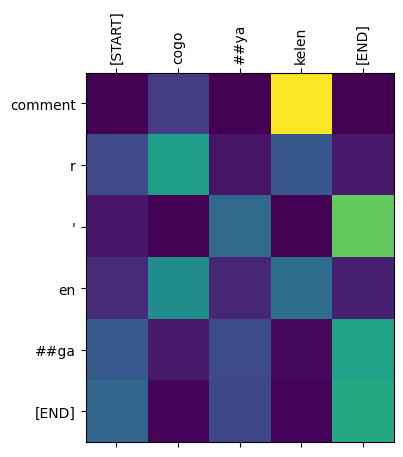

In [86]:
plot_attention_head(in_tokens, translated_tokens, attention)

In [87]:
def plot_attention_weights(sentence, translated_tokens, attention_heads):
  in_tokens = tf.convert_to_tensor([sentence])
  in_tokens = tokenizers.dyu.tokenize(in_tokens).to_tensor()
  in_tokens = tokenizers.dyu.lookup(in_tokens)[0]

  fig = plt.figure(figsize=(16, 8))

  for h, head in enumerate(attention_heads):
    ax = fig.add_subplot(2, 4, h+1)

    plot_attention_head(in_tokens, translated_tokens, head)

    ax.set_xlabel(f'Head {h+1}')

  plt.tight_layout()
  plt.show()

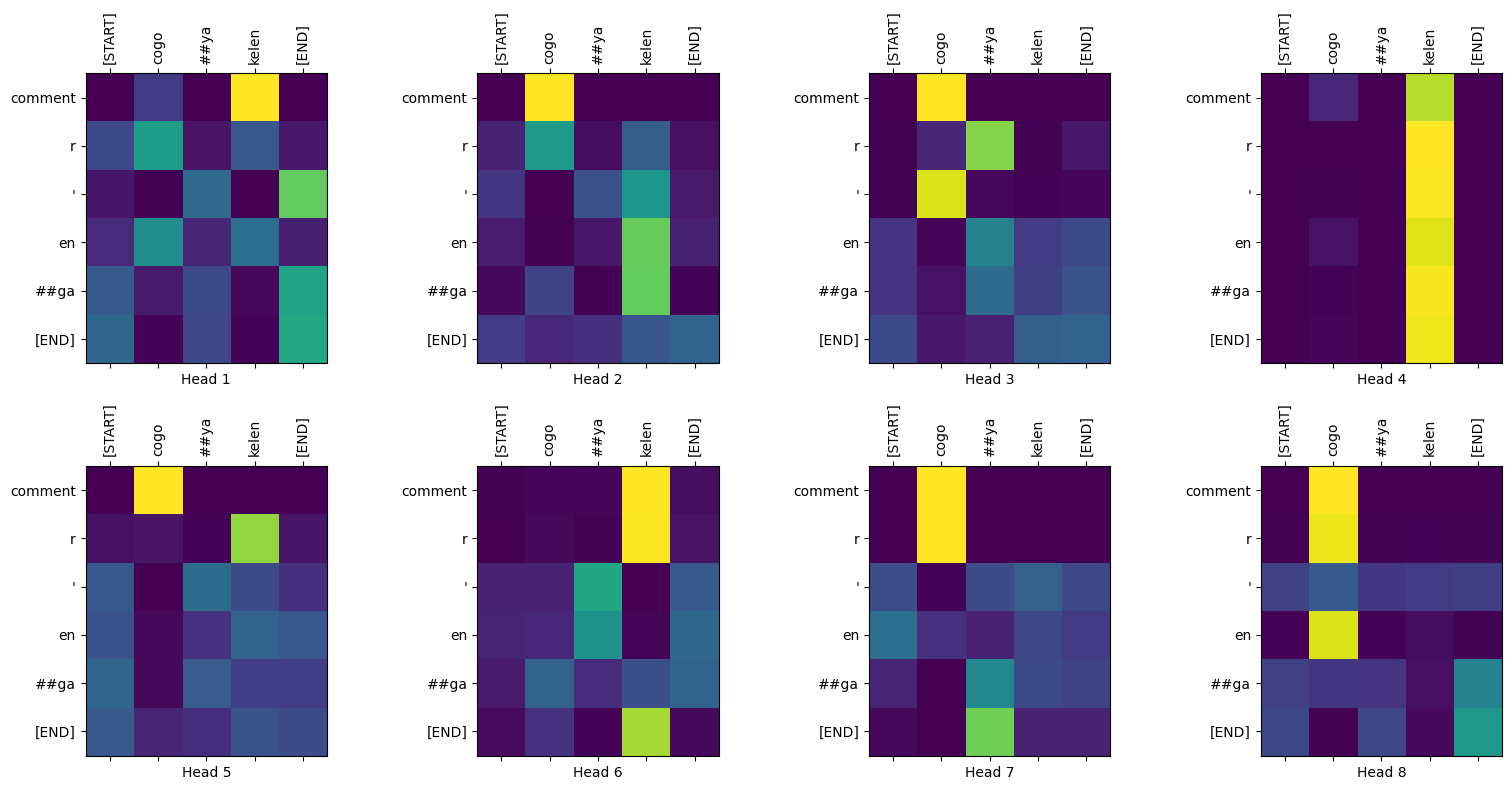

In [88]:
plot_attention_weights(sentence,
                       translated_tokens,
                       attention_weights[0])

/home/amini/Downloads/french-dyula/env/lib/python3.11/site-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'query' (of type EinsumDense) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/home/amini/Downloads/french-dyula/env/lib/python3.11/site-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'key' (of type EinsumDense) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/home/amini/Downloads/french-dyula/env/lib/python3.11/site-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'value' (of type EinsumDense) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layer

Input:         : n ma daraka dun ban
Prediction     : je n ’ ai pas encore dejeune
Ground truth   : je n’ai pas encore déjeuné


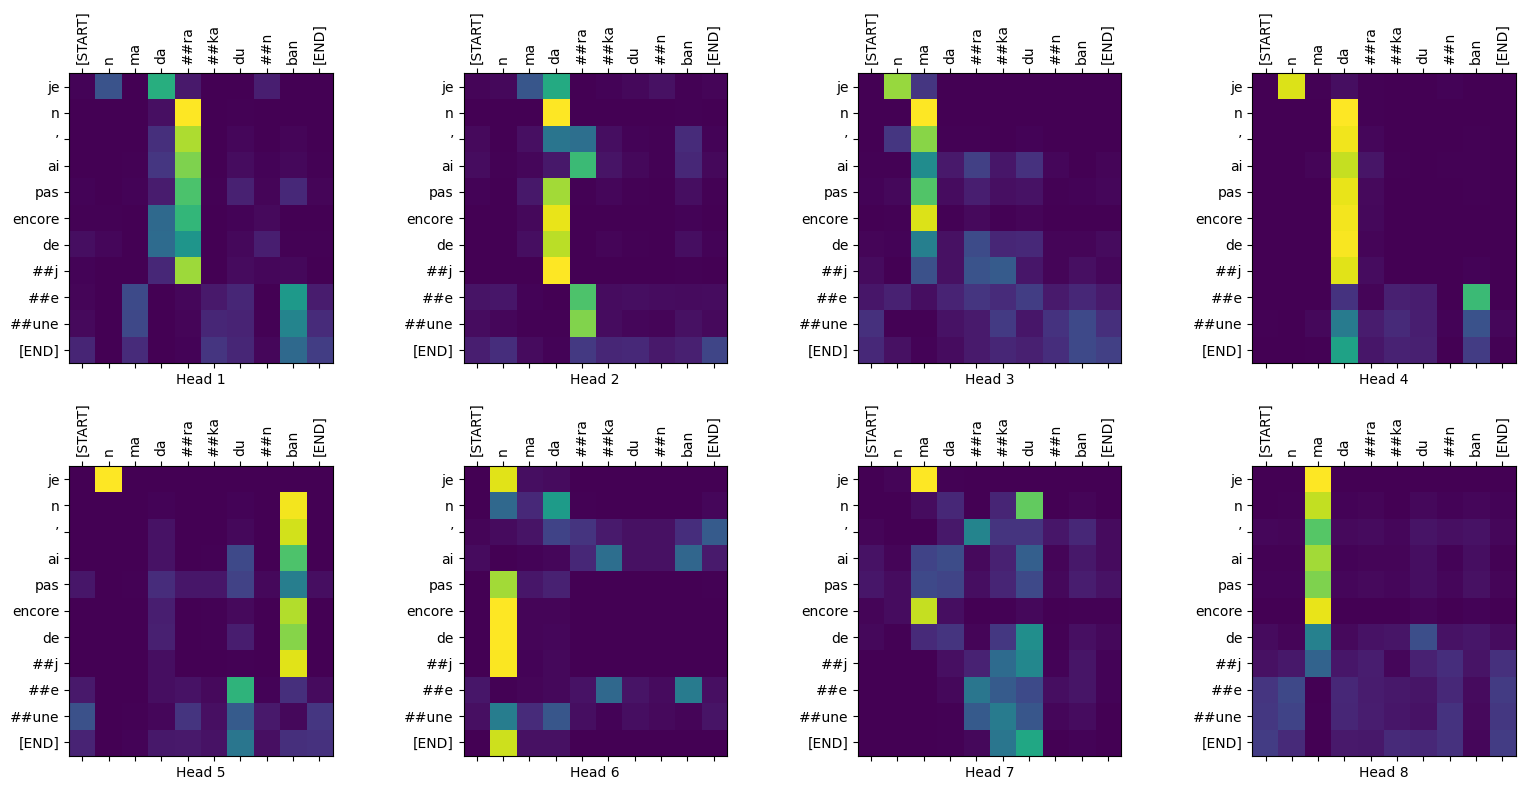

In [89]:
sentence = 'n ma daraka dun ban'
ground_truth = 'je n’ai pas encore déjeuné'

translated_text, translated_tokens, attention_weights = translator(
    tf.constant(sentence))
print_translation(sentence, translated_text, ground_truth)

plot_attention_weights(sentence, translated_tokens, attention_weights[0])

## Export the model

You have tested the model and the inference is working. Next, you can export it as a `tf.saved_model`.

Create a class called `ExportTranslator` by subclassing the `tf.Module` subclass with a `tf.function` on the `__call__` method:

In [90]:
class ExportTranslator(tf.Module):
  def __init__(self, translator):
    self.translator = translator

  @tf.function(input_signature=[tf.TensorSpec(shape=[], dtype=tf.string)])
  def __call__(self, sentence):
    (result,
     tokens,
     attention_weights) = self.translator(sentence, max_length=MAX_TOKENS)

    return result

In the above `tf.function` only the output sentence is returned. Thanks to the [non-strict execution](https://tensorflow.org/guide/intro_to_graphs) in `tf.function` any unnecessary values are never computed.

Wrap `translator` in the newly created `ExportTranslator`:

In [91]:
translator = ExportTranslator(translator)

Since the model is decoding the predictions using `tf.argmax` the predictions are deterministic. The original model and one reloaded from its `SavedModel` should give identical predictions:

In [92]:
translator("a y'a dabla ka yɛlɛ n na").numpy()

/home/amini/Downloads/french-dyula/env/lib/python3.11/site-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'query' (of type EinsumDense) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/home/amini/Downloads/french-dyula/env/lib/python3.11/site-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'key' (of type EinsumDense) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/home/amini/Downloads/french-dyula/env/lib/python3.11/site-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'value' (of type EinsumDense) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layer

b'il ouvrez vous la porte'

In [93]:
tf.saved_model.save(translator, export_dir='translator')

/home/amini/Downloads/french-dyula/env/lib/python3.11/site-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'query' (of type EinsumDense) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/home/amini/Downloads/french-dyula/env/lib/python3.11/site-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'key' (of type EinsumDense) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/home/amini/Downloads/french-dyula/env/lib/python3.11/site-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'value' (of type EinsumDense) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layer

INFO:tensorflow:Assets written to: translator/assets


INFO:tensorflow:Assets written to: translator/assets


In [94]:
reloaded = tf.saved_model.load('translator')

In [95]:
reloaded("a y'a dabla ka yɛlɛ n na").numpy()

b'il ouvrez vous la porte'